In [1]:
# library(ggplot2)        # plotting & data
library(dplyr)          # data manipulation
library(tidyr)          # data re-shaping
library(magrittr)       # pipe operator
library(gridExtra)      # provides side-by-side plotting
library(dplyr)          # dplyr for pipe operations
library(moments)        # bonett.test for normality
library(ggQC)           # to create xMR and iMR charts
library(repr)           # change plot size
library(nortest)        # anderson darling test
library(climtrends)     # FindOutliersTietjenMooreTest


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract




ERROR: Error in library(gridExtra): there is no package called ‘gridExtra’


In [1]:
!pip install jupyterlabs_vim

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: !pip install
         ^


In [2]:
install.packages("gridExtra")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Change plot size to 12 x 6
parentdir <- "rscript_data/"
options(repr.plot.width=22, repr.plot.height=12)

### Comparison of 8 old vs 8 new (cell count and SI)

In [381]:
dfcnt_new8 <- list()
dfcnt_old8 <- list()
rows <- list(c("A", "E"), c("B", "F"), c("C", "G"), c("D", "H"))


cnt <- 1
dfn_ls <- list()
dfo_ls <- list()
dfn_sub_ls <- list()
dfo_sub_ls <- list()

for (i in seq(4)) {
    dir = paste0(parentdir, "8v8_redo_plate", i)
    fi = list.files(dir)
    select_fi = fi[grepl("NEW8_CELLCNT", fi)]
    dfn_ls[[i]] <- read.csv(file.path(dir, select_fi))
    select_fi = fi[grepl("OLD8_CELLCNT", fi)]
    dfo_ls[[i]] <- read.csv(file.path(dir, select_fi))
    for (j in seq(4)) {
          dfn_sub_ls[[cnt]] <- dfn_ls[[i]] %>%
              na.omit() %>% 
              filter(X < 9 & X > 1) %>%
              filter(grepl(paste0("[", rows[[j]][1], "|", rows[[j]][2], "]"), Y)) %>%
              mutate(row.group = paste0(rows[[j]][1], "-", rows[[j]][2]),
                     method = 'NEW',
                     plate = paste('PLATE', i))
          dfo_sub_ls[[cnt]] <- dfo_ls[[i]] %>%
              na.omit() %>% 
              filter(X < 9 & X > 1) %>%
              filter(grepl(paste0("[", rows[[j]][1], "|", rows[[j]][2], "]"), Y)) %>%
              mutate(row.group = paste0(rows[[j]][1], "-", rows[[j]][2]),
                     method = 'OLD',
                     plate = paste('PLATE', i))
    cnt <- cnt + 1
    }
}

In [382]:
dfn_sub_ls

[[1]]
   X Y    Z row.group method   plate
1  2 A 1692       A-E    NEW PLATE 1
2  3 A 1720       A-E    NEW PLATE 1
3  4 A 2017       A-E    NEW PLATE 1
4  5 A 1635       A-E    NEW PLATE 1
5  6 A 1935       A-E    NEW PLATE 1
6  7 A 2039       A-E    NEW PLATE 1
7  8 A 2301       A-E    NEW PLATE 1
8  2 E 1702       A-E    NEW PLATE 1
9  3 E 1478       A-E    NEW PLATE 1
10 4 E 1313       A-E    NEW PLATE 1
11 5 E 1407       A-E    NEW PLATE 1
12 6 E 1447       A-E    NEW PLATE 1
13 7 E 1558       A-E    NEW PLATE 1
14 8 E 1873       A-E    NEW PLATE 1

[[2]]
   X Y    Z row.group method   plate
1  2 B 1734       B-F    NEW PLATE 1
2  3 B 1691       B-F    NEW PLATE 1
3  4 B 1617       B-F    NEW PLATE 1
4  5 B 1448       B-F    NEW PLATE 1
5  6 B 1138       B-F    NEW PLATE 1
6  7 B 1420       B-F    NEW PLATE 1
7  8 B 1694       B-F    NEW PLATE 1
8  2 F 1691       B-F    NEW PLATE 1
9  3 F 1662       B-F    NEW PLATE 1
10 4 F 1406       B-F    NEW PLATE 1
11 5 F 1343       B-F    NEW PLATE 1
12 6 F 1316       B-F    NEW PLATE 1
13 7 F 1327       B-F    NEW PLATE 1
14 8 F 1493       B-F    NEW PLATE 1

[[3]]
   X Y    Z row.group method   plate
1  2 C 2069       C-G    NEW PLATE 1
2  3 C 1842       C-G    NEW PLATE 1
3  4 C 1784       C-G    NEW PLATE 1
4  5 C 1753       C-G    NEW PLATE 1
5  6 C 1868       C-G    NEW PLATE 1
6  7 C 1823       C-G    NEW PLATE 1
7  8 C 2216       C-G    NEW PLATE 1
8  2 G 1868       C-G    NEW PLATE 1
9  3 G 1806       C-G    NEW PLATE 1
10 4 G 1817       C-G    NEW PLATE 1
11 5 G 1845       C-G    NEW PLATE 1
12 6 G 1746       C-G    NEW PLATE 1
13 7 G 1813       C-G    NEW PLATE 1
14 8 G 2049       C-G    NEW PLATE 1

[[4]]
   X Y    Z row.group method   plate
1  2 D 1975       D-H    NEW PLATE 1
2  3 D 1697       D-H    NEW PLATE 1
3  4 D 1832       D-H    NEW PLATE 1
4  5 D 1651       D-H    NEW PLATE 1
5  6 D 1721       D-H    NEW PLATE 1
6  7 D 1658       D-H    NEW PLATE 1
7  8 D 1924       D-H    NEW PLATE 1
8  2 H 1886       D-H    NEW PLATE 1
9  3 H 1930       D-H    NEW PLATE 1
10 4 H 1902       D-H    NEW PLATE 1
11 5 H 1910       D-H    NEW PLATE 1
12 6 H 2069       D-H    NEW PLATE 1
13 7 H 1858       D-H    NEW PLATE 1
14 8 H 1746       D-H    NEW PLATE 1

[[5]]
   X Y    Z row.group method   plate
1  2 A 2391       A-E    NEW PLATE 2
2  3 A 2429       A-E    NEW PLATE 2
3  4 A 2472       A-E    NEW PLATE 2
4  5 A 2438       A-E    NEW PLATE 2
5  6 A 2478       A-E    NEW PLATE 2
6  7 A 2392       A-E    NEW PLATE 2
7  8 A 2629       A-E    NEW PLATE 2
8  2 E 2310       A-E    NEW PLATE 2
9  3 E 2293       A-E    NEW PLATE 2
10 4 E 2218       A-E    NEW PLATE 2
11 5 E 2206       A-E    NEW PLATE 2
12 6 E 2288       A-E    NEW PLATE 2
13 7 E 2408       A-E    NEW PLATE 2
14 8 E 2394       A-E    NEW PLATE 2

[[6]]
   X Y    Z row.group method   plate
1  2 B 2389       B-F    NEW PLATE 2
2  3 B 2407       B-F    NEW PLATE 2
3  4 B 2479       B-F    NEW PLATE 2
4  5 B 2313       B-F    NEW PLATE 2
5  6 B 2082       B-F    NEW PLATE 2
6  7 B 2060       B-F    NEW PLATE 2
7  8 B 2203       B-F    NEW PLATE 2
8  2 F 1936       B-F    NEW PLATE 2
9  3 F 1803       B-F    NEW PLATE 2
10 4 F 1981       B-F    NEW PLATE 2
11 5 F 1995       B-F    NEW PLATE 2
12 6 F 1723       B-F    NEW PLATE 2
13 7 F 1993       B-F    NEW PLATE 2
14 8 F 1688       B-F    NEW PLATE 2

[[7]]
   X Y    Z row.group method   plate
1  2 C 2516       C-G    NEW PLATE 2
2  3 C 2527       C-G    NEW PLATE 2
3  4 C 2517       C-G    NEW PLATE 2
4  5 C 2403       C-G    NEW PLATE 2
5  6 C 2480       C-G    NEW PLATE 2
6  7 C 2292       C-G    NEW PLATE 2
7  8 C 2443       C-G    NEW PLATE 2
8  2 G 2200       C-G    NEW PLATE 2
9  3 G 2370       C-G    NEW PLATE 2
10 4 G 2363       C-G    NEW PLATE 2
11 5 G 2353       C-G    NEW PLATE 2
12 6 G 2263       C-G    NEW PLATE 2
13 7 G 2315       C-G    NEW PLATE 2
14 8 G 2480       C-G    NEW PLATE 2

[[8]]
   X Y    Z row.group method   plate
1  2 D 2631       D-H  

In [383]:
df <- do.call(rbind, dfn_sub_ls) %>% rbind(do.call(rbind,dfo_sub_ls))

In [384]:
head(df)

X Y Z    row.group method plate  
1 2 A 1692 A-E       NEW    PLATE 1
2 3 A 1720 A-E       NEW    PLATE 1
3 4 A 2017 A-E       NEW    PLATE 1
4 5 A 1635 A-E       NEW    PLATE 1
5 6 A 1935 A-E       NEW    PLATE 1
6 7 A 2039 A-E       NEW    PLATE 1

#### compare two groups at a time for the variance using F test
- The p values are higher than 0.05, meaning the variances do not change from plate 1 to 3
- Run F-test when you want to perform a two samples t-test to check the equality of the variances of the two samples

#### Shapiro test
- the shapiro.test, the null hypothesis assumes that the data is drawn from a normal distribution. Since the p-value > 0.05, we fail to reject the null hypothesis, meaning that it is likely that the data is drawn from a normal distribution

#### Anderson-Darling test for normality
- a given sample of data is drawn from a given probability distribution
- has to be greater than 7 points so cannot run this test

In [473]:
# 8 chl New vs Old

df_stats <- data.frame()
row_idx = 1

for (r in rows) {
    for (i in seq(2,8)) {
        row_group = paste0(r[1], i," - ", r[2], i )
        print(row_group)
        
        df.tmp <- df %>% filter(row.group == paste0(r[1], "-", r[2]),
                                X == i)

        stat <- var.test(Z ~ method, df.tmp)
        print(stat)
        df_stats[row_idx, "ROW_GROUP"] = row_group
        df_stats[row_idx, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_FT"] = stat$p.value > 0.05
        stat <- wilcox.test(Z~method, 
                            df.tmp,
                            alternative= "two.sided",
                            paired=FALSE, 
                            var.equal=TRUE, 
                            conf.level=0.95)
        print(stat)
        df_stats[row_idx, "WILCOXON_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_WX"] = stat$p.value > 0.05
        stat <- t.test(Z~method, 
                            df.tmp,
                            alternative= "two.sided",
                            paired=FALSE, 
                            var.equal=TRUE, 
                            conf.level=0.95)
        print(stat)
        df_stats[row_idx, "T_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_TT"] = stat$p.value > 0.05
        
        row_idx = row_idx + 1
    }
}
write.csv(df_stats, paste0("8v8_pairtest_stats_cmbplts_count.csv"), row.names = FALSE)

[1] "A2 - E2"

	F test to compare two variances

data:  Z by method
F = 0.65585, num df = 7, denom df = 7, p-value = 0.5915
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1313029 3.2758907
sample estimates:
ratio of variances 
         0.6558459 


	Wilcoxon rank sum exact test

data:  Z by method
W = 47, p-value = 0.1304
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 1.7194, df = 14, p-value = 0.1076
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -79.9439 726.1939
sample estimates:
mean in group NEW mean in group OLD 
         2183.500          1860.375 

[1] "A3 - E3"

	F test to compare two variances

data:  Z by method
F = 0.60409, num df = 7, denom df = 7, p-value = 0.522
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1209419 3.0173936
sample estimates:
ratio of v

Warning message in wilcox.test.default(x = c(1842L, 1806L, 2527L, 2370L, 2286L, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Z by method
W = 50.5, p-value = 0.05852
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 2.2764, df = 14, p-value = 0.03906
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  26.03957 874.96043
sample estimates:
mean in group NEW mean in group OLD 
         2290.375          1839.875 

[1] "C4 - G4"

	F test to compare two variances

data:  Z by method
F = 1.1615, num df = 7, denom df = 7, p-value = 0.8485
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2325454 5.8018030
sample estimates:
ratio of variances 
          1.161543 


	Wilcoxon rank sum exact test

data:  Z by method
W = 48, p-value = 0.1049
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 1.9755, df = 14, p-value = 0.06827
alternative hypothesis: tr

Warning message in wilcox.test.default(x = c(1868L, 1746L, 2480L, 2263L, 2217L, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Z by method
W = 45.5, p-value = 0.1719
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 1.5654, df = 14, p-value = 0.1398
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -120.4394  771.1894
sample estimates:
mean in group NEW mean in group OLD 
         2199.875          1874.500 

[1] "C7 - G7"

	F test to compare two variances

data:  Z by method
F = 0.96489, num df = 7, denom df = 7, p-value = 0.9636
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1931757 4.8195622
sample estimates:
ratio of variances 
         0.9648949 


	Wilcoxon rank sum exact test

data:  Z by method
W = 50, p-value = 0.06496
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 1.9593, df = 14, p-value = 0.0703
alternative hypothesis: tru

Warning message in wilcox.test.default(x = c(1658L, 1858L, 2523L, 1907L, 2075L, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Z by method
W = 52.5, p-value = 0.03556
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 2.2673, df = 14, p-value = 0.03974
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  24.95584 898.79416
sample estimates:
mean in group NEW mean in group OLD 
         2170.750          1708.875 

[1] "D8 - H8"

	F test to compare two variances

data:  Z by method
F = 0.86845, num df = 7, denom df = 7, p-value = 0.8572
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1738663 4.3378119
sample estimates:
ratio of variances 
         0.8684466 


	Wilcoxon rank sum exact test

data:  Z by method
W = 48, p-value = 0.1049
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 1.9843, df = 14, p-value = 0.06718
alternative hypothesis: t

In [389]:
df_stats

ROW_GROUP F_TEST   GT_A_FT WILCOXON_TEST GT_A_WX T_TEST   GT_A_TT
1  A2 - E2   5.92e-01 TRUE    1.30e-01       TRUE   1.08e-01  TRUE  
2  A3 - E3   5.22e-01 TRUE    1.61e-01       TRUE   1.73e-01  TRUE  
3  A4 - E4   6.62e-01 TRUE    4.99e-02      FALSE   4.92e-02 FALSE  
4  A5 - E5   8.89e-01 TRUE    2.79e-01       TRUE   1.99e-01  TRUE  
5  A6 - E6   8.70e-01 TRUE    8.30e-02       TRUE   9.94e-02  TRUE  
6  A7 - E7   8.43e-01 TRUE    1.30e-01       TRUE   1.27e-01  TRUE  
7  A8 - E8   8.70e-01 TRUE    2.81e-02      FALSE   5.19e-02  TRUE  
8  B2 - F2   5.85e-01 TRUE    3.28e-01       TRUE   3.21e-01  TRUE  
9  B3 - F3   6.82e-01 TRUE    3.82e-01       TRUE   1.32e-01  TRUE  
10 B4 - F4   4.71e-01 TRUE    2.79e-01       TRUE   1.25e-01  TRUE  
11 B5 - F5   4.25e-01 TRUE    2.34e-01       TRUE   1.15e-01  TRUE  
12 B6 - F6   1.30e-01 TRUE    1.30e-01       TRUE   1.49e-01  TRUE  
13 B7 - F7   1.84e-01 TRUE    1.30e-01       TRUE   6.64e-02  TRUE  
14 B8 - F8   3.85e-01 TRUE    1.30e-01       TRUE   9.56e-02  TRUE  
15 C2 - G2   8.99e-01 TRUE    2.81e-02      FALSE   2.80e-02 FALSE  
16 C3 - G3   9.36e-01 TRUE    5.85e-02       TRUE   3.91e-02 FALSE  
17 C4 - G4   8.48e-01 TRUE    1.05e-01       TRUE   6.83e-02  TRUE  
18 C5 - G5   7.94e-01 TRUE    6.50e-02       TRUE   5.89e-02  TRUE  
19 C6 - G6   7.74e-01 TRUE    1.72e-01       TRUE   1.40e-01  TRUE  
20 C7 - G7   9.64e-01 TRUE    6.50e-02       TRUE   7.03e-02  TRUE  
21 C8 - G8   6.60e-01 TRUE    8.30e-02       TRUE   5.63e-02  TRUE  
22 D2 - H2   5.91e-01 TRUE    4.99e-02      FALSE   2.44e-02 FALSE  
23 D3 - H3   8.42e-01 TRUE    8.30e-02       TRUE   5.74e-02  TRUE  
24 D4 - H4   7.44e-01 TRUE    3.79e-02      FALSE   2.34e-02 FALSE  
25 D5 - H5   3.59e-01 TRUE    4.99e-02      FALSE   5.81e-02  TRUE  
26 D6 - H6   9.52e-01 TRUE    4.99e-02      FALSE   2.74e-02 FALSE  
27 D7 - H7   7.39e-01 TRUE    3.56e-02      FALSE   3.97e-02 FALSE  
28 D8 - H8   8.57e-01 TRUE    1.05e-01       TRUE   6.72e-02  TRUE

In [484]:
# generate stats table 
df_stats <- data.frame()
row_idx = 1

for (r in rows) {
    for (i in seq(2,8)) {
        row_group = paste0(r[1], i," - ", r[2], i )
        print(row_group)
        
        #NEW

        df_stats[row_idx, "ROW_GROUP"] = row_group
        df.tmp <- df %>% filter(method == "OLD",
                                row.group == paste0(r[1], "-", r[2]),
                                X == i)
        stat <- ad.test(df.tmp$Z)
        df_stats[row_idx, "AD_TEST_OLD"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_AD_OLD"] = stat$p.value > 0.05
        stat <- shapiro.test(df.tmp$Z)
        df_stats[row_idx, "SHAPIRO_TEST_OLD"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_SHAP_OLD"] = stat$p.value > 0.05
        print(stat)
        stat <- bonett.test(df.tmp$Z)
        df_stats[row_idx, "BONETT_TEST_OLD"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_BONN_OLD"] = stat$p.value > 0.05
        print(stat)
        stat <- geary(df.tmp$Z)
        df_stats[row_idx, "GEARY_OLD"] = formatC(stat, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_GEAR_OLD"] = stat > 0.05
        print(stat)
        df.tmp <- df %>% filter(method == "NEW",
                                row.group == paste0(r[1], "-", r[2]),
                                X == i)
        stat <- ad.test(df.tmp$Z)
        df_stats[row_idx, "AD_TEST_NEW"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_AD_NEW"] = stat$p.value > 0.05
        stat <- shapiro.test(df.tmp$Z)
        df_stats[row_idx, "SHAPIRO_TEST_NEW"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_SHAP_NEW"] = stat$p.value > 0.05
        print(stat)
        stat <- bonett.test(df.tmp$Z)
        df_stats[row_idx, "BONETT_TEST_NEW"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_BONN_NEW"] = stat$p.value > 0.05
        print(stat)
        stat <- geary(df.tmp$Z)
        df_stats[row_idx, "GEARY_NEW"] = formatC(stat, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_GEAR_NEW"] = stat > 0.05
        print(stat)
        row_idx = row_idx + 1
        print(paste0(rep("-", 25),collapse=""))
    }
}
write.csv(df_stats, paste0("8v8_stats_param_cmbplts_count.csv"), row.names = FALSE)

[1] "A2 - E2"

	Shapiro-Wilk normality test

data:  df.tmp$Z
W = 0.87507, p-value = 0.1689


	Bonett-Seier test for Geary kurtosis

data:  df.tmp$Z
tau = 304.06250, z = 0.16501, p-value = 0.8689
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] 0.7869164

	Shapiro-Wilk normality test

data:  df.tmp$Z
W = 0.82806, p-value = 0.05668


	Bonett-Seier test for Geary kurtosis

data:  df.tmp$Z
tau = 284.3750, z = -1.5443, p-value = 0.1225
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] 0.9087748
[1] "-------------------------"
[1] "A3 - E3"

	Shapiro-Wilk normality test

data:  df.tmp$Z
W = 0.92227, p-value = 0.4485


	Bonett-Seier test for Geary kurtosis

data:  df.tmp$Z
tau = 333.7500, z = 1.5871, p-value = 0.1125
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] 0.6980821

	Shapiro-Wilk normality test

data:  df.tmp$Z
W = 0.9455, p-value = 0.6659


	Bonett-Seier test for Geary kurtosis

data:  df.tmp$Z
tau = 306.5000, z = -0.3936, p-value = 0.

### qq-plot
- Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight

### Histogram with density line plot
- We also see similar skewness within the sample distributions.

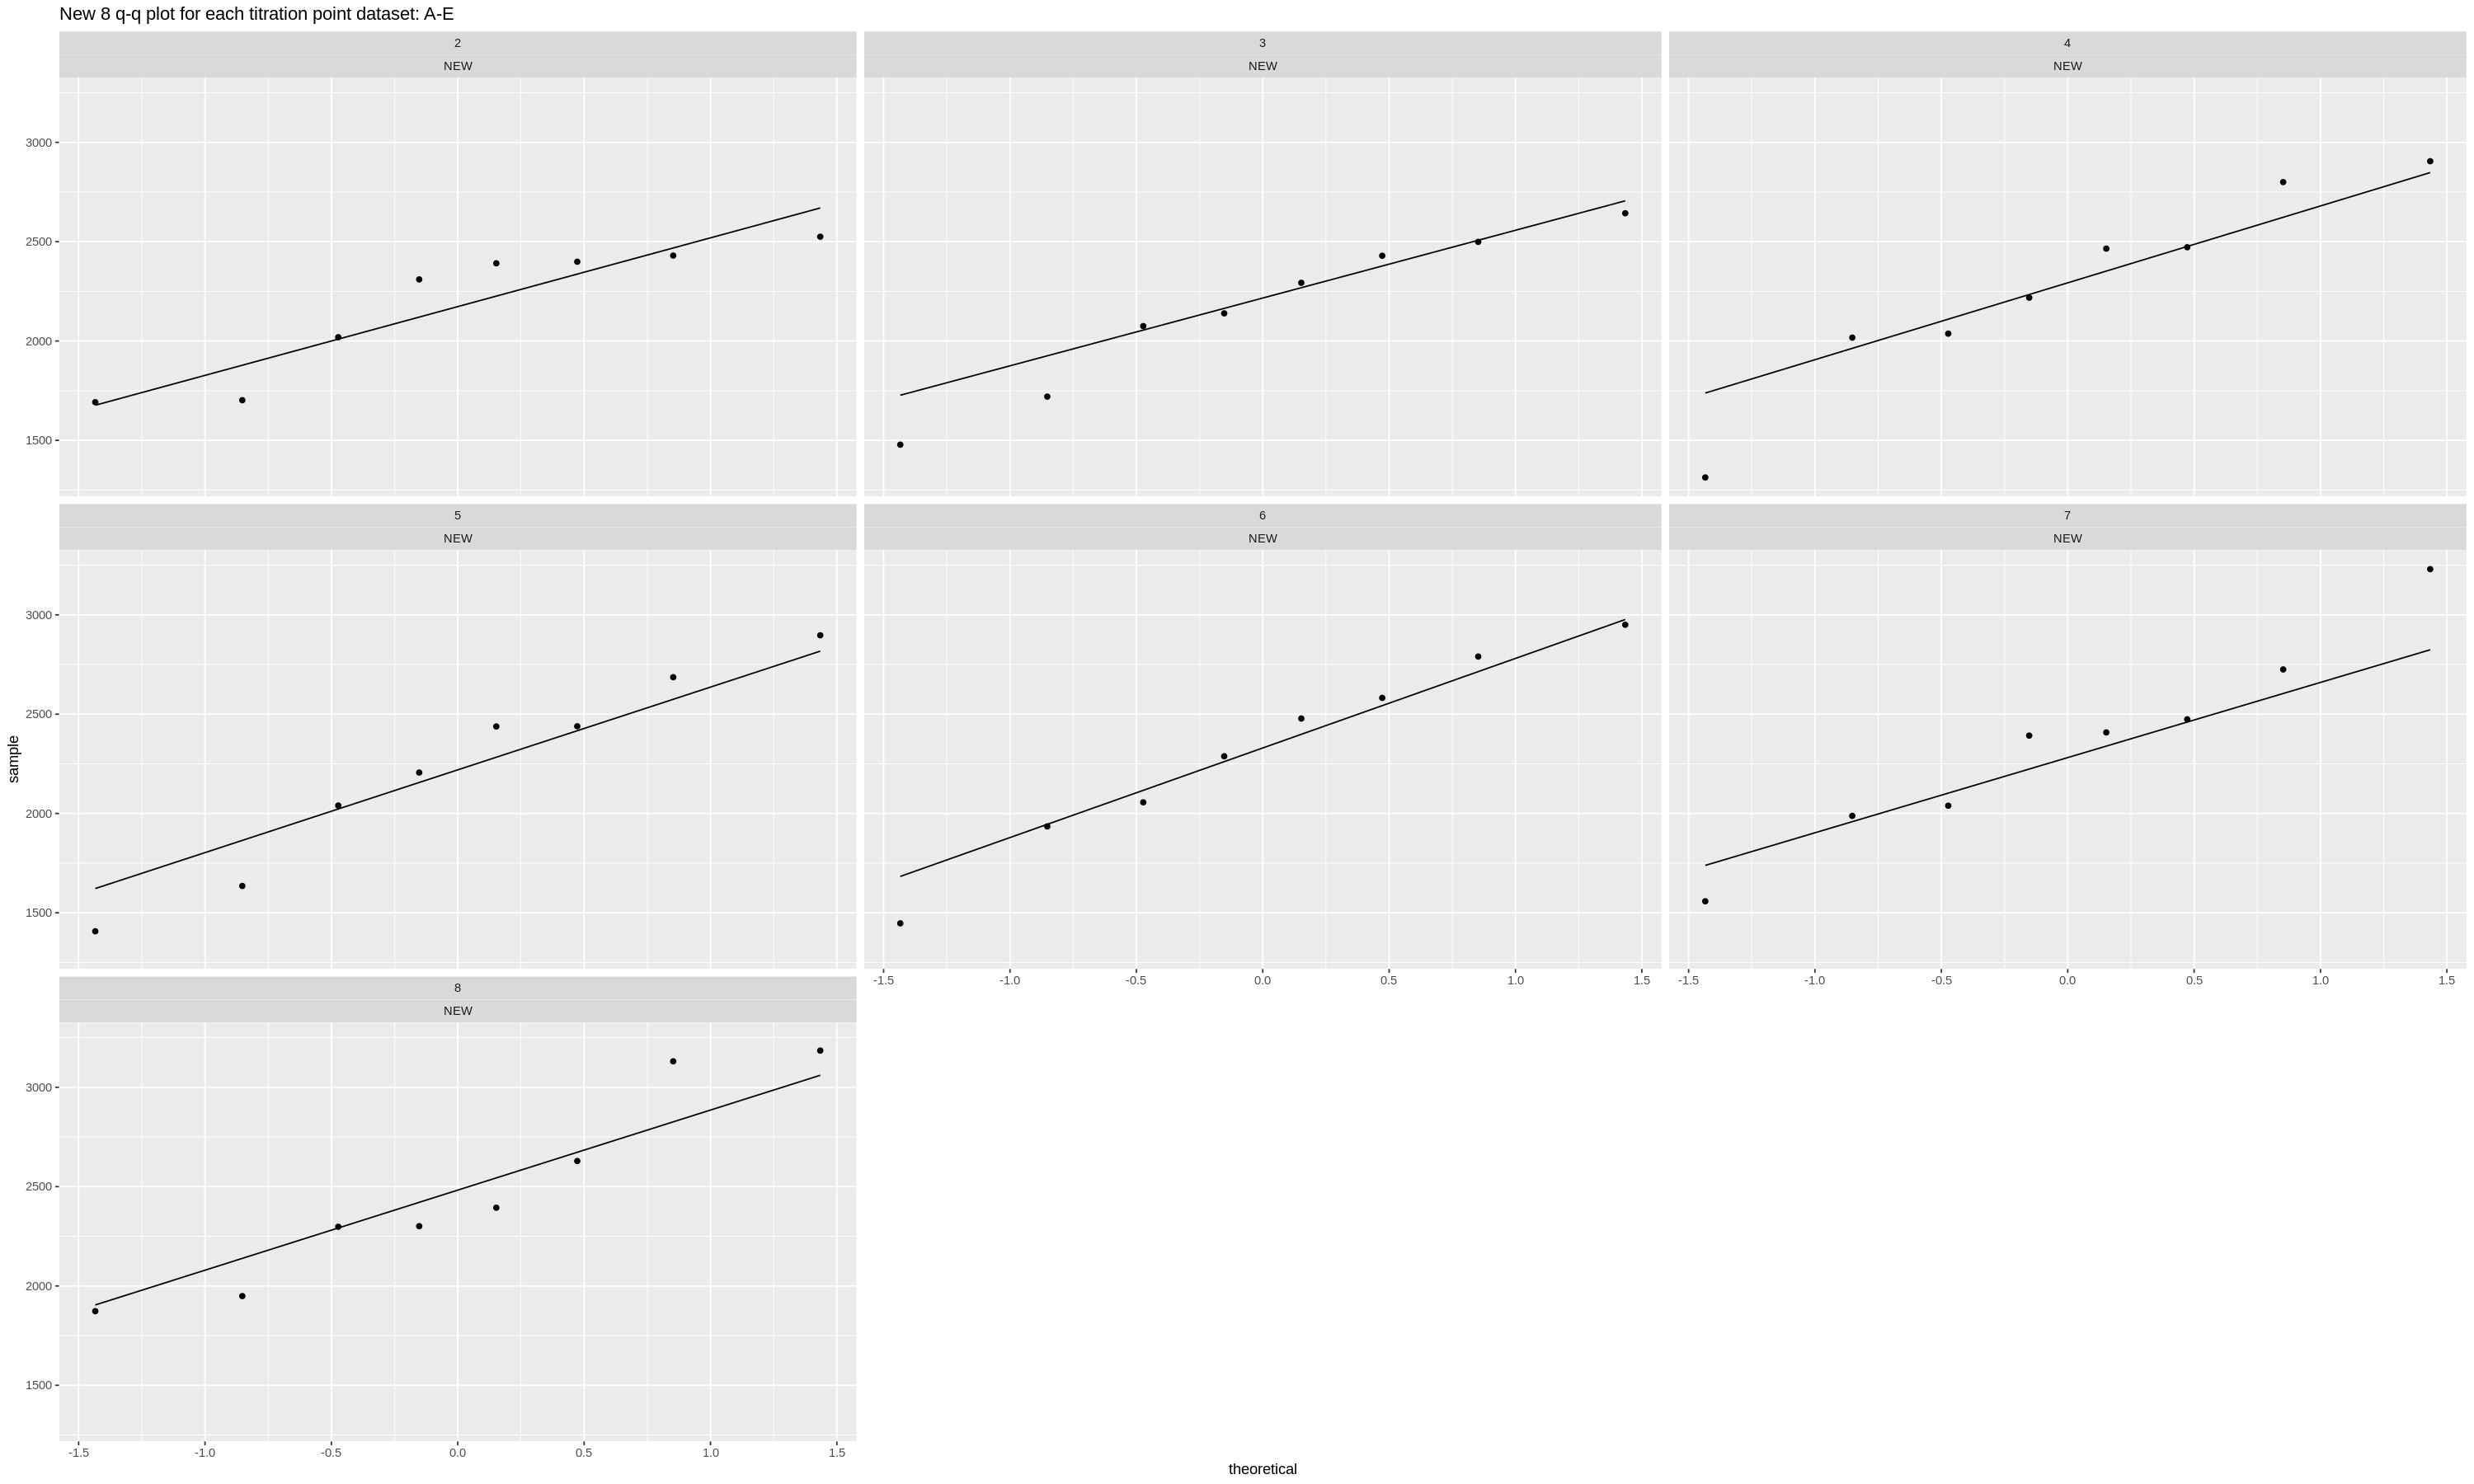

In [399]:
j = 1
mtd = "NEW"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)
ggplot(df.tmp, aes(sample = Z)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(X~ method) +
            ggtitle(paste("New 8 q-q plot for each titration point dataset:", row_group))

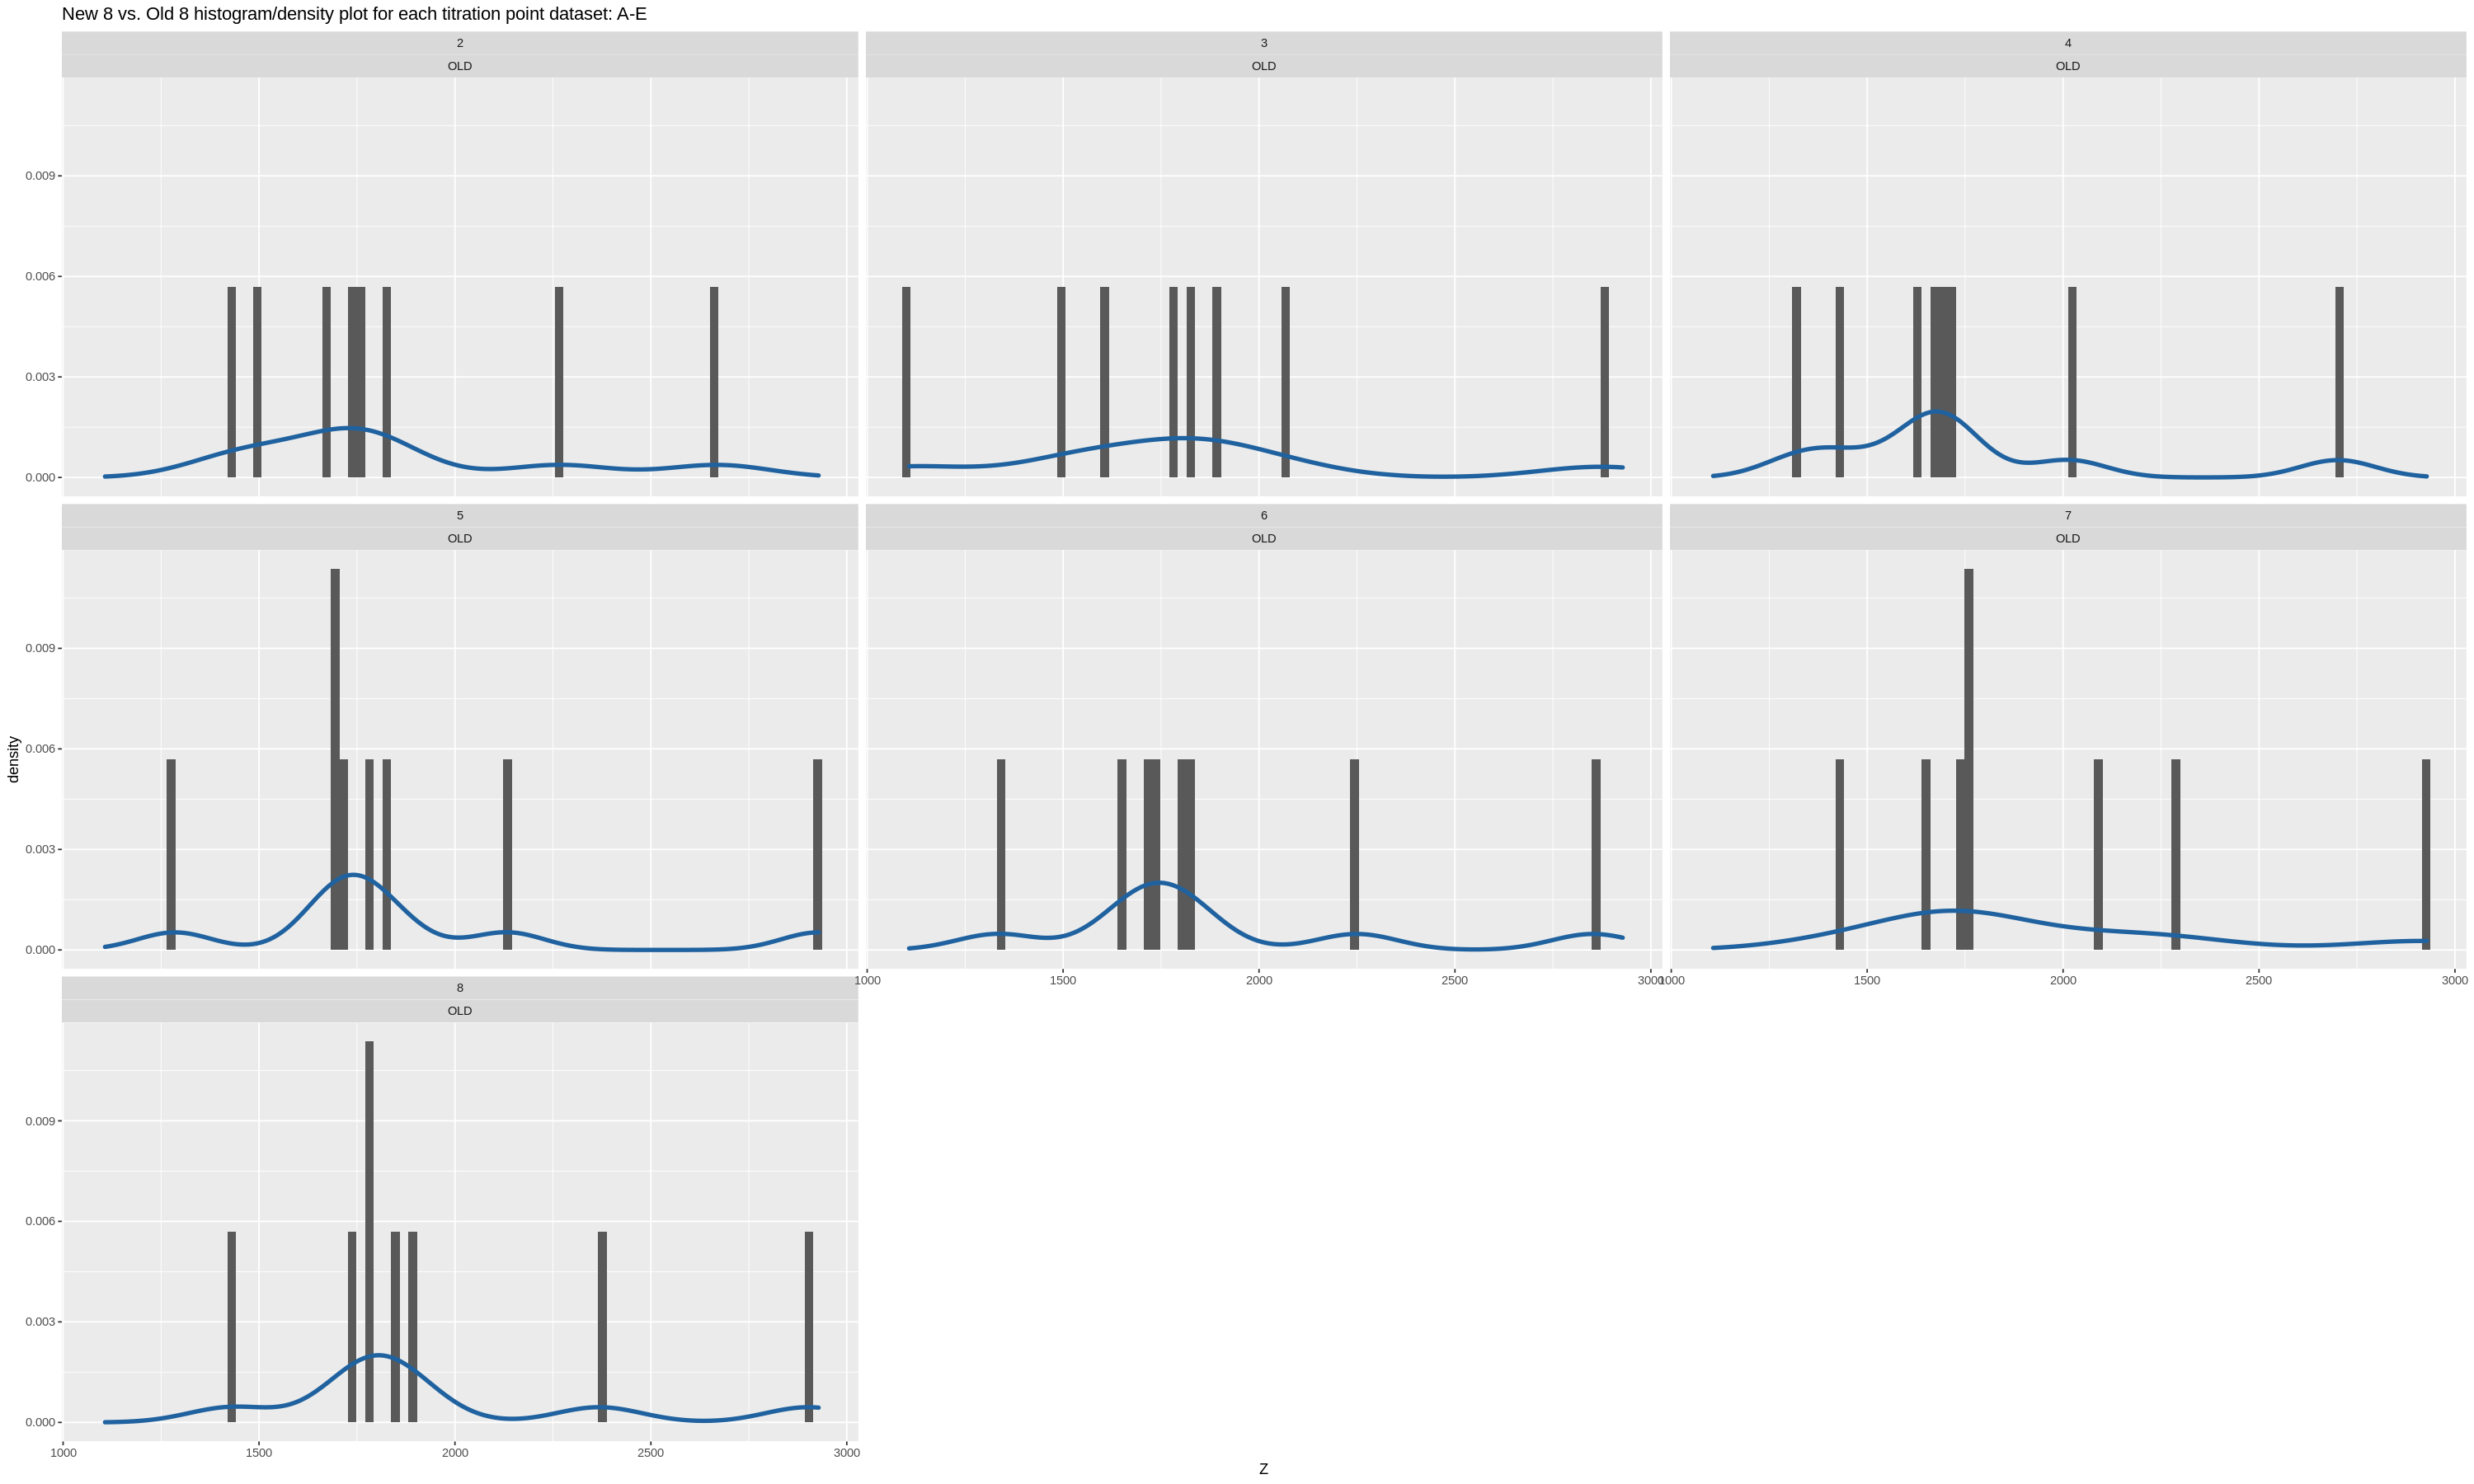

In [398]:
j = 1
mtd = "OLD"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)

ggplot(data = df.tmp, aes(x = Z)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(X~ method) +
    ggtitle(paste("Old 8 histogram/density plot for each titration point dataset:",row_group))

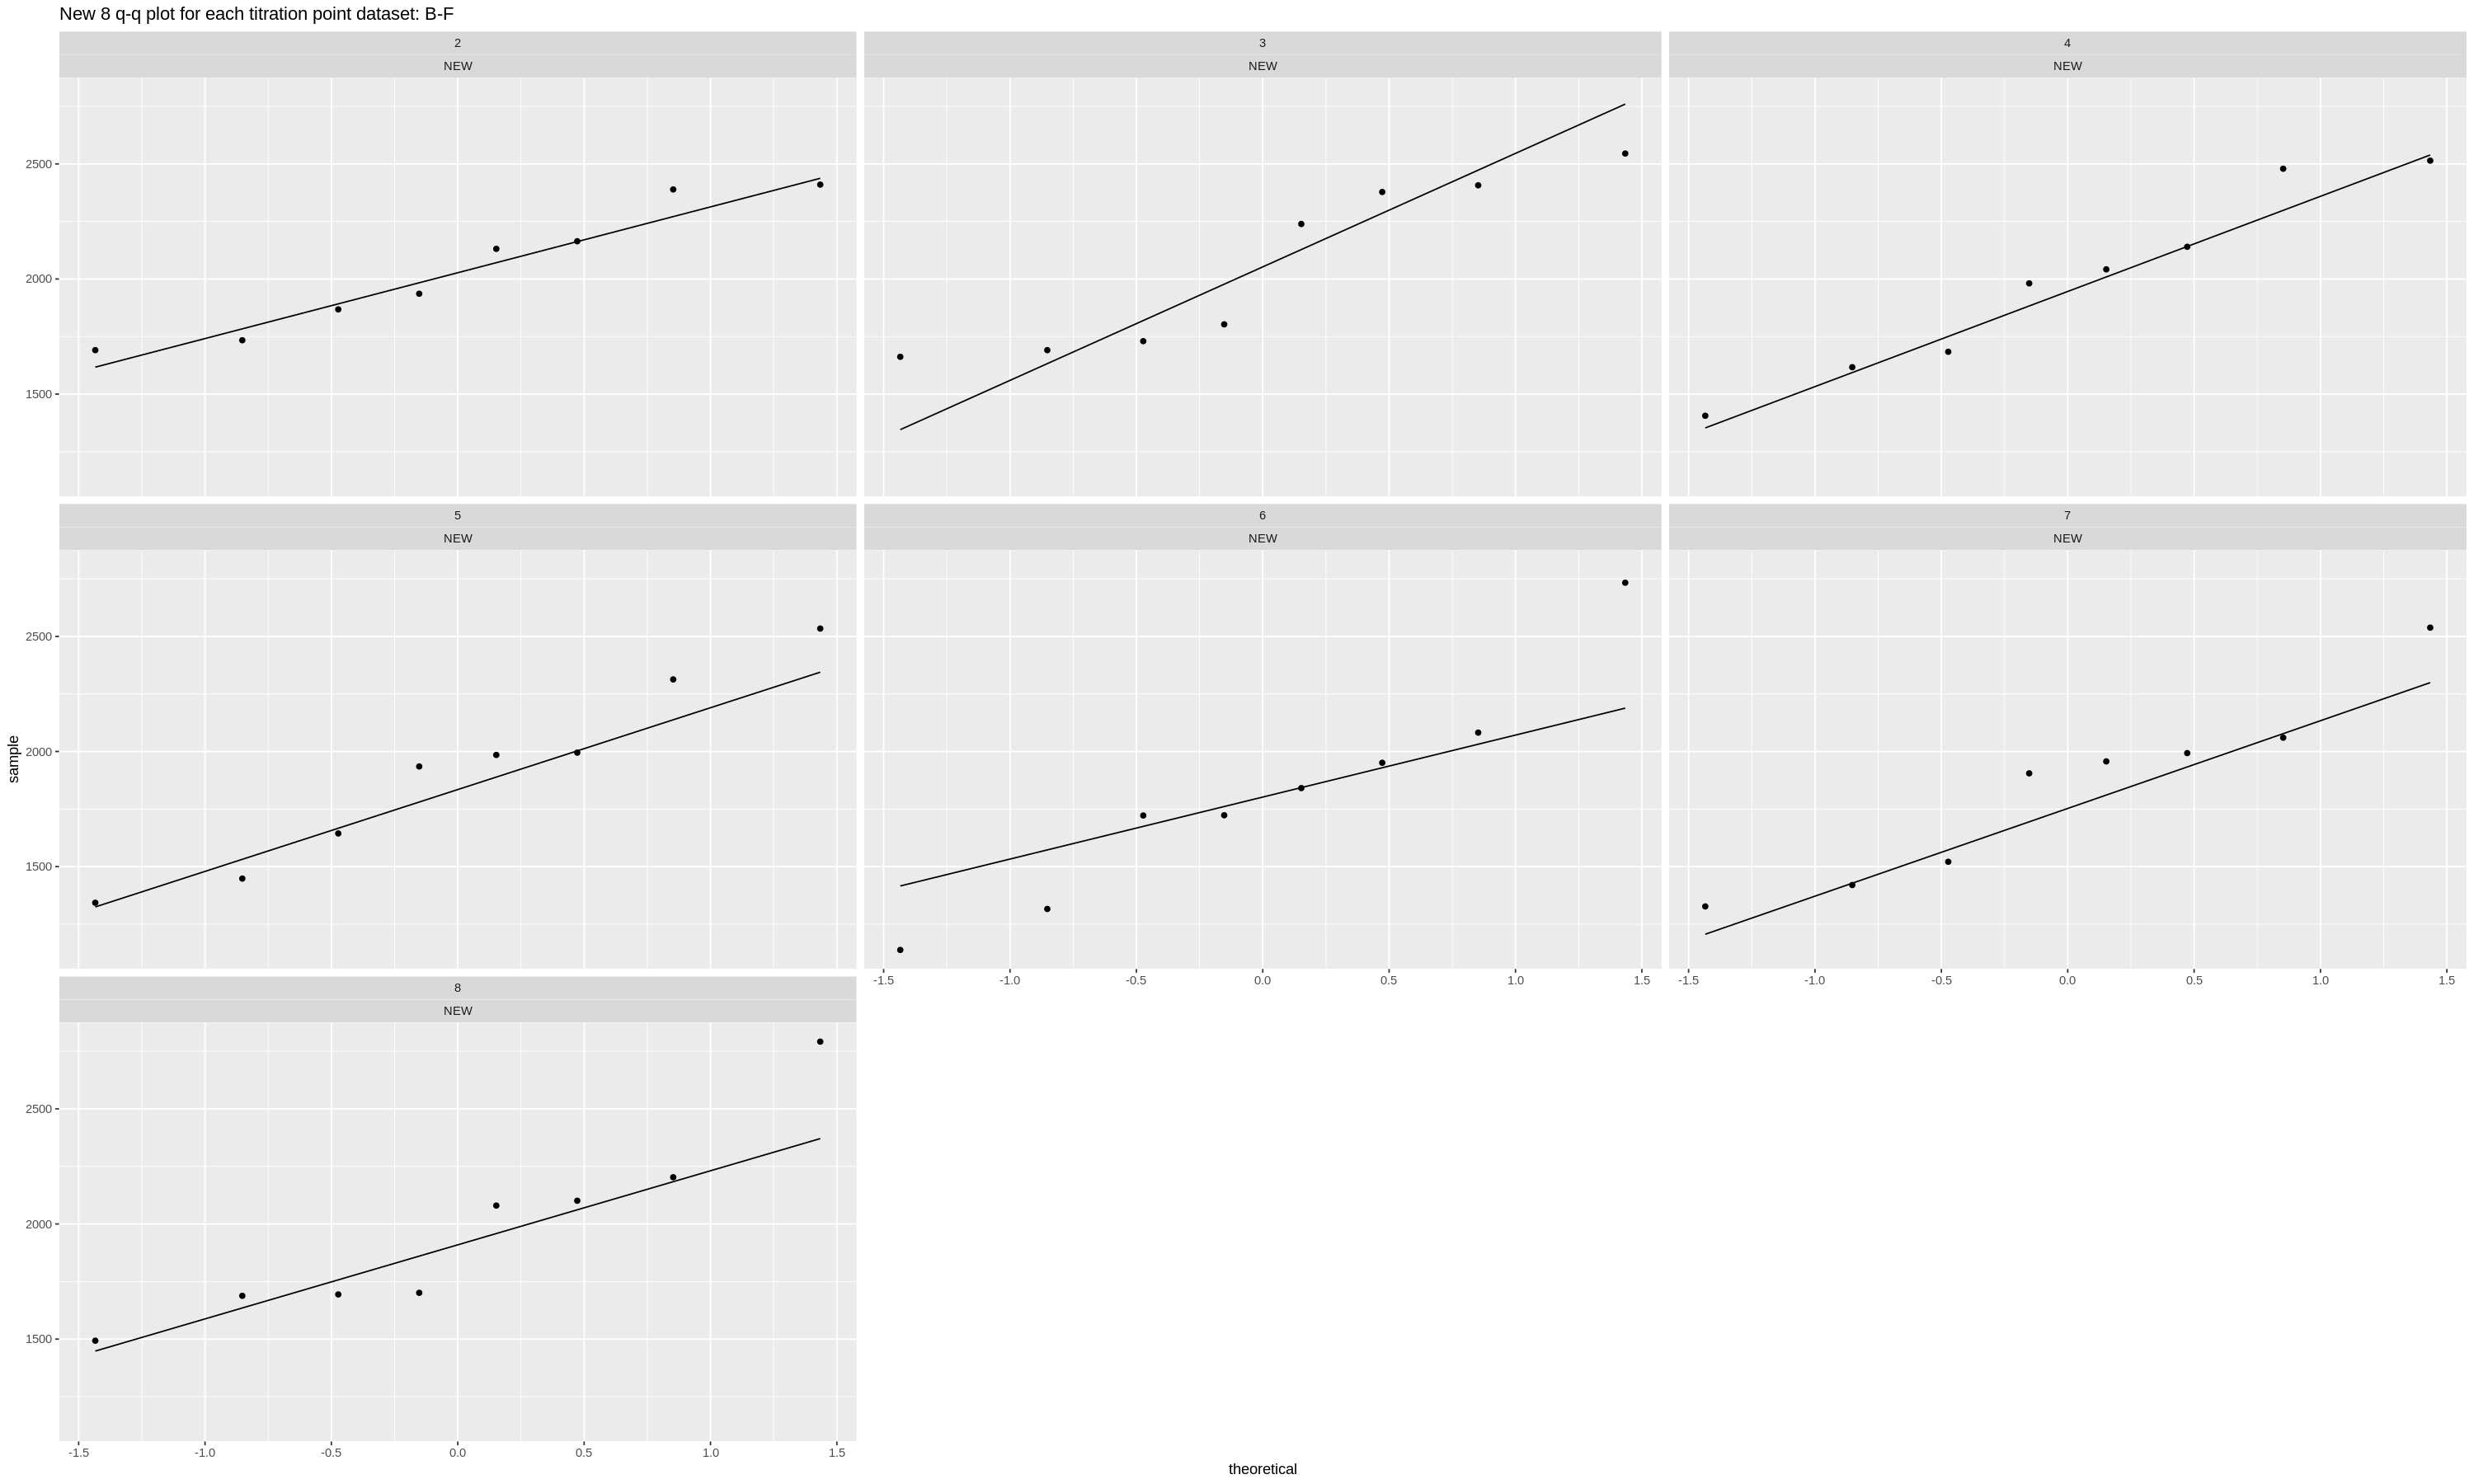

In [400]:
j = 2
mtd = "NEW"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)
ggplot(df.tmp, aes(sample = Z)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(X~ method) +
            ggtitle(paste("New 8 q-q plot for each titration point dataset:", row_group))

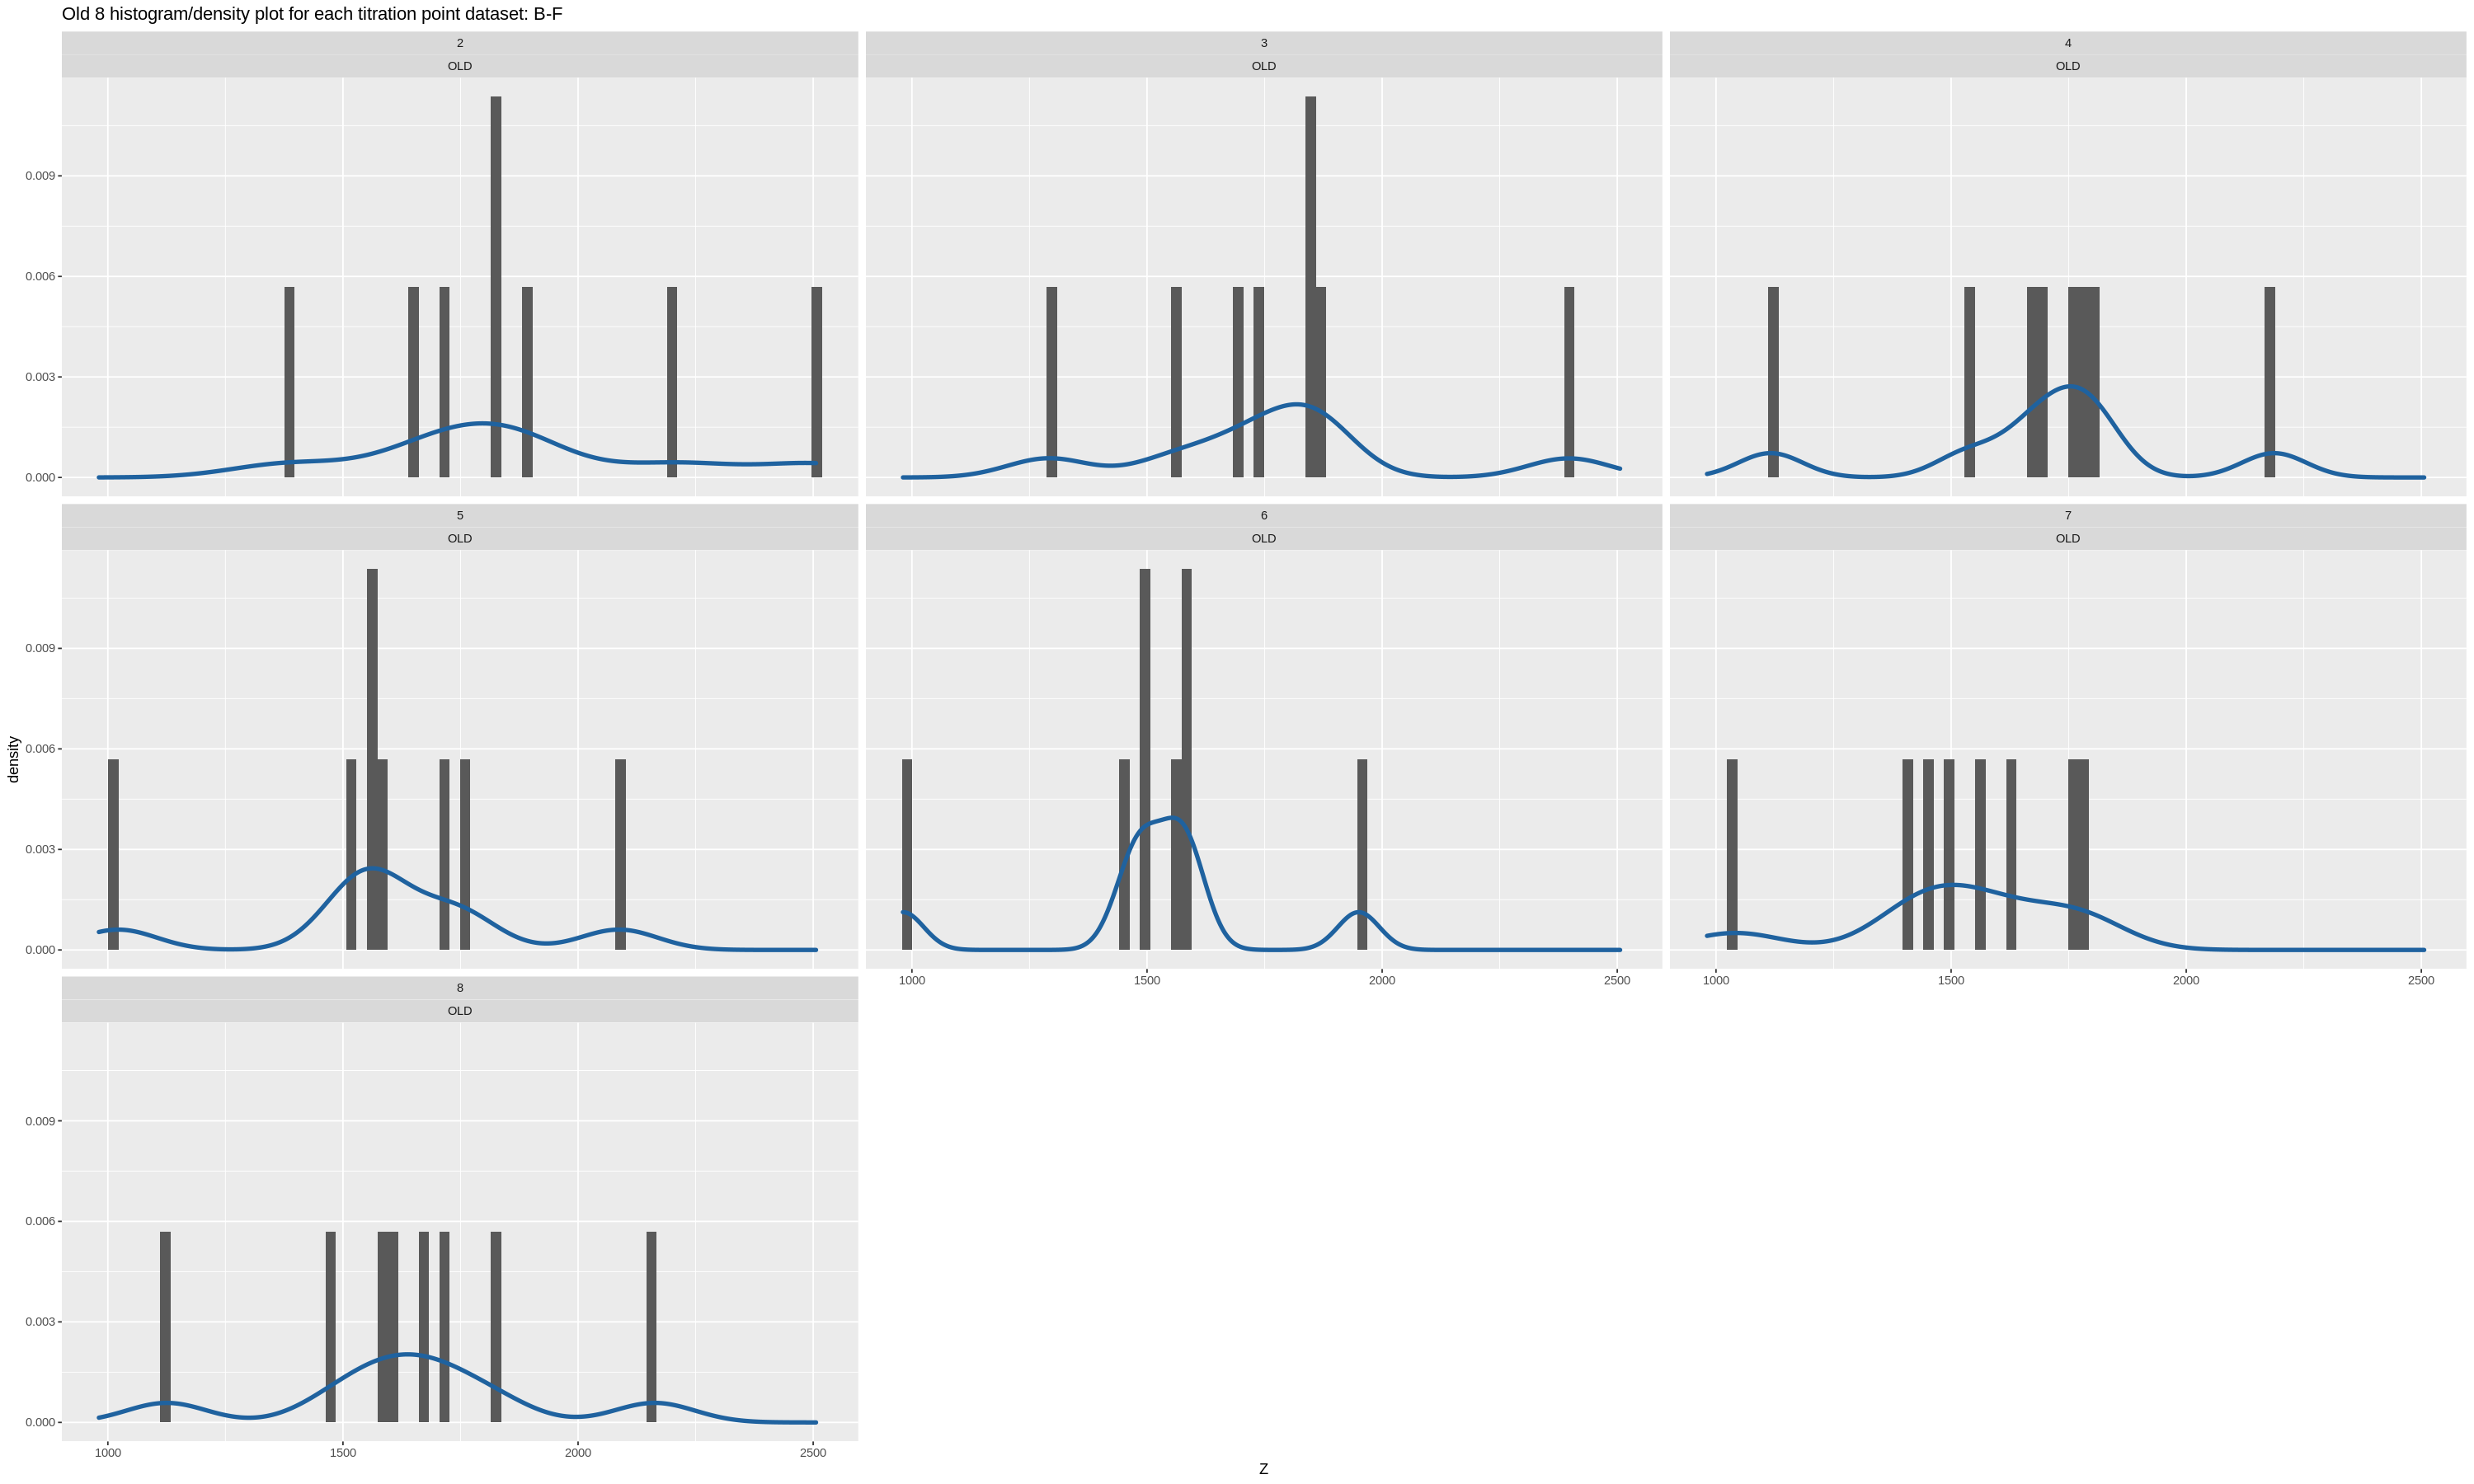

In [401]:
j = 2
mtd = "OLD"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)

ggplot(data = df.tmp, aes(x = Z)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(X~ method) +
    ggtitle(paste("Old 8 histogram/density plot for each titration point dataset:",row_group))

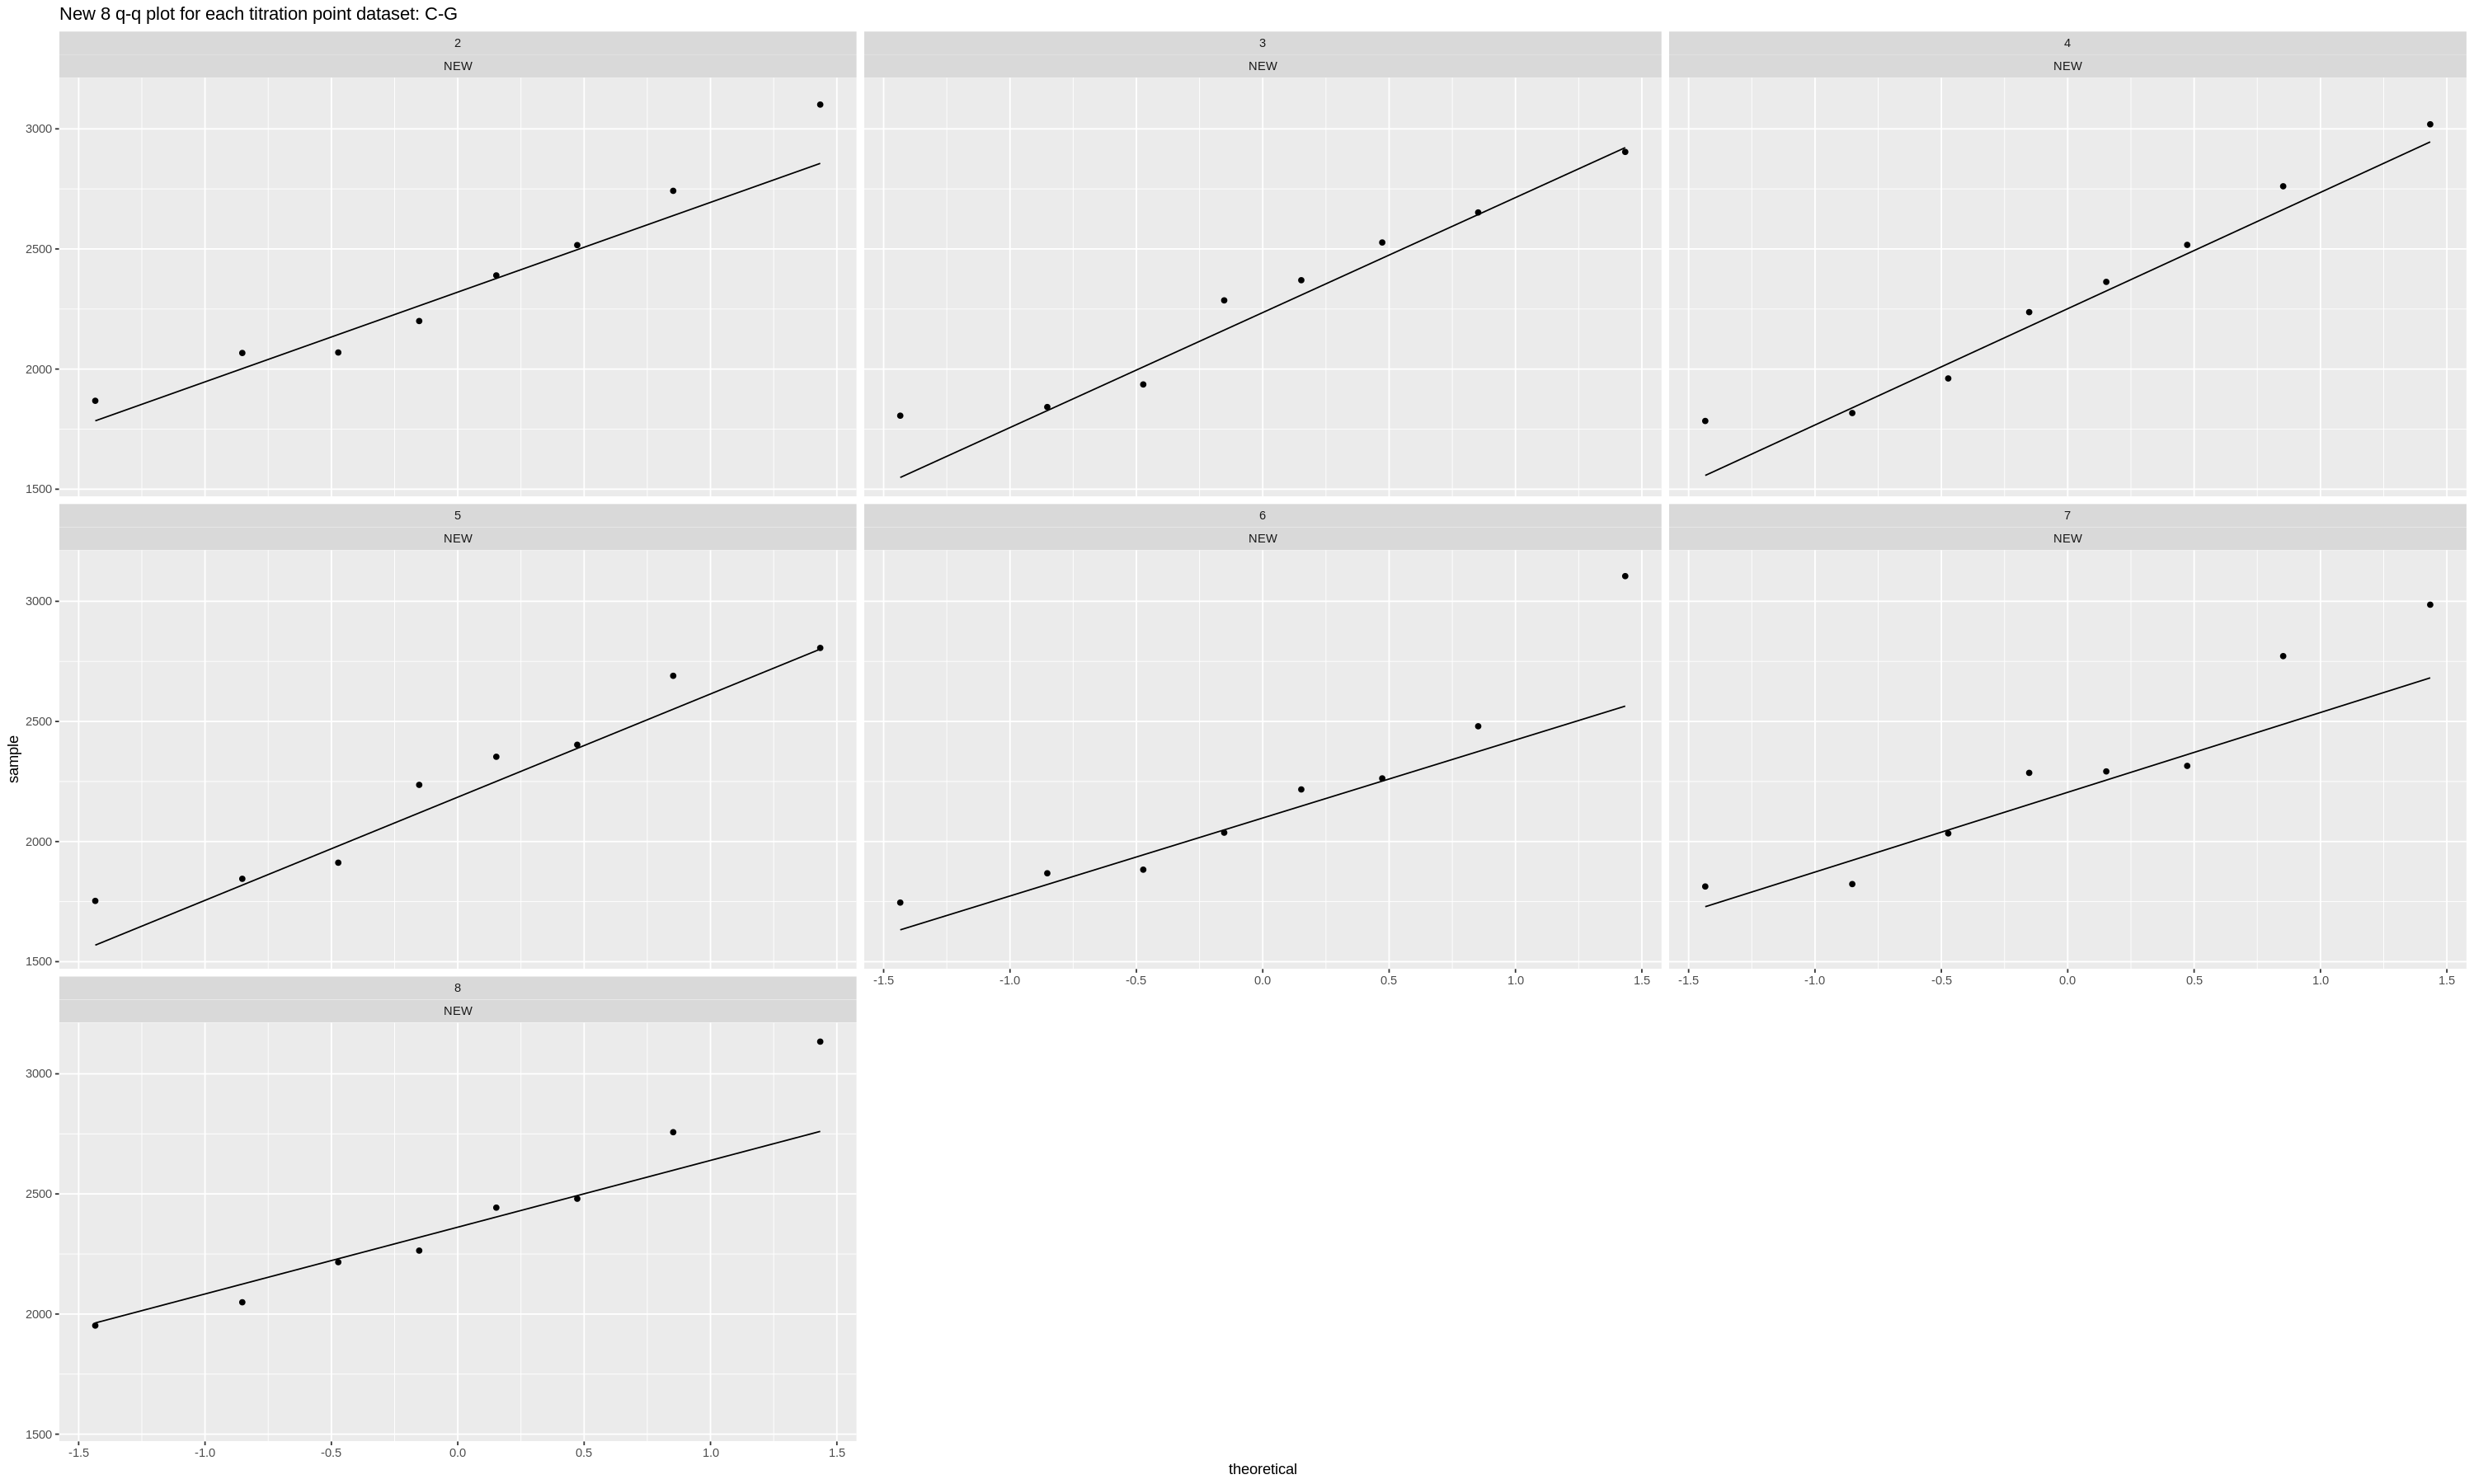

In [402]:
j = 3
mtd = "NEW"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)
ggplot(df.tmp, aes(sample = Z)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(X~ method) +
            ggtitle(paste("New 8 q-q plot for each titration point dataset:", row_group))

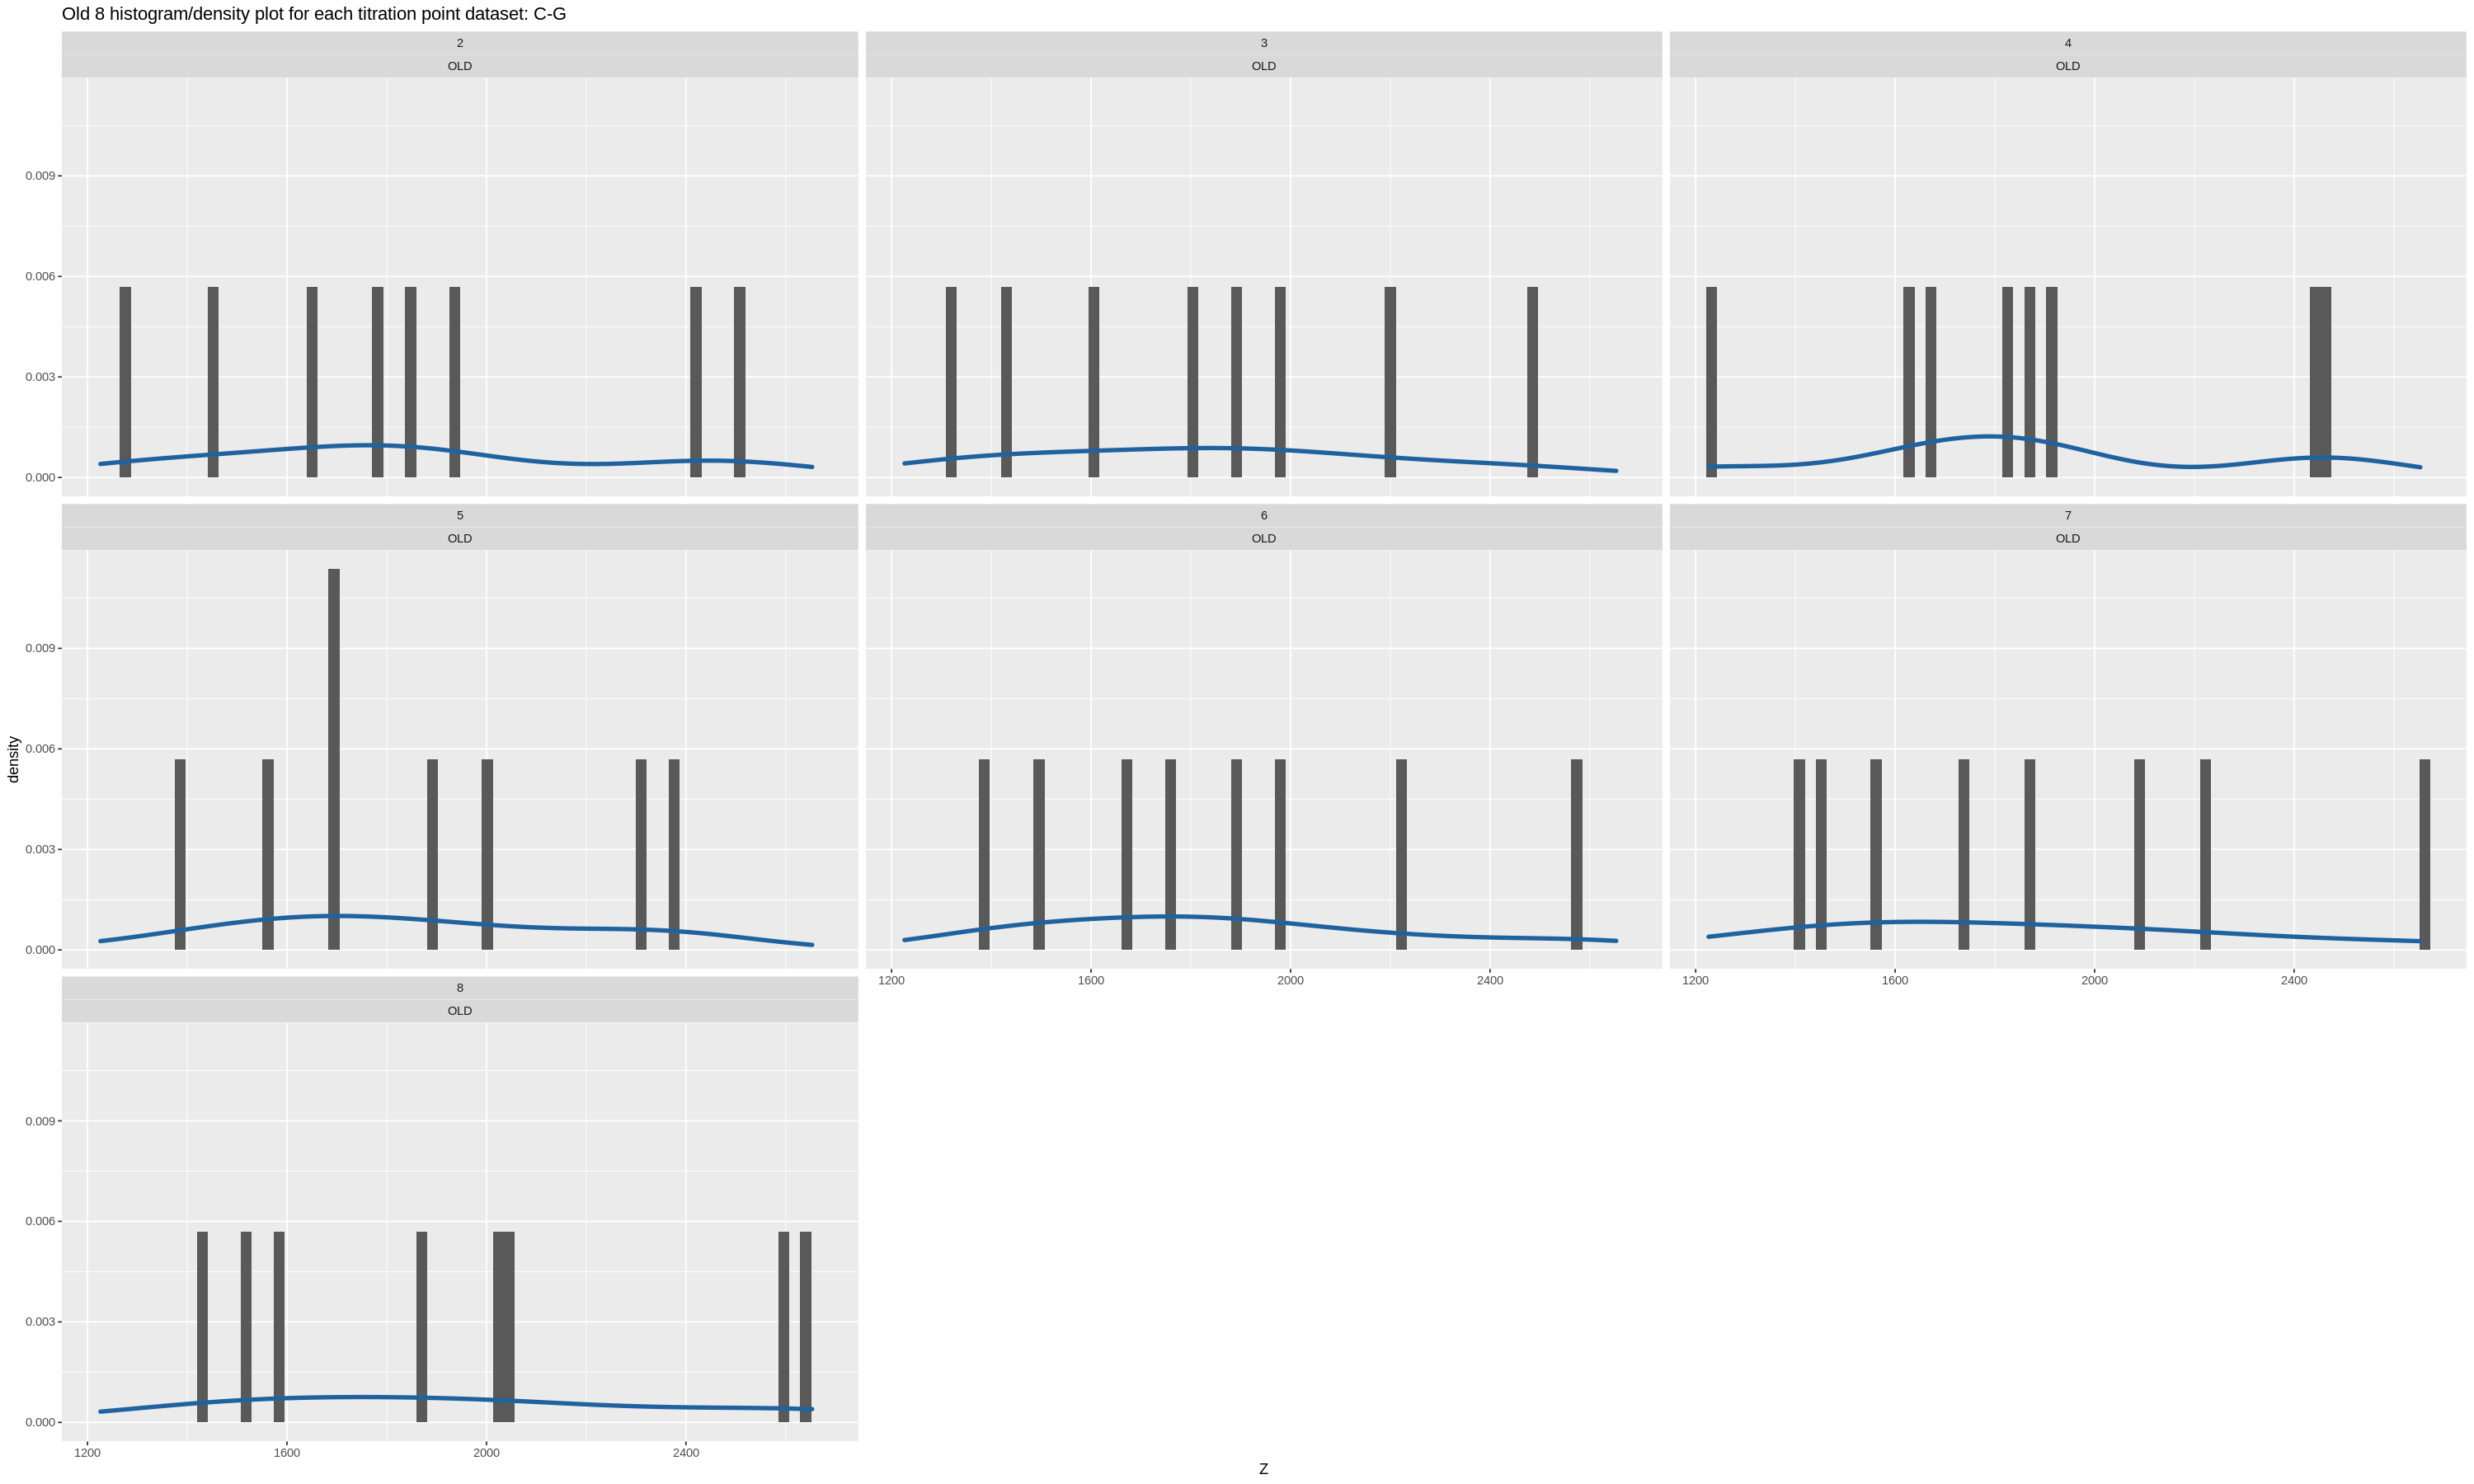

In [403]:

j = 3
mtd = "OLD"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)

ggplot(data = df.tmp, aes(x = Z)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(X~ method) +
    ggtitle(paste("Old 8 histogram/density plot for each titration point dataset:",row_group))

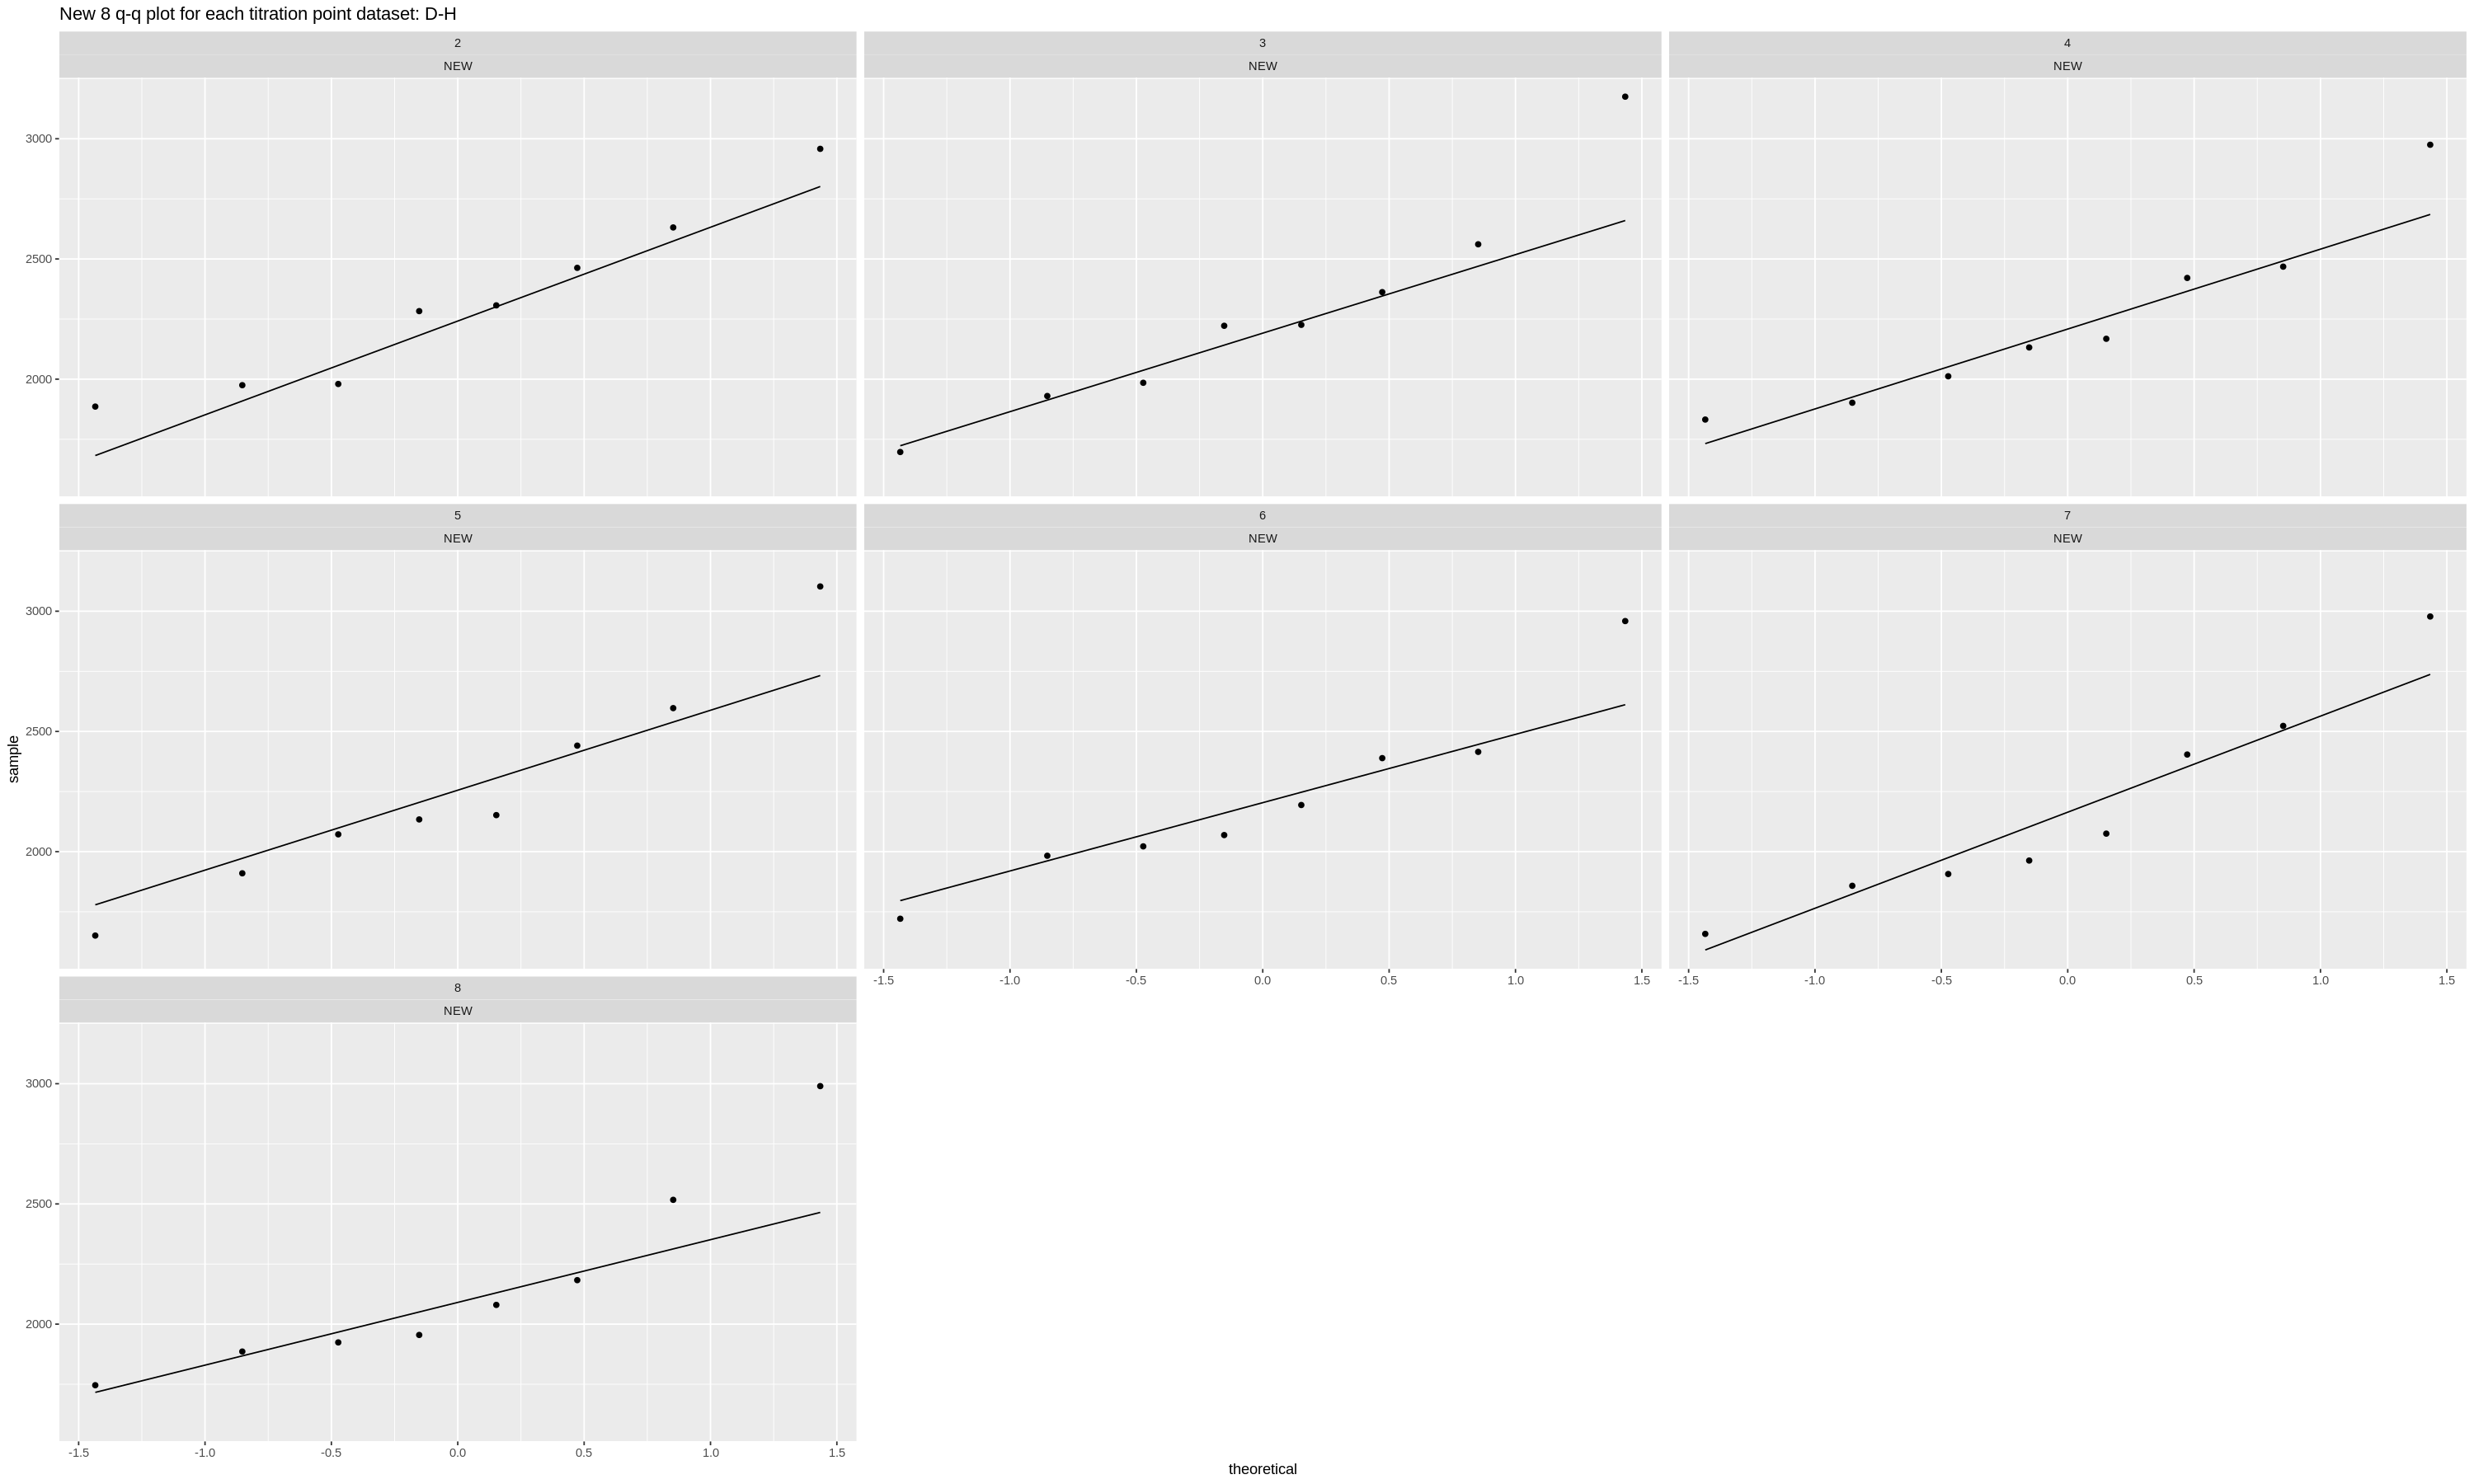

In [404]:

j = 4
mtd = "NEW"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)
ggplot(df.tmp, aes(sample = Z)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(X~ method) +
            ggtitle(paste("New 8 q-q plot for each titration point dataset:", row_group))

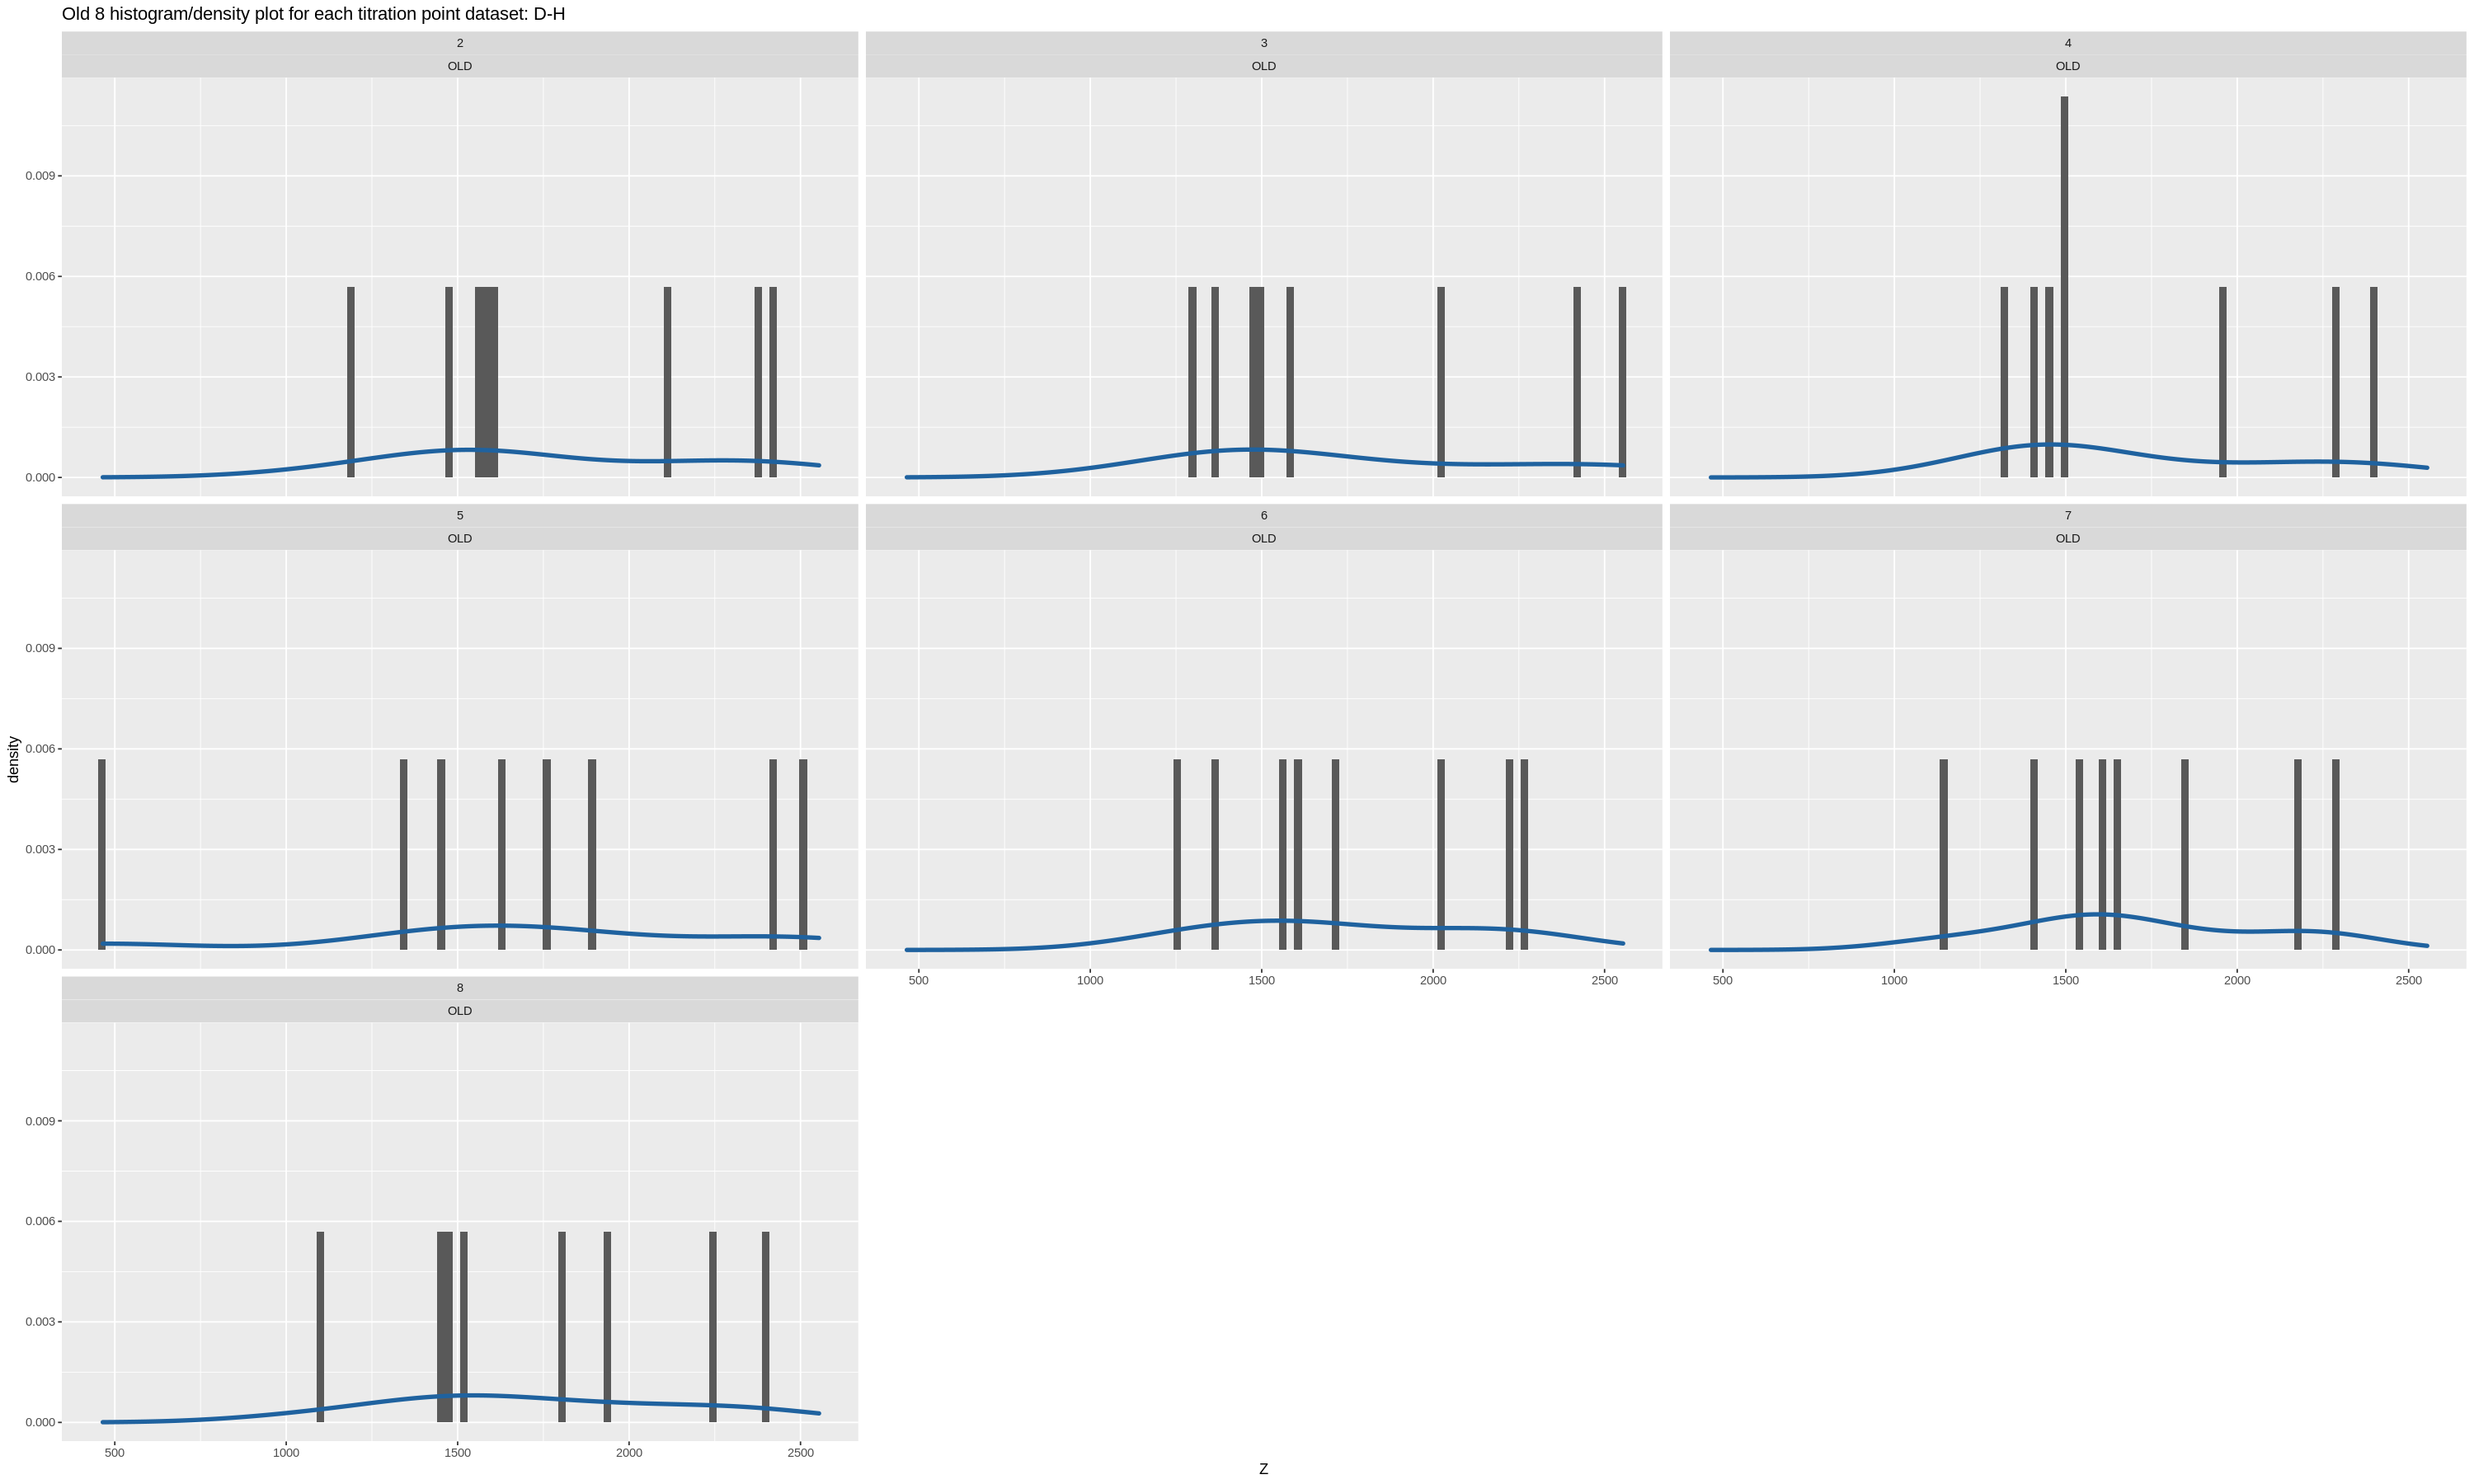

In [405]:

j = 4
mtd = "OLD"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)

ggplot(data = df.tmp, aes(x = Z)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(X~ method) +
    ggtitle(paste("Old 8 histogram/density plot for each titration point dataset:",row_group))

### Wilcoxon rank test

- check that the median of pairwise differences is different 
- non-parametric statistical test to compare 2 related samples, matched samples or repeated measurements on single sample to assess whether their population mean ranks differ 
- an alternative to t-test; this is when we can't assume the two populatios are normally distributed; determine wheterh two dependent samples were selected from populations have the same distribution
- analysis below shows using both wilcox and t-test the sample mean for intra-plate is very different
- assume not normal distribution

#### t test for new vs old plate sets
- check mean sample difference between two datasets
- requires normal and linear data

###### info
- the data will output 8 wilcoxon and t-test results for each titration point across 3 plates totalling to 6 per group since there are 2 data points per plate 

### combine all data to make general boxplot

In [406]:
dff <- df %>% mutate(subgroup = case_when(
           Y == "A" & X == 2 ~ "A2-E2",
           Y == "A" & X == 3 ~ "A3-E3",
           Y == "A" & X == 4 ~ "A4-E4",
           Y == "A" & X == 5 ~ "A5-E5",
           Y == "A" & X == 6 ~ "A6-E6",
           Y == "A" & X == 7 ~ "A7-E7",
           Y == "A" & X == 8 ~ "A8-E8",
           Y == "B" & X == 2 ~ "B2-F2",
           Y == "B" & X == 3 ~ "B3-F3",
           Y == "B" & X == 4 ~ "B4-F4",
           Y == "B" & X == 5 ~ "B5-F5",
           Y == "B" & X == 6 ~ "B6-F6",
           Y == "B" & X == 7 ~ "B7-F7",
           Y == "B" & X == 8 ~ "B8-F8",
           Y == "C" & X == 2 ~ "C2-G2",
           Y == "C" & X == 3 ~ "C3-G3",
           Y == "C" & X == 4 ~ "C4-G4",
           Y == "C" & X == 5 ~ "C5-G5",
           Y == "C" & X == 6 ~ "C6-G6",
           Y == "C" & X == 7 ~ "C7-G7",
           Y == "C" & X == 8 ~ "C8-G8",
           Y == "D" & X == 2 ~ "D2-H2",
           Y == "D" & X == 3 ~ "D3-H3",
           Y == "D" & X == 4 ~ "D4-H4",
           Y == "D" & X == 5 ~ "D5-H5",
           Y == "D" & X == 6 ~ "D6-H6",
           Y == "D" & X == 7 ~ "D7-H7",
           Y == "D" & X == 8 ~ "D8-H8",
           Y == "E" & X == 2 ~ "A2-E2",
           Y == "E" & X == 3 ~ "A3-E3",
           Y == "E" & X == 4 ~ "A4-E4",
           Y == "E" & X == 5 ~ "A5-E5",
           Y == "E" & X == 6 ~ "A6-E6",
           Y == "E" & X == 7 ~ "A7-E7",
           Y == "E" & X == 8 ~ "A8-E8",
           Y == "F" & X == 2 ~ "B2-F2",
           Y == "F" & X == 3 ~ "B3-F3",
           Y == "F" & X == 4 ~ "B4-F4",
           Y == "F" & X == 5 ~ "B5-F5",
           Y == "F" & X == 6 ~ "B6-F6",
           Y == "F" & X == 7 ~ "B7-F7",
           Y == "F" & X == 8 ~ "B8-F8",
           Y == "G" & X == 2 ~ "C2-G2",
           Y == "G" & X == 3 ~ "C3-G3",
           Y == "G" & X == 4 ~ "C4-G4",
           Y == "G" & X == 5 ~ "C5-G5",
           Y == "G" & X == 6 ~ "C6-G6",
           Y == "G" & X == 7 ~ "C7-G7",
           Y == "G" & X == 8 ~ "C8-G8",
           Y == "H" & X == 2 ~ "D2-H2",
           Y == "H" & X == 3 ~ "D3-H3",
           Y == "H" & X == 4 ~ "D4-H4",
           Y == "H" & X == 5 ~ "D5-H5",
           Y == "H" & X == 6 ~ "D6-H6",
           Y == "H" & X == 7 ~ "D7-H7",
           Y == "H" & X == 8 ~ "D8-H8"
           )
          ) %>%
    mutate(wellid = paste0(Y, X))

### ANOVA cell count

In [487]:
dfm.t <- dff %>% mutate(anova = paste0(subgroup, "-", plate, "-", method))
df_stats = data.frame()
ls_tukey = list()
ls_pair = list()
row_idx = 1

for (r in rows) {
    for (i in seq(2,8)) {
        sg = paste0(r[1],i,"-",r[2],i)
        df_stats[row_idx, "ROW.GROUP"] = sg 
        df.t <- dfm.t %>% filter(subgroup == sg)

        res.aov <- aov(Z ~ anova, data = df.t)
        stat <- summary(res.aov)
        df_stats[row_idx, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
        print(stat)
        stat <- TukeyHSD(res.aov)
        ls_tukey[[row_idx]] <- data.frame(stat$anova)
        
        stat <- pairwise.t.test(df.t$Z, df.t$anova,
                     p.adjust.method = "BH")
        ls_pair[[row_idx]] <- data.frame(stat$p.value)
        ls_pair[[row_idx]] <- rbind(names(ls_pair[[row_idx]]), ls_pair[[row_idx]])
        colnames(ls_pair[[row_idx]]) <- paste0("COL", seq(7))
        rownames(ls_pair[[row_idx]])[1] <- row_idx
        row_idx = row_idx + 1
    }
}
df_tukey <- do.call(rbind, ls_tukey)
# logic to get colnames of each df and put at top and rename colnames for universal dataframe
df_pair <- do.call(rbind, ls_pair)
write.csv(df_pair, paste0("8v8_pair_count_cmbplts.csv"))
write.csv(df_tukey, paste0("8v8_tukey_count_cmbplts.csv"))
write.csv(df_stats, paste0("8v8_anova_count_cmbplts.csv"), row.names = FALSE)

            Df  Sum Sq Mean Sq F value  Pr(>F)   
anova        7 2163763  309109   10.68 0.00168 **
Residuals    8  231658   28957                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df  Sum Sq Mean Sq F value Pr(>F)  
anova        7 2759106  394158     5.2 0.0168 *
Residuals    8  606452   75806                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df  Sum Sq Mean Sq F value Pr(>F)  
anova        7 3373669  481953   5.351 0.0154 *
Residuals    8  720487   90061                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df  Sum Sq Mean Sq F value  Pr(>F)   
anova        7 3304502  472072   6.674 0.00787 **
Residuals    8  565900   70738                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df  Sum Sq Mean Sq F value  Pr(>F)   
anova        7 3289868  469981   6.277 0.00952 **
Residuals    8  598961   74870              

In [407]:
head(dff)

X Y Z    row.group method plate   subgroup wellid
1 2 A 1692 A-E       NEW    PLATE 1 A2-E2    A2    
2 3 A 1720 A-E       NEW    PLATE 1 A3-E3    A3    
3 4 A 2017 A-E       NEW    PLATE 1 A4-E4    A4    
4 5 A 1635 A-E       NEW    PLATE 1 A5-E5    A5    
5 6 A 1935 A-E       NEW    PLATE 1 A6-E6    A6    
6 7 A 2039 A-E       NEW    PLATE 1 A7-E7    A7

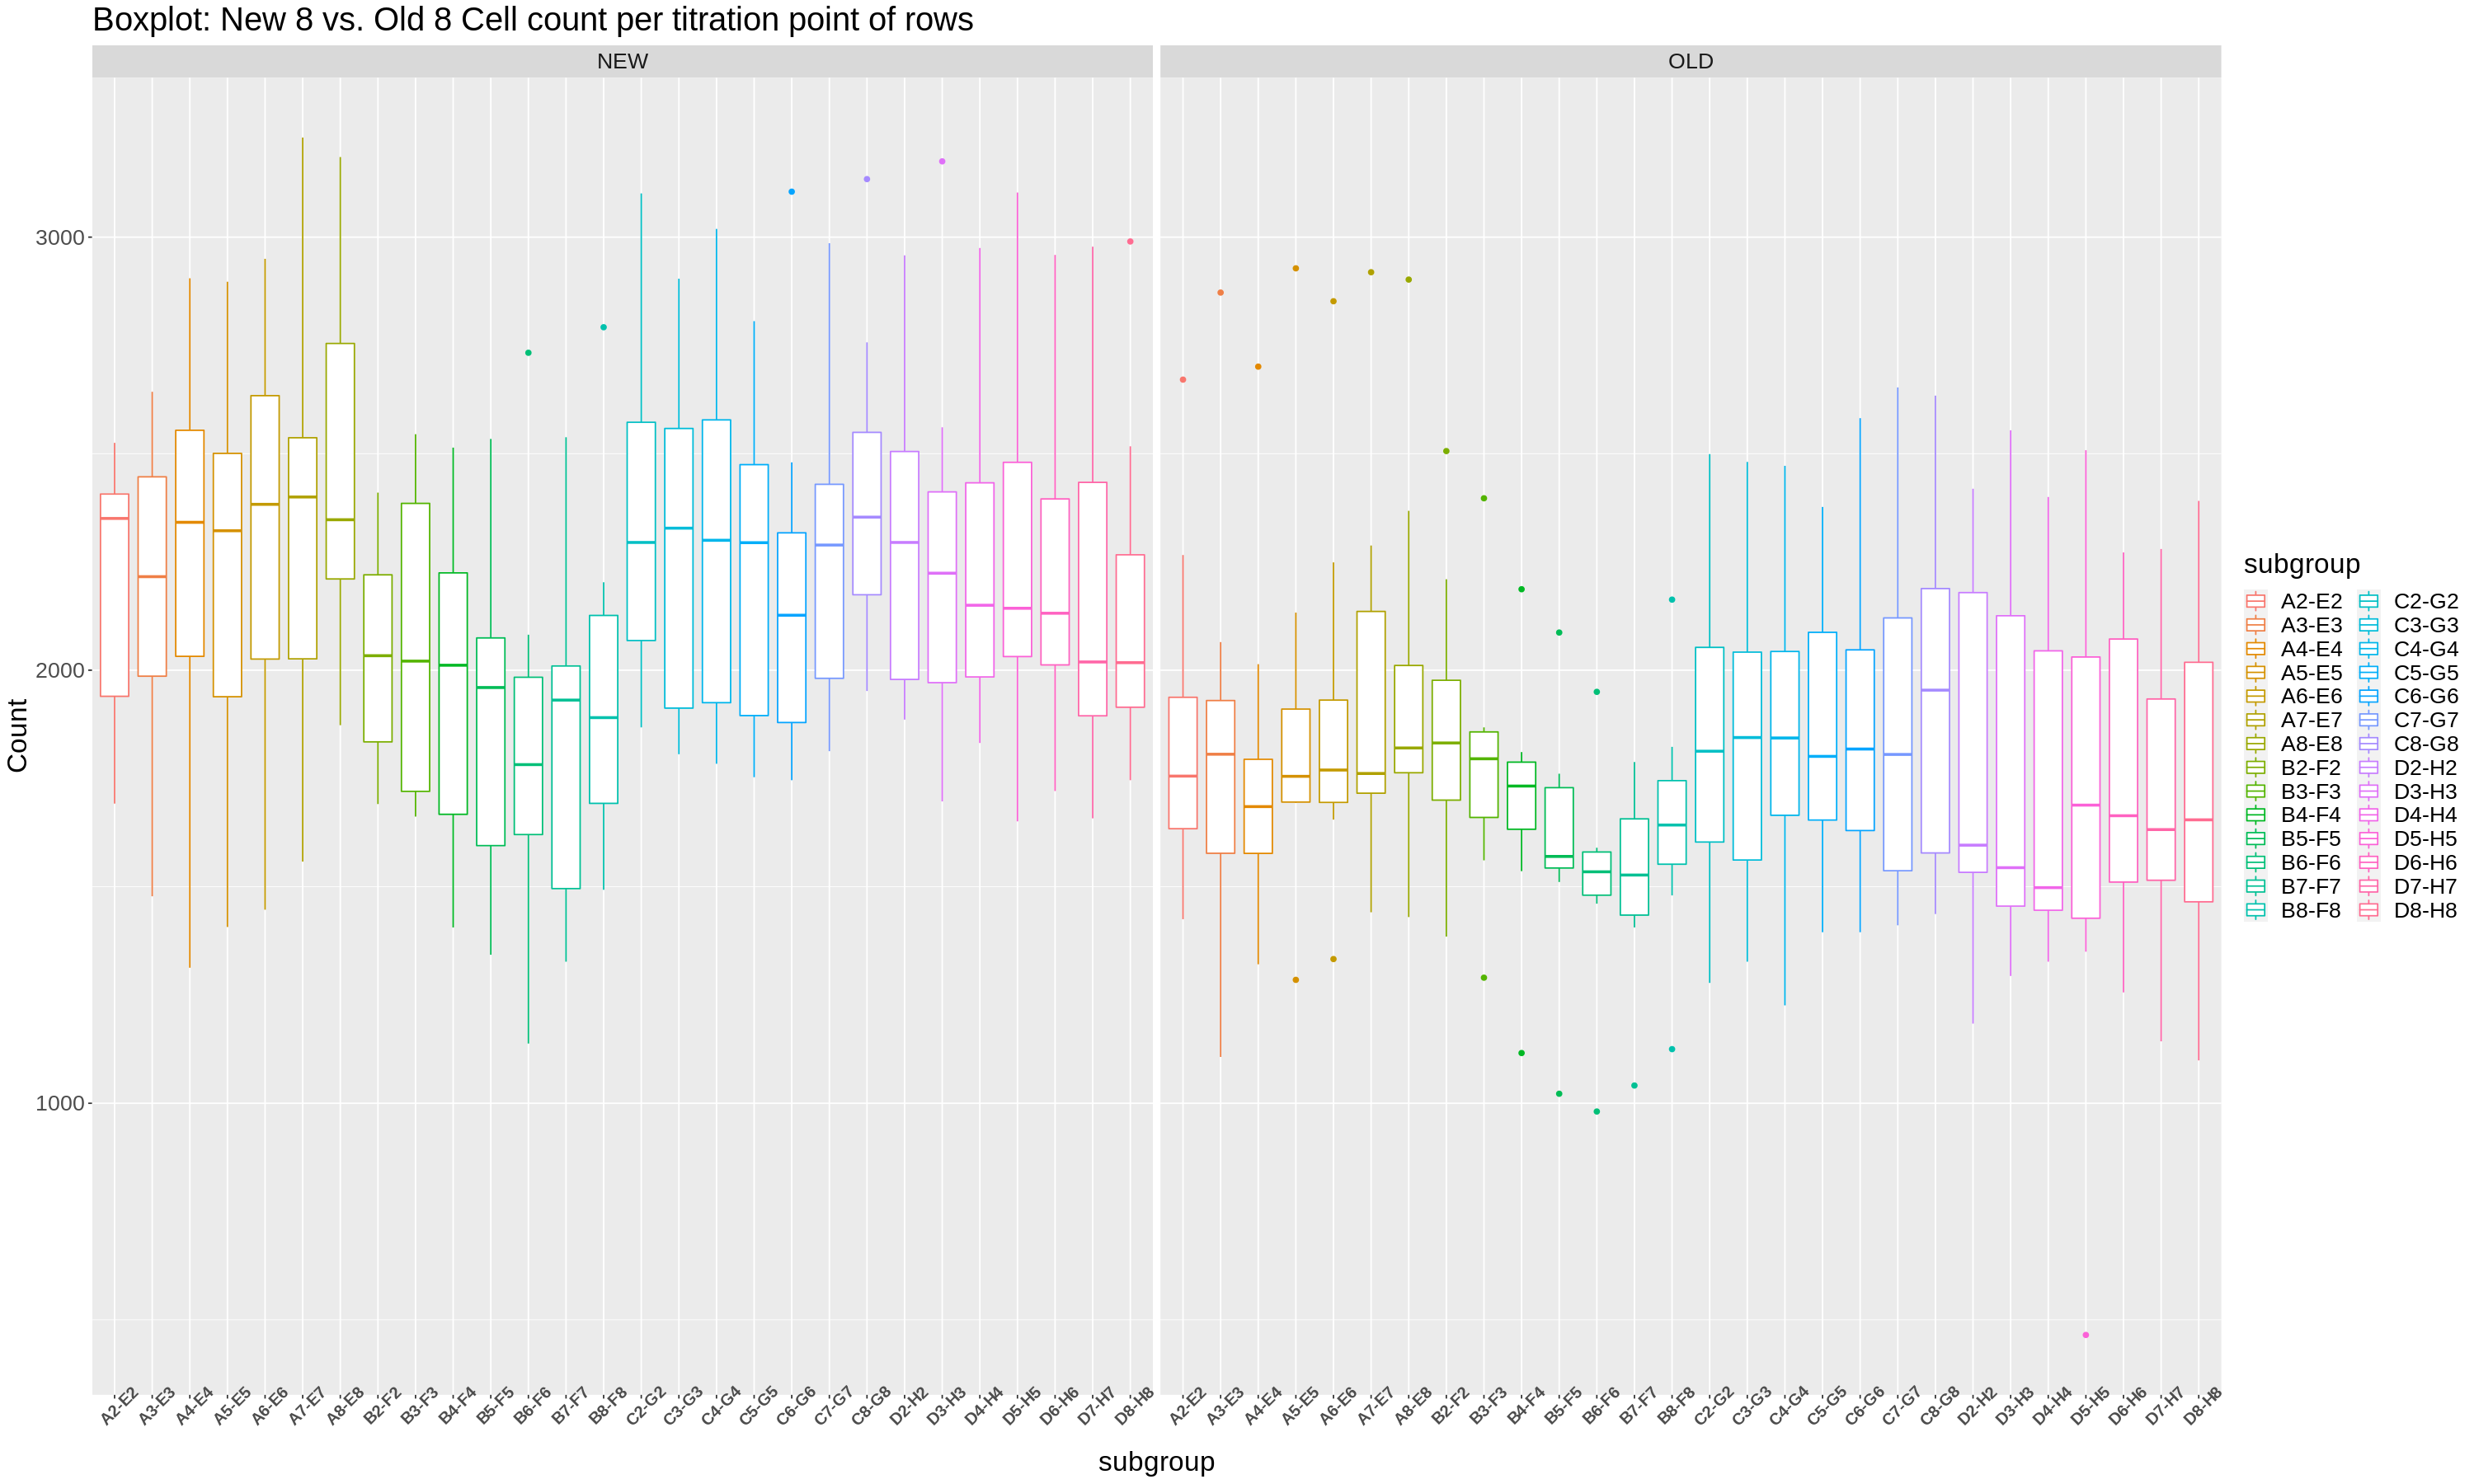

In [479]:
ggplot(dff, aes(x=subgroup,y=Z)) +
  geom_boxplot(aes(colour = subgroup)) +
  labs(title="Boxplot: New 8 vs. Old 8 Cell count per titration point of rows") +
  ylab("Count") +
  facet_wrap(~method) + 
  theme(text = element_text(size=20),
        axis.text.x = element_text(face = "bold", 
                           size = 12, angle = 45)) 

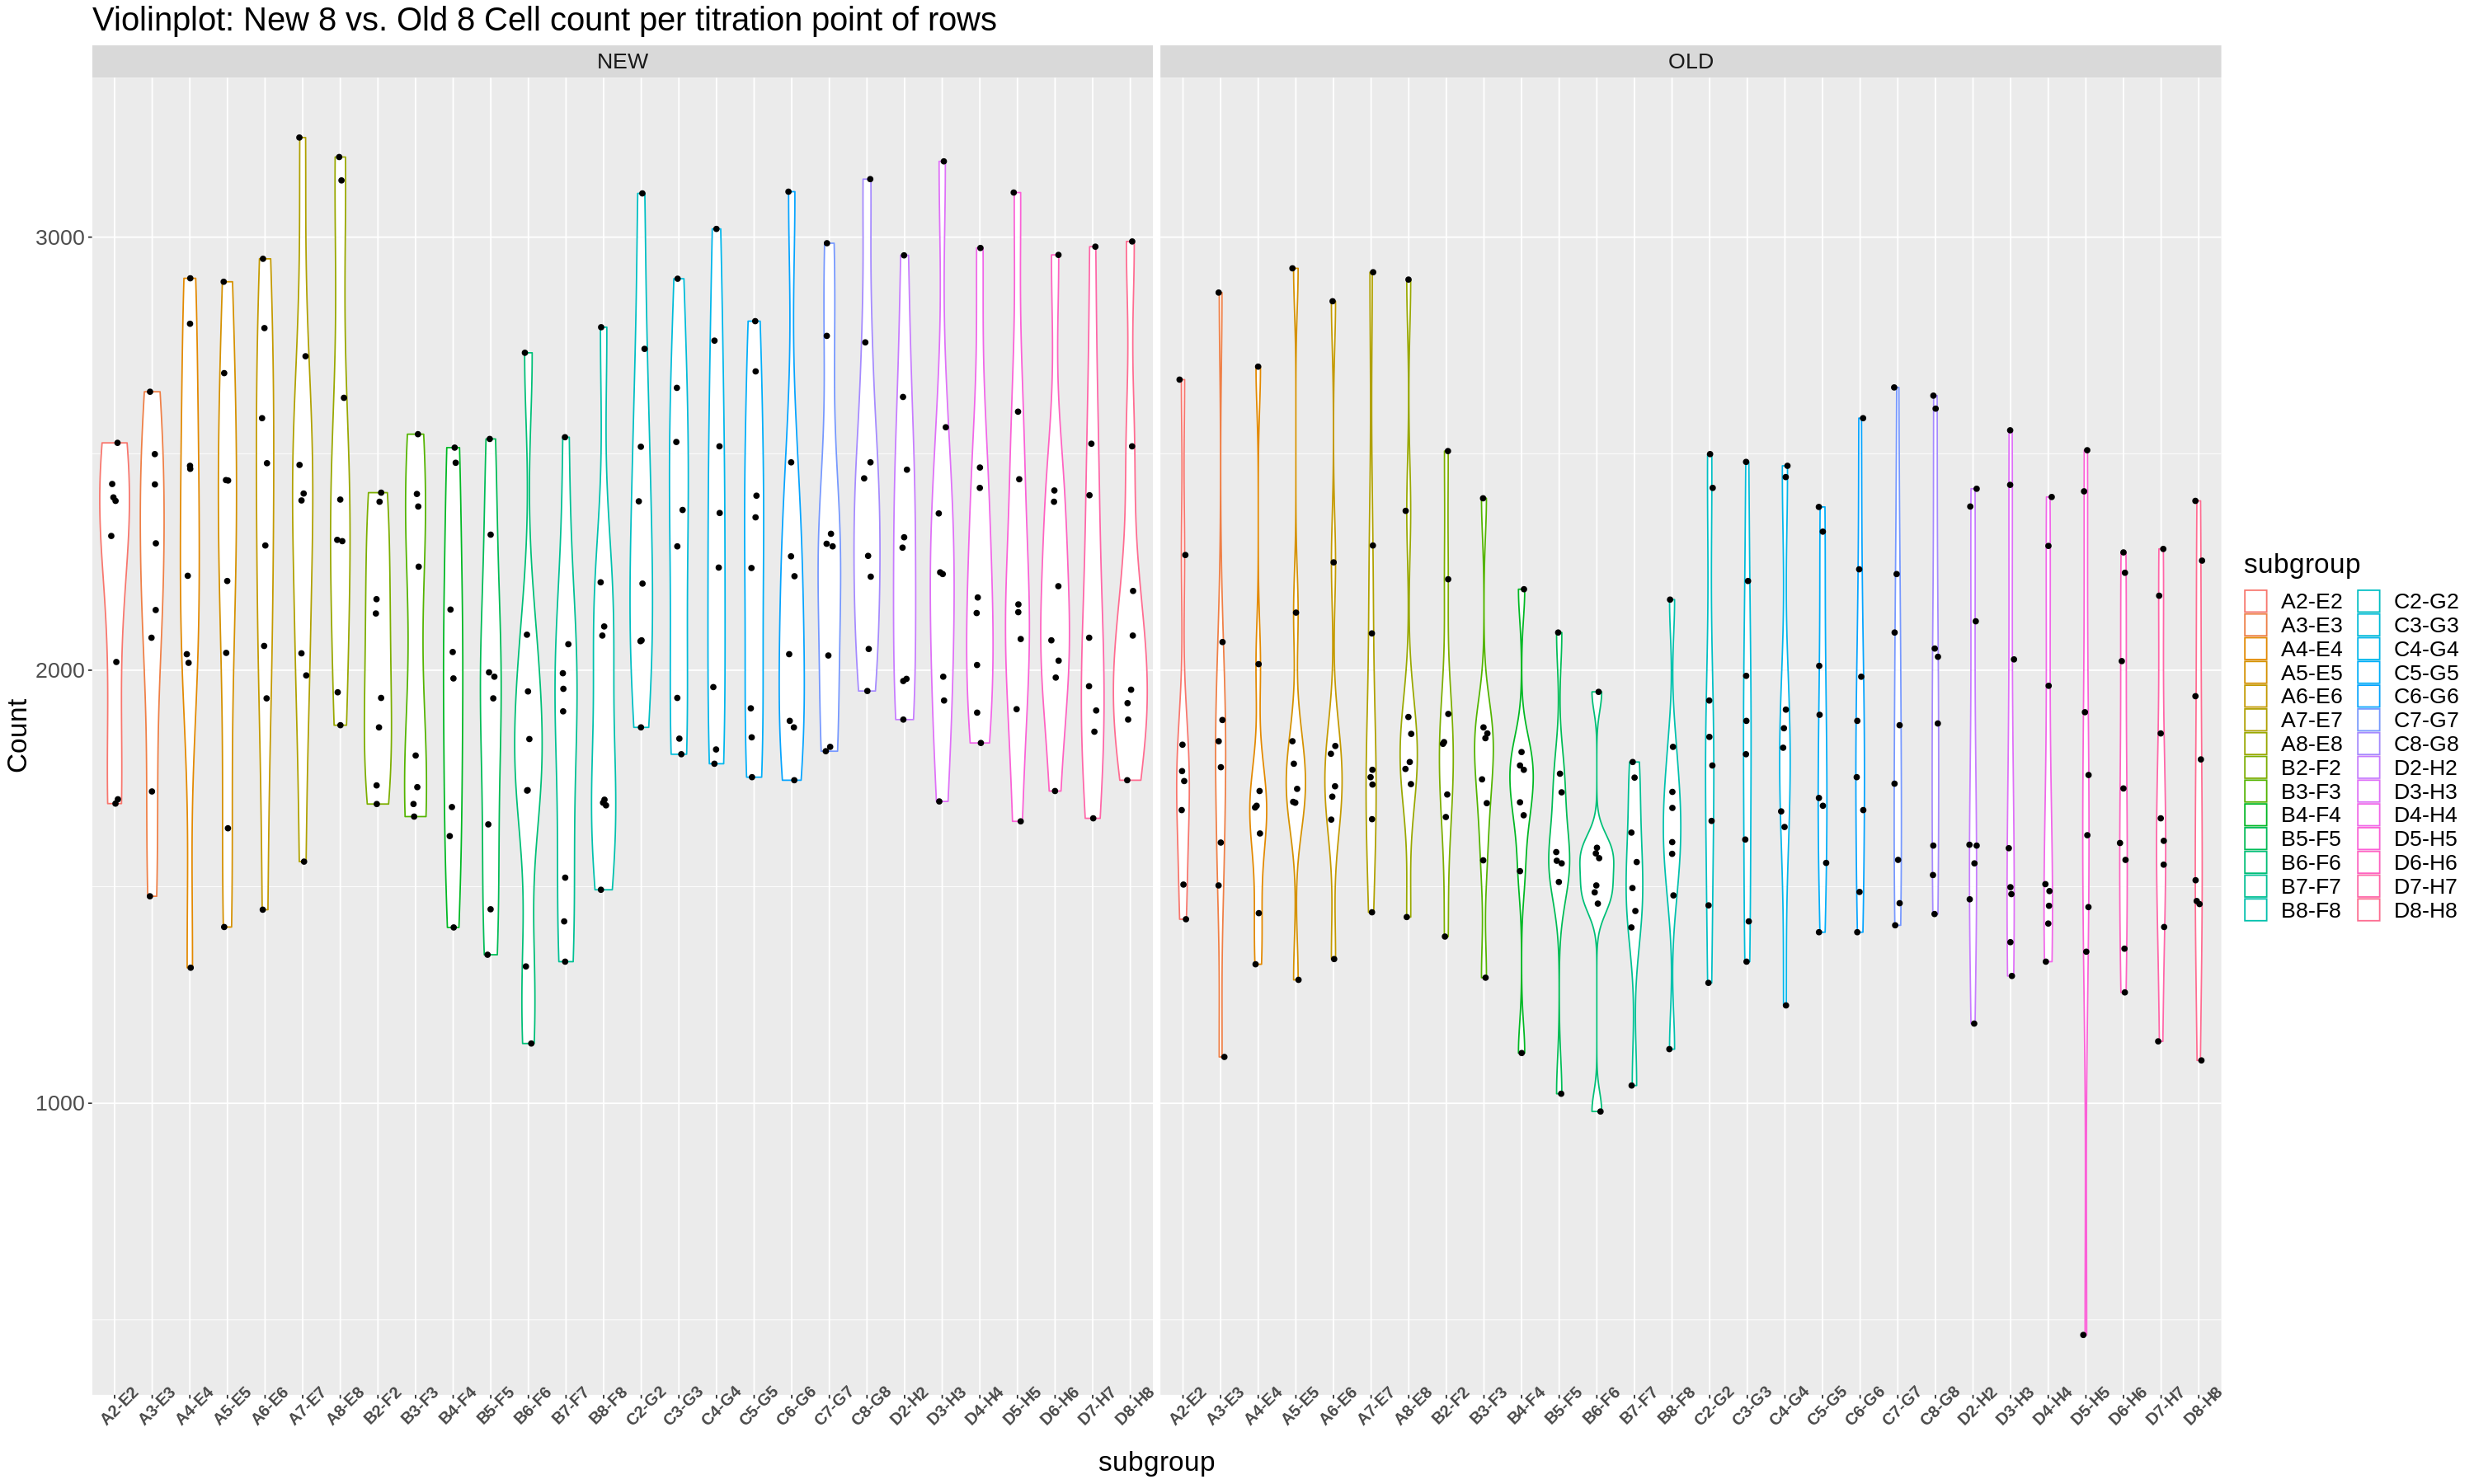

In [481]:
ggplot(dff, aes(subgroup, Z)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("Violinplot: New 8 vs. Old 8 Cell count per titration point of rows") +
    ylab("Count") +
    facet_wrap(~ method) +
    theme(text = element_text(size=20),
        axis.text.x = element_text(face = "bold", 
                           size = 12, angle = 45)) 

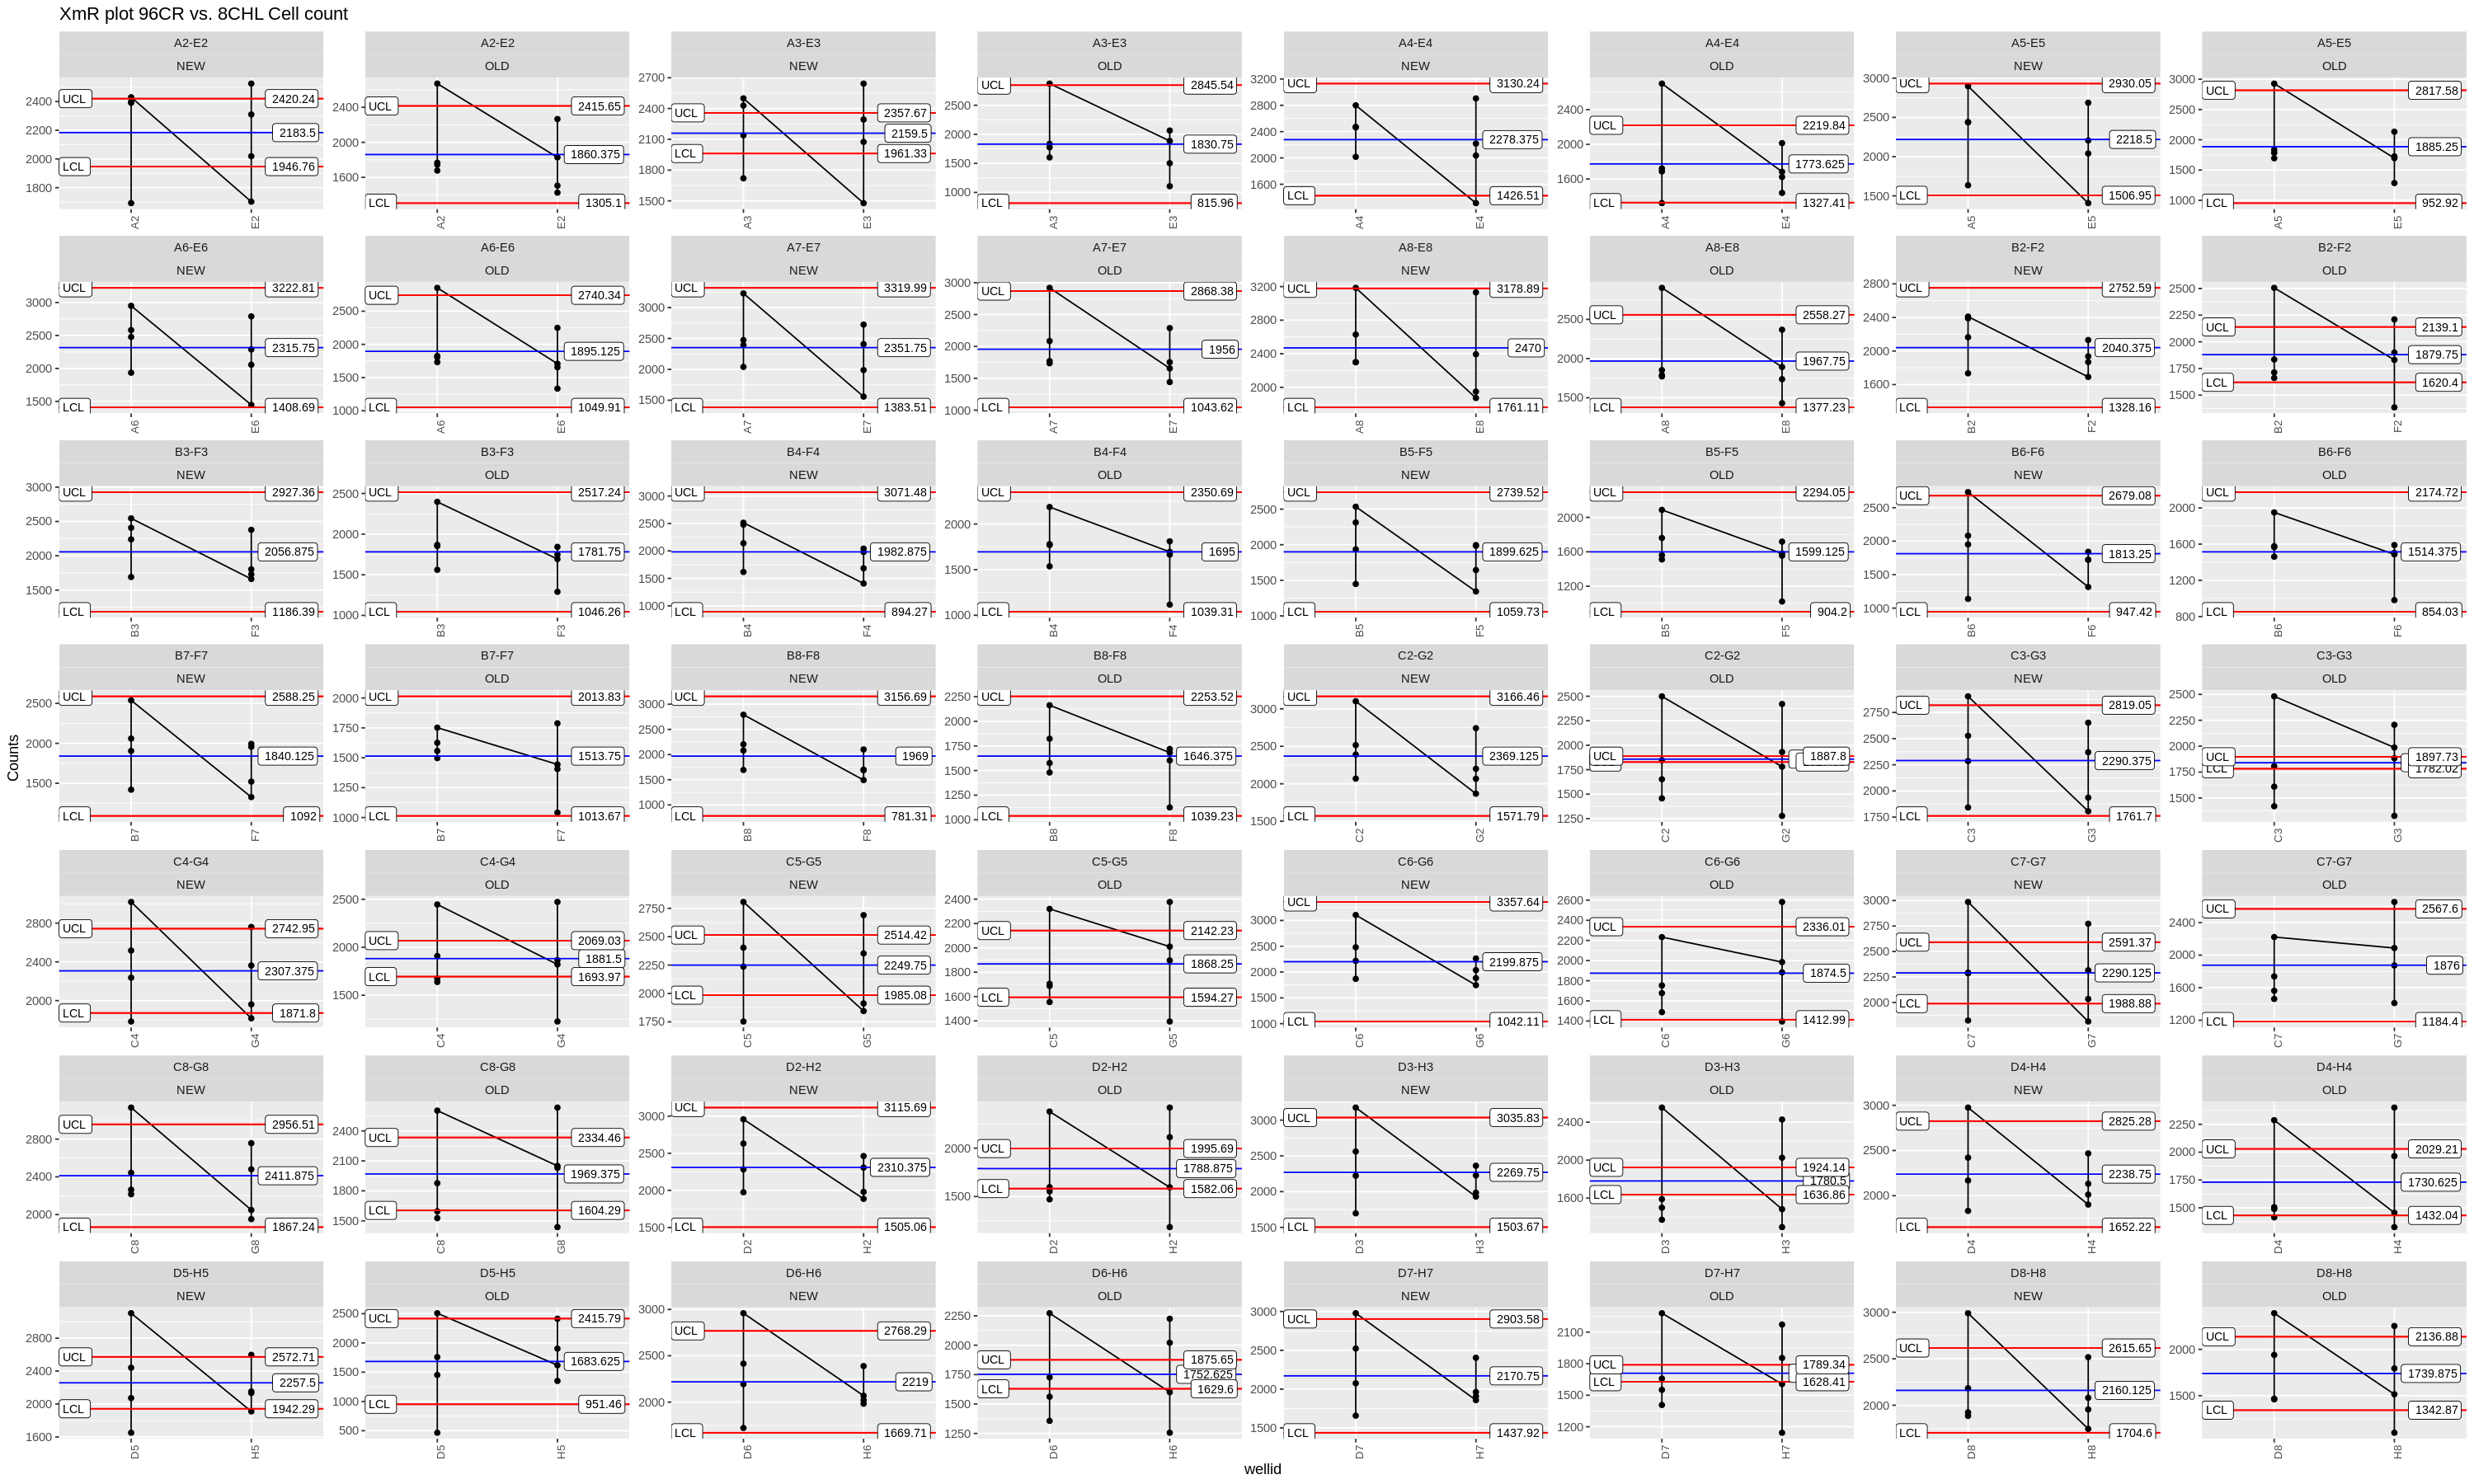

In [409]:
ggplot(dff, aes(x=wellid, y=Z, group=subgroup)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 4) + 
  ylab("Counts") +
  facet_wrap(subgroup~method, scales = "free") +
  ggtitle("XmR plot 96CR vs. 8CHL Cell count") + 
  theme(axis.text.x = element_text(size = 8, angle = 90))

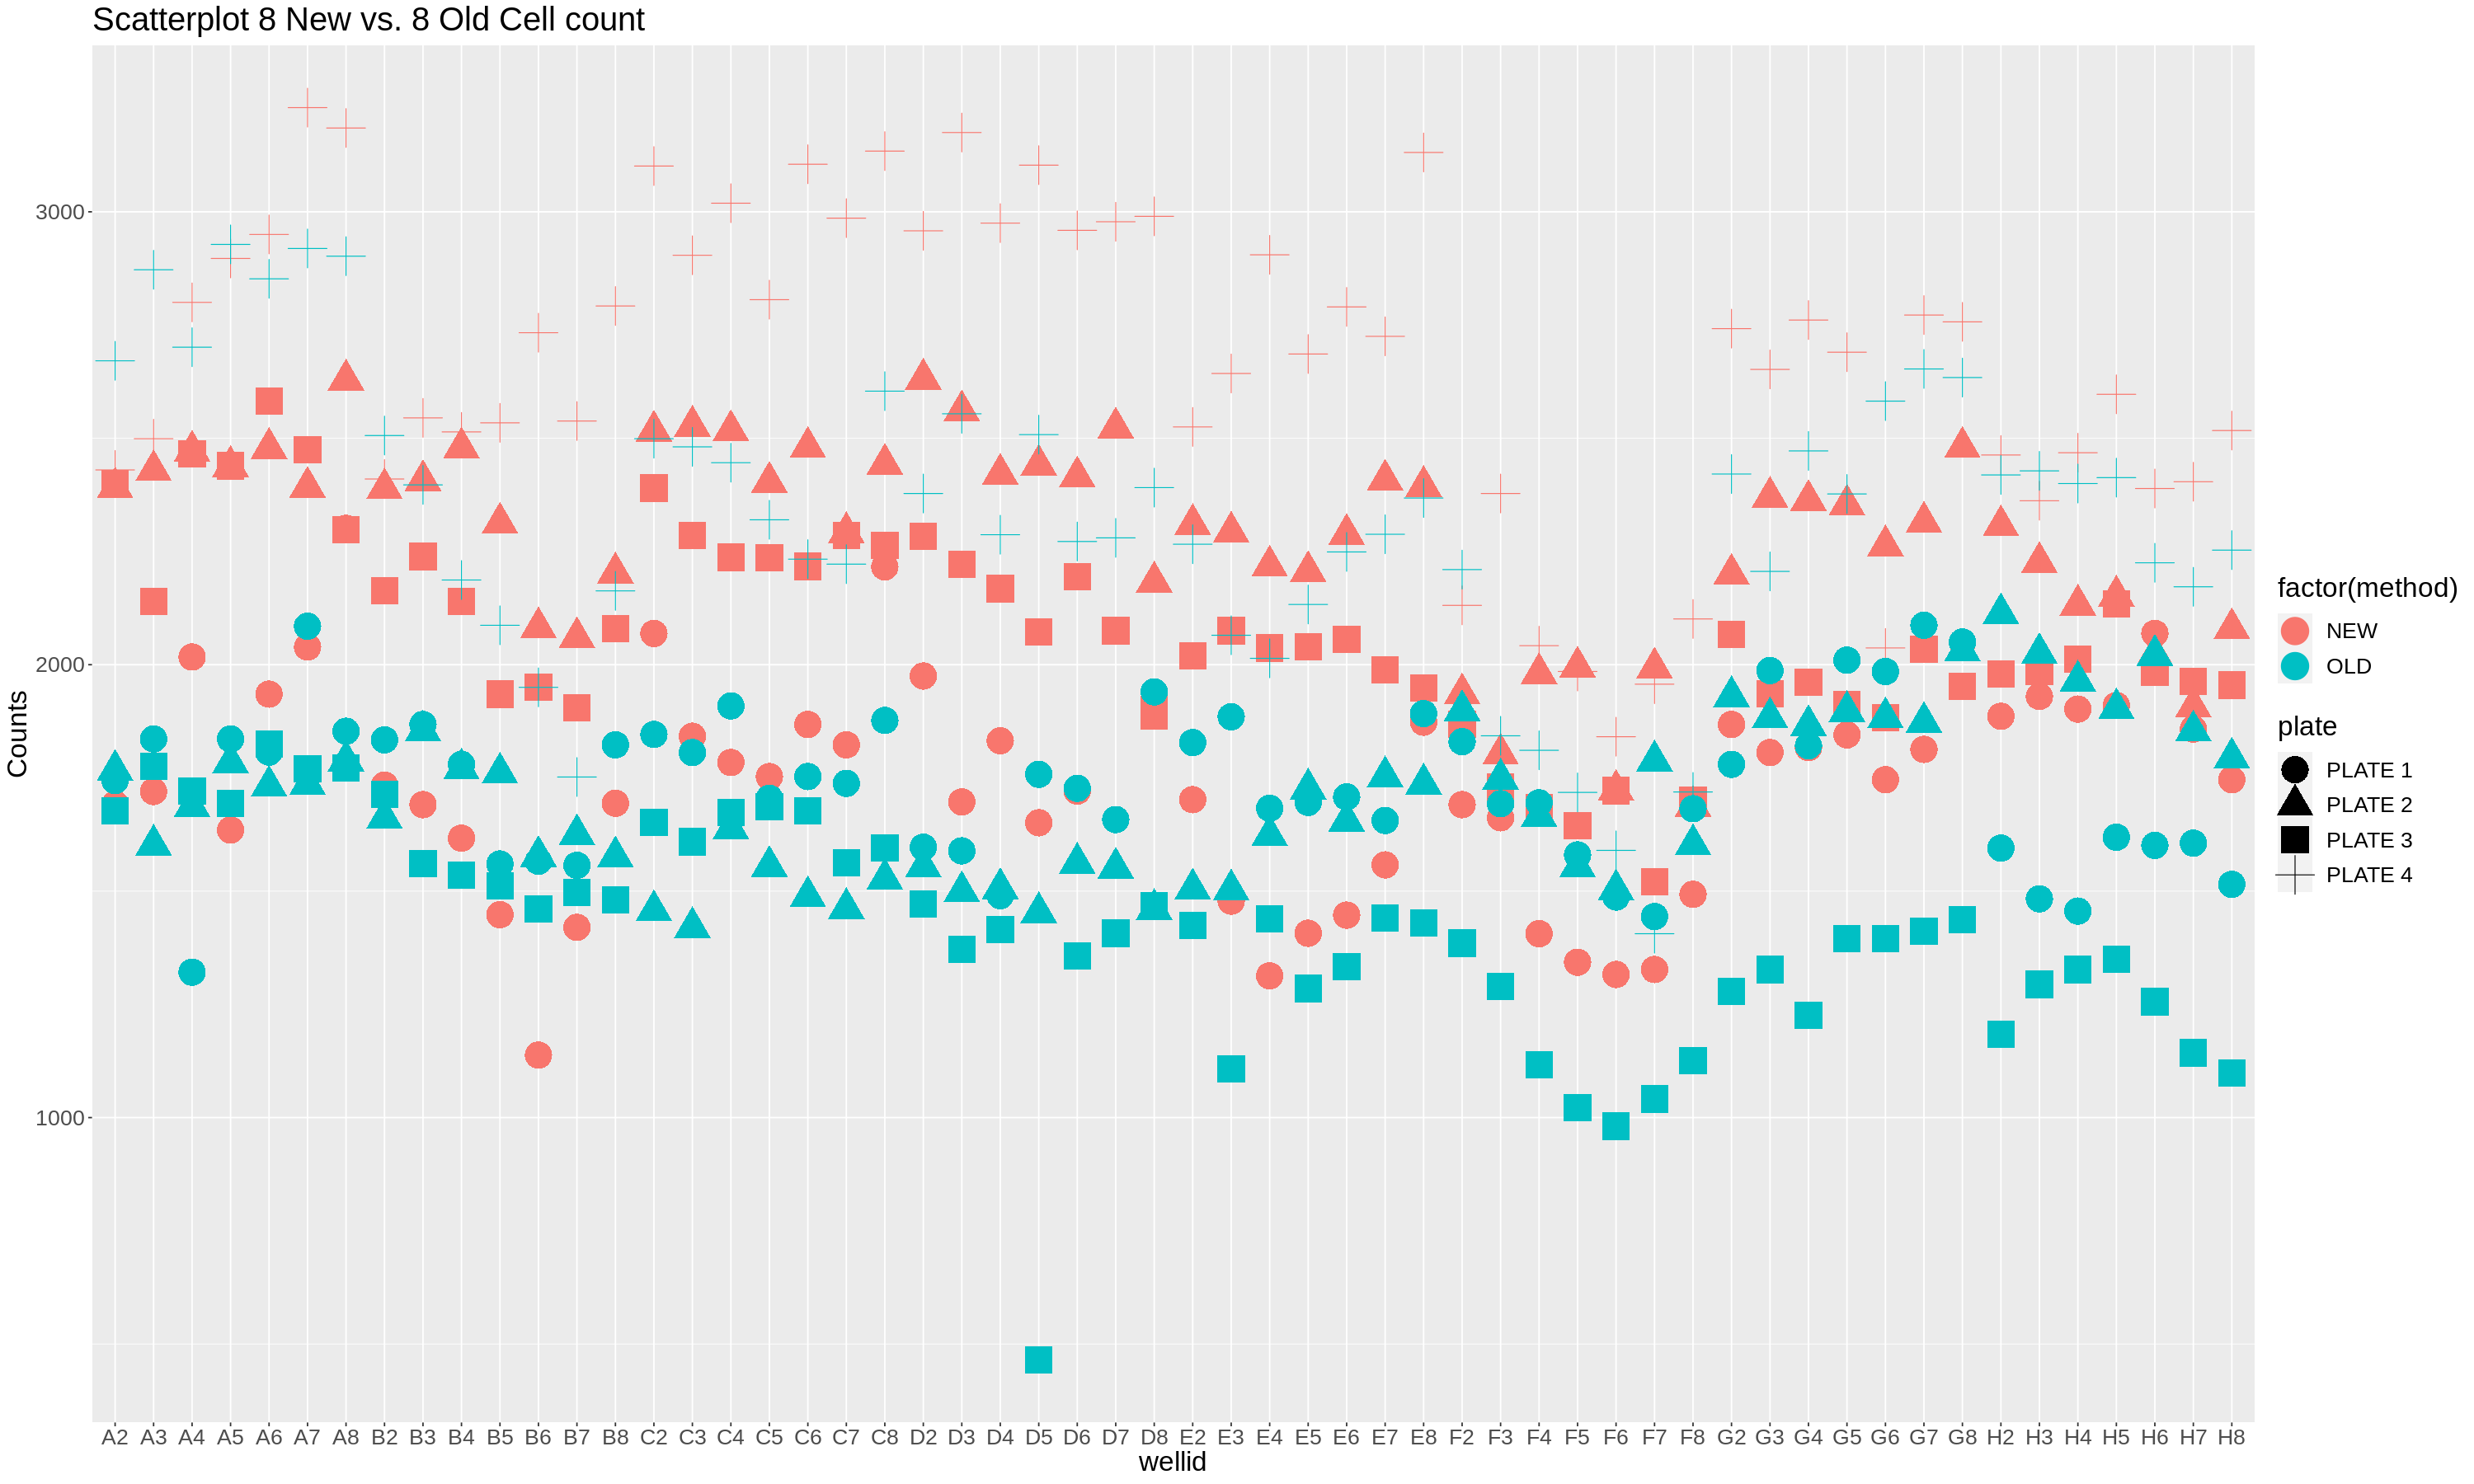

In [410]:
ggplot(dff, aes(x=wellid, y=Z) ) +
  geom_point(size = 9, aes(colour = factor(method), shape = plate)) + 
  ylab("Counts") +
  ggtitle("Scatterplot 8 New vs. 8 Old Cell count") +
  theme(text = element_text(size=20))

#### Summary statistics for new 8 

#### USE SI AS SAMPLE DATA

In [411]:
rows <- list(c("A", "E"), c("B", "F"), c("C", "G"), c("D", "H"))

dfn_si_ls <- list()
dfo_si_ls <- list()

for (i in seq(4)) {
    dir = paste0(parentdir, "8v8_redo_plate", i)
    fi = list.files(dir)
    
    mtd = "NEW"
    select_fi = fi[grepl(paste0(mtd,"8_DF"), fi)]
    dfn_si_ls[[i]] <- read.csv(file.path(dir, select_fi))
    df.tmp <- dfn_si_ls[[i]] %>%
        na.omit() %>% select(SAMPLE_NAME, 
            MFI.,
            MFI..1,
            SI,
            SN) %>%
        filter(grepl("[A-H]0[2-9]|1[0-1]", SAMPLE_NAME)) %>%
        mutate_at(vars(MFI., MFI..1, SI, SN), funs(as.numeric)) %>%
        mutate(group = case_when(
           as.numeric(substr(SAMPLE_NAME,15,15)) == 2 ~ "COL2",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 3 ~ "COL3",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 4 ~ "COL4",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 5 ~ "COL5",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 6 ~ "COL6",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 7 ~ "COL7",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 8 ~ "COL8"
            ),
               row = case_when(
           substr(SAMPLE_NAME, 14,14) == "A" ~ "A-E",
           substr(SAMPLE_NAME, 14,14) == "B" ~ "B-F",
           substr(SAMPLE_NAME, 14,14) == "C" ~ "C-G",
           substr(SAMPLE_NAME, 14,14) == "D" ~ "D-H",
           substr(SAMPLE_NAME, 14,14) == "E" ~ "A-E",
           substr(SAMPLE_NAME, 14,14) == "F" ~ "B-F",
           substr(SAMPLE_NAME, 14,14) == "G" ~ "C-G",
           substr(SAMPLE_NAME, 14,14) == "H" ~ "D-H"
           ),
               subgroup = case_when(
           row == "A-E" & group == "COL2" ~ "A2-E2",
           row == "A-E" & group == "COL3" ~ "A3-E3",
           row == "A-E" & group == "COL4" ~ "A4-E4",
           row == "A-E" & group == "COL5" ~ "A5-E5",
           row == "A-E" & group == "COL6" ~ "A6-E6",
           row == "A-E" & group == "COL7" ~ "A7-E7",
           row == "A-E" & group == "COL8" ~ "A8-E8",
           row == "B-F" & group == "COL2" ~ "B2-F2",
           row == "B-F" & group == "COL3" ~ "B3-F3",
           row == "B-F" & group == "COL4" ~ "B4-F4",
           row == "B-F" & group == "COL5" ~ "B5-F5",
           row == "B-F" & group == "COL6" ~ "B6-F6",
           row == "B-F" & group == "COL7" ~ "B7-F7",
           row == "B-F" & group == "COL8" ~ "B8-F8",
           row == "C-G" & group == "COL2" ~ "C2-G2",
           row == "C-G" & group == "COL3" ~ "C3-G3",
           row == "C-G" & group == "COL4" ~ "C4-G4",
           row == "C-G" & group == "COL5" ~ "C5-G5",
           row == "C-G" & group == "COL6" ~ "C6-G6",
           row == "C-G" & group == "COL7" ~ "C7-G7",
           row == "C-G" & group == "COL8" ~ "C8-G8",
           row == "D-H" & group == "COL2" ~ "D2-H2",
           row == "D-H" & group == "COL3" ~ "D3-H3",
           row == "D-H" & group == "COL4" ~ "D4-H4",
           row == "D-H" & group == "COL5" ~ "D5-H5",
           row == "D-H" & group == "COL6" ~ "D6-H6",
           row == "D-H" & group == "COL7" ~ "D7-H7",
           row == "D-H" & group == "COL8" ~ "D8-H8"
           ),
           method = mtd,
           plate = paste('PLATE', i))
    
        mtd = "OLD"
        select_fi = fi[grepl(paste0(mtd,"8_DF"), fi)]
        dfo_si_ls[[i]] <- read.csv(file.path(dir, select_fi))
        dfo_si_ls[[i]] <- rbind(df.tmp, dfo_si_ls[[i]] %>% 
            na.omit() %>% select(SAMPLE_NAME, 
                MFI.,
                MFI..1,
                SI,
                SN) %>%
            filter(grepl("[A-H]0[2-9]|1[0-1]", SAMPLE_NAME)) %>%
            mutate_at(vars(MFI., MFI..1, SI, SN), funs(as.numeric)) %>%
            mutate(group = case_when(
               as.numeric(substr(SAMPLE_NAME,15,15)) == 2 ~ "COL2",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 3 ~ "COL3",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 4 ~ "COL4",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 5 ~ "COL5",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 6 ~ "COL6",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 7 ~ "COL7",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 8 ~ "COL8"
                ),
                   row = case_when(
               substr(SAMPLE_NAME, 14,14) == "A" ~ "A-E",
               substr(SAMPLE_NAME, 14,14) == "B" ~ "B-F",
               substr(SAMPLE_NAME, 14,14) == "C" ~ "C-G",
               substr(SAMPLE_NAME, 14,14) == "D" ~ "D-H",
               substr(SAMPLE_NAME, 14,14) == "E" ~ "A-E",
               substr(SAMPLE_NAME, 14,14) == "F" ~ "B-F",
               substr(SAMPLE_NAME, 14,14) == "G" ~ "C-G",
               substr(SAMPLE_NAME, 14,14) == "H" ~ "D-H"
               ),
                   subgroup = case_when(
               row == "A-E" & group == "COL2" ~ "A2-E2",
               row == "A-E" & group == "COL3" ~ "A3-E3",
               row == "A-E" & group == "COL4" ~ "A4-E4",
               row == "A-E" & group == "COL5" ~ "A5-E5",
               row == "A-E" & group == "COL6" ~ "A6-E6",
               row == "A-E" & group == "COL7" ~ "A7-E7",
               row == "A-E" & group == "COL8" ~ "A8-E8",
               row == "B-F" & group == "COL2" ~ "B2-F2",
               row == "B-F" & group == "COL3" ~ "B3-F3",
               row == "B-F" & group == "COL4" ~ "B4-F4",
               row == "B-F" & group == "COL5" ~ "B5-F5",
               row == "B-F" & group == "COL6" ~ "B6-F6",
               row == "B-F" & group == "COL7" ~ "B7-F7",
               row == "B-F" & group == "COL8" ~ "B8-F8",
               row == "C-G" & group == "COL2" ~ "C2-G2",
               row == "C-G" & group == "COL3" ~ "C3-G3",
               row == "C-G" & group == "COL4" ~ "C4-G4",
               row == "C-G" & group == "COL5" ~ "C5-G5",
               row == "C-G" & group == "COL6" ~ "C6-G6",
               row == "C-G" & group == "COL7" ~ "C7-G7",
               row == "C-G" & group == "COL8" ~ "C8-G8",
               row == "D-H" & group == "COL2" ~ "D2-H2",
               row == "D-H" & group == "COL3" ~ "D3-H3",
               row == "D-H" & group == "COL4" ~ "D4-H4",
               row == "D-H" & group == "COL5" ~ "D5-H5",
               row == "D-H" & group == "COL6" ~ "D6-H6",
               row == "D-H" & group == "COL7" ~ "D7-H7",
               row == "D-H" & group == "COL8" ~ "D8-H8"
               ),
               method = mtd,
               plate = paste('PLATE', i))
            ) # rbind
}

In [412]:
dfm <- do.call(rbind,dfo_si_ls)
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate  
1 A2-E2    NEW    PLATE 1
2 A3-E3    NEW    PLATE 1
3 A4-E4    NEW    PLATE 1
4 A5-E5    NEW    PLATE 1
5 A6-E6    NEW    PLATE 1
6 A7-E7    NEW    PLATE 1

#### F test for normality
- The p values are big, meaning the variances do not change more from plate 1 to 3

#### Anderson-Darling test
- goodness of fit test that measures how well your data fit a specified distribution.
- H_0: The data follow a specified distribution

#### Shapiro test, bonett test, qq plot to show normality
- shapiro-wilk test - tell if a random sample comes from a normal distribution
- bonett test - measure of kurtosis for normally distributed data
- under the hypothesis of normality, data should have Geary's kurtosis equal to sqrt(2/pi) (0.7979)
- the kurtosis is near .7979, with p-value barely above 0.05, indicating it is slightly normal

In [414]:
row_idx = 1
df_stats = data.frame()

for (r in rows) {
    for (i in seq(2,8)){
        rg = paste0(r[1],"-", r[2])
        df_stats[row_idx, "GROUP"] = paste0(r[1], i, "-", r[2], i) 
        df.t <- dfm %>% filter(row ==  rg, group == paste0('COL',i))
        stat <- var.test(SI ~ method, df.t)
        df_stats[row_idx, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        print(stat)
        stat <- ad.test(df.t$SI)
        df_stats[row_idx, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        print(stat)
        stat <- shapiro.test(df.t$SI)
        df_stats[row_idx, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        print(stat)
        stat <- bonett.test(df.t$SI)
        df_stats[row_idx, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        print(stat)
        print("geary result:")
        stat <- geary(df.t$SI)
        df_stats[row_idx, "GEARY"] = formatC(stat, format = "e", digits = 2)
        print(stat)
        row_idx = row_idx + 1
    }
}
write.csv(df_stats, paste0("8v8_cmb_stats_SI.csv"), row.names = FALSE)


	F test to compare two variances

data:  SI by method
F = 0.90912, num df = 7, denom df = 7, p-value = 0.9032
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1820099 4.5409857
sample estimates:
ratio of variances 
         0.9091228 


	Anderson-Darling normality test

data:  df.t$SI
A = 0.56728, p-value = 0.1177


	Shapiro-Wilk normality test

data:  df.t$SI
W = 0.91431, p-value = 0.1366


	Bonett-Seier test for Geary kurtosis

data:  df.t$SI
tau = 33.818, z = -1.522, p-value = 0.128
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "geary result:"
[1] 0.8779402

	F test to compare two variances

data:  SI by method
F = 1.2316, num df = 7, denom df = 7, p-value = 0.7904
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2465789 6.1519269
sample estimates:
ratio of variances 
          1.231639 


	Anderson-Darling normality test

data:  df.t$SI
A = 0.74199, p-value = 

In [415]:
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate  
1 A2-E2    NEW    PLATE 1
2 A3-E3    NEW    PLATE 1
3 A4-E4    NEW    PLATE 1
4 A5-E5    NEW    PLATE 1
5 A6-E6    NEW    PLATE 1
6 A7-E7    NEW    PLATE 1

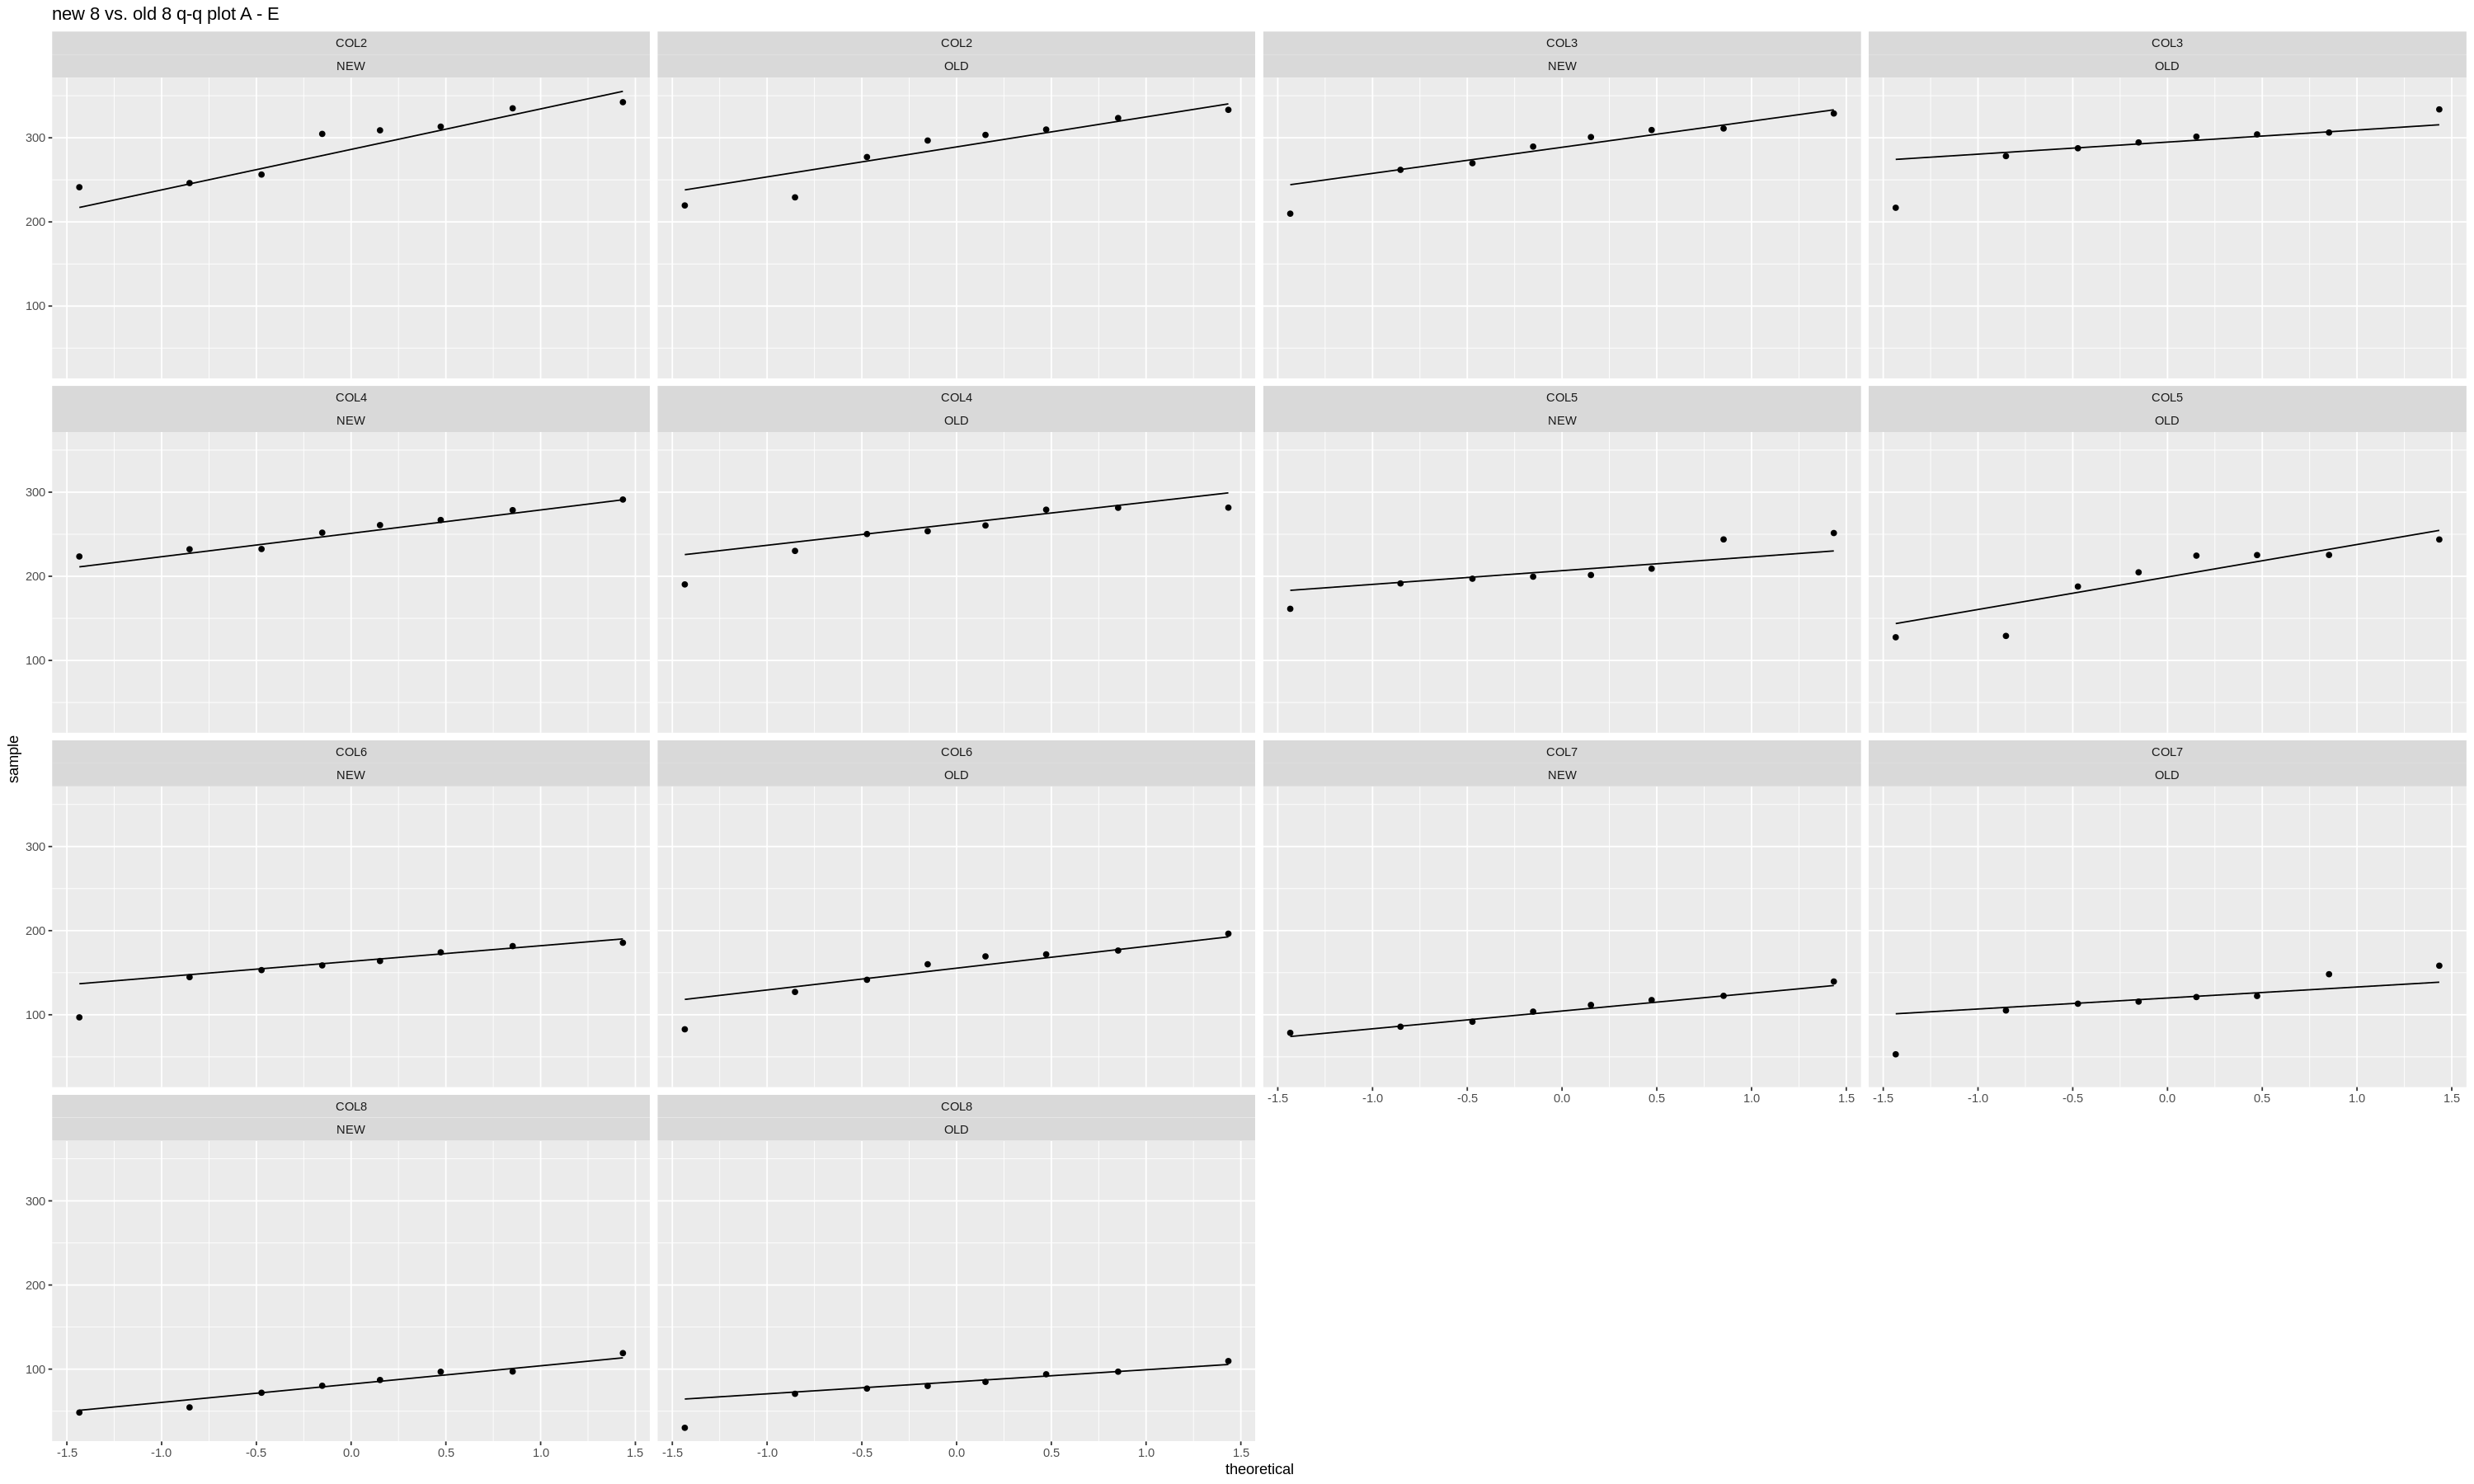

In [416]:
j = 1
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

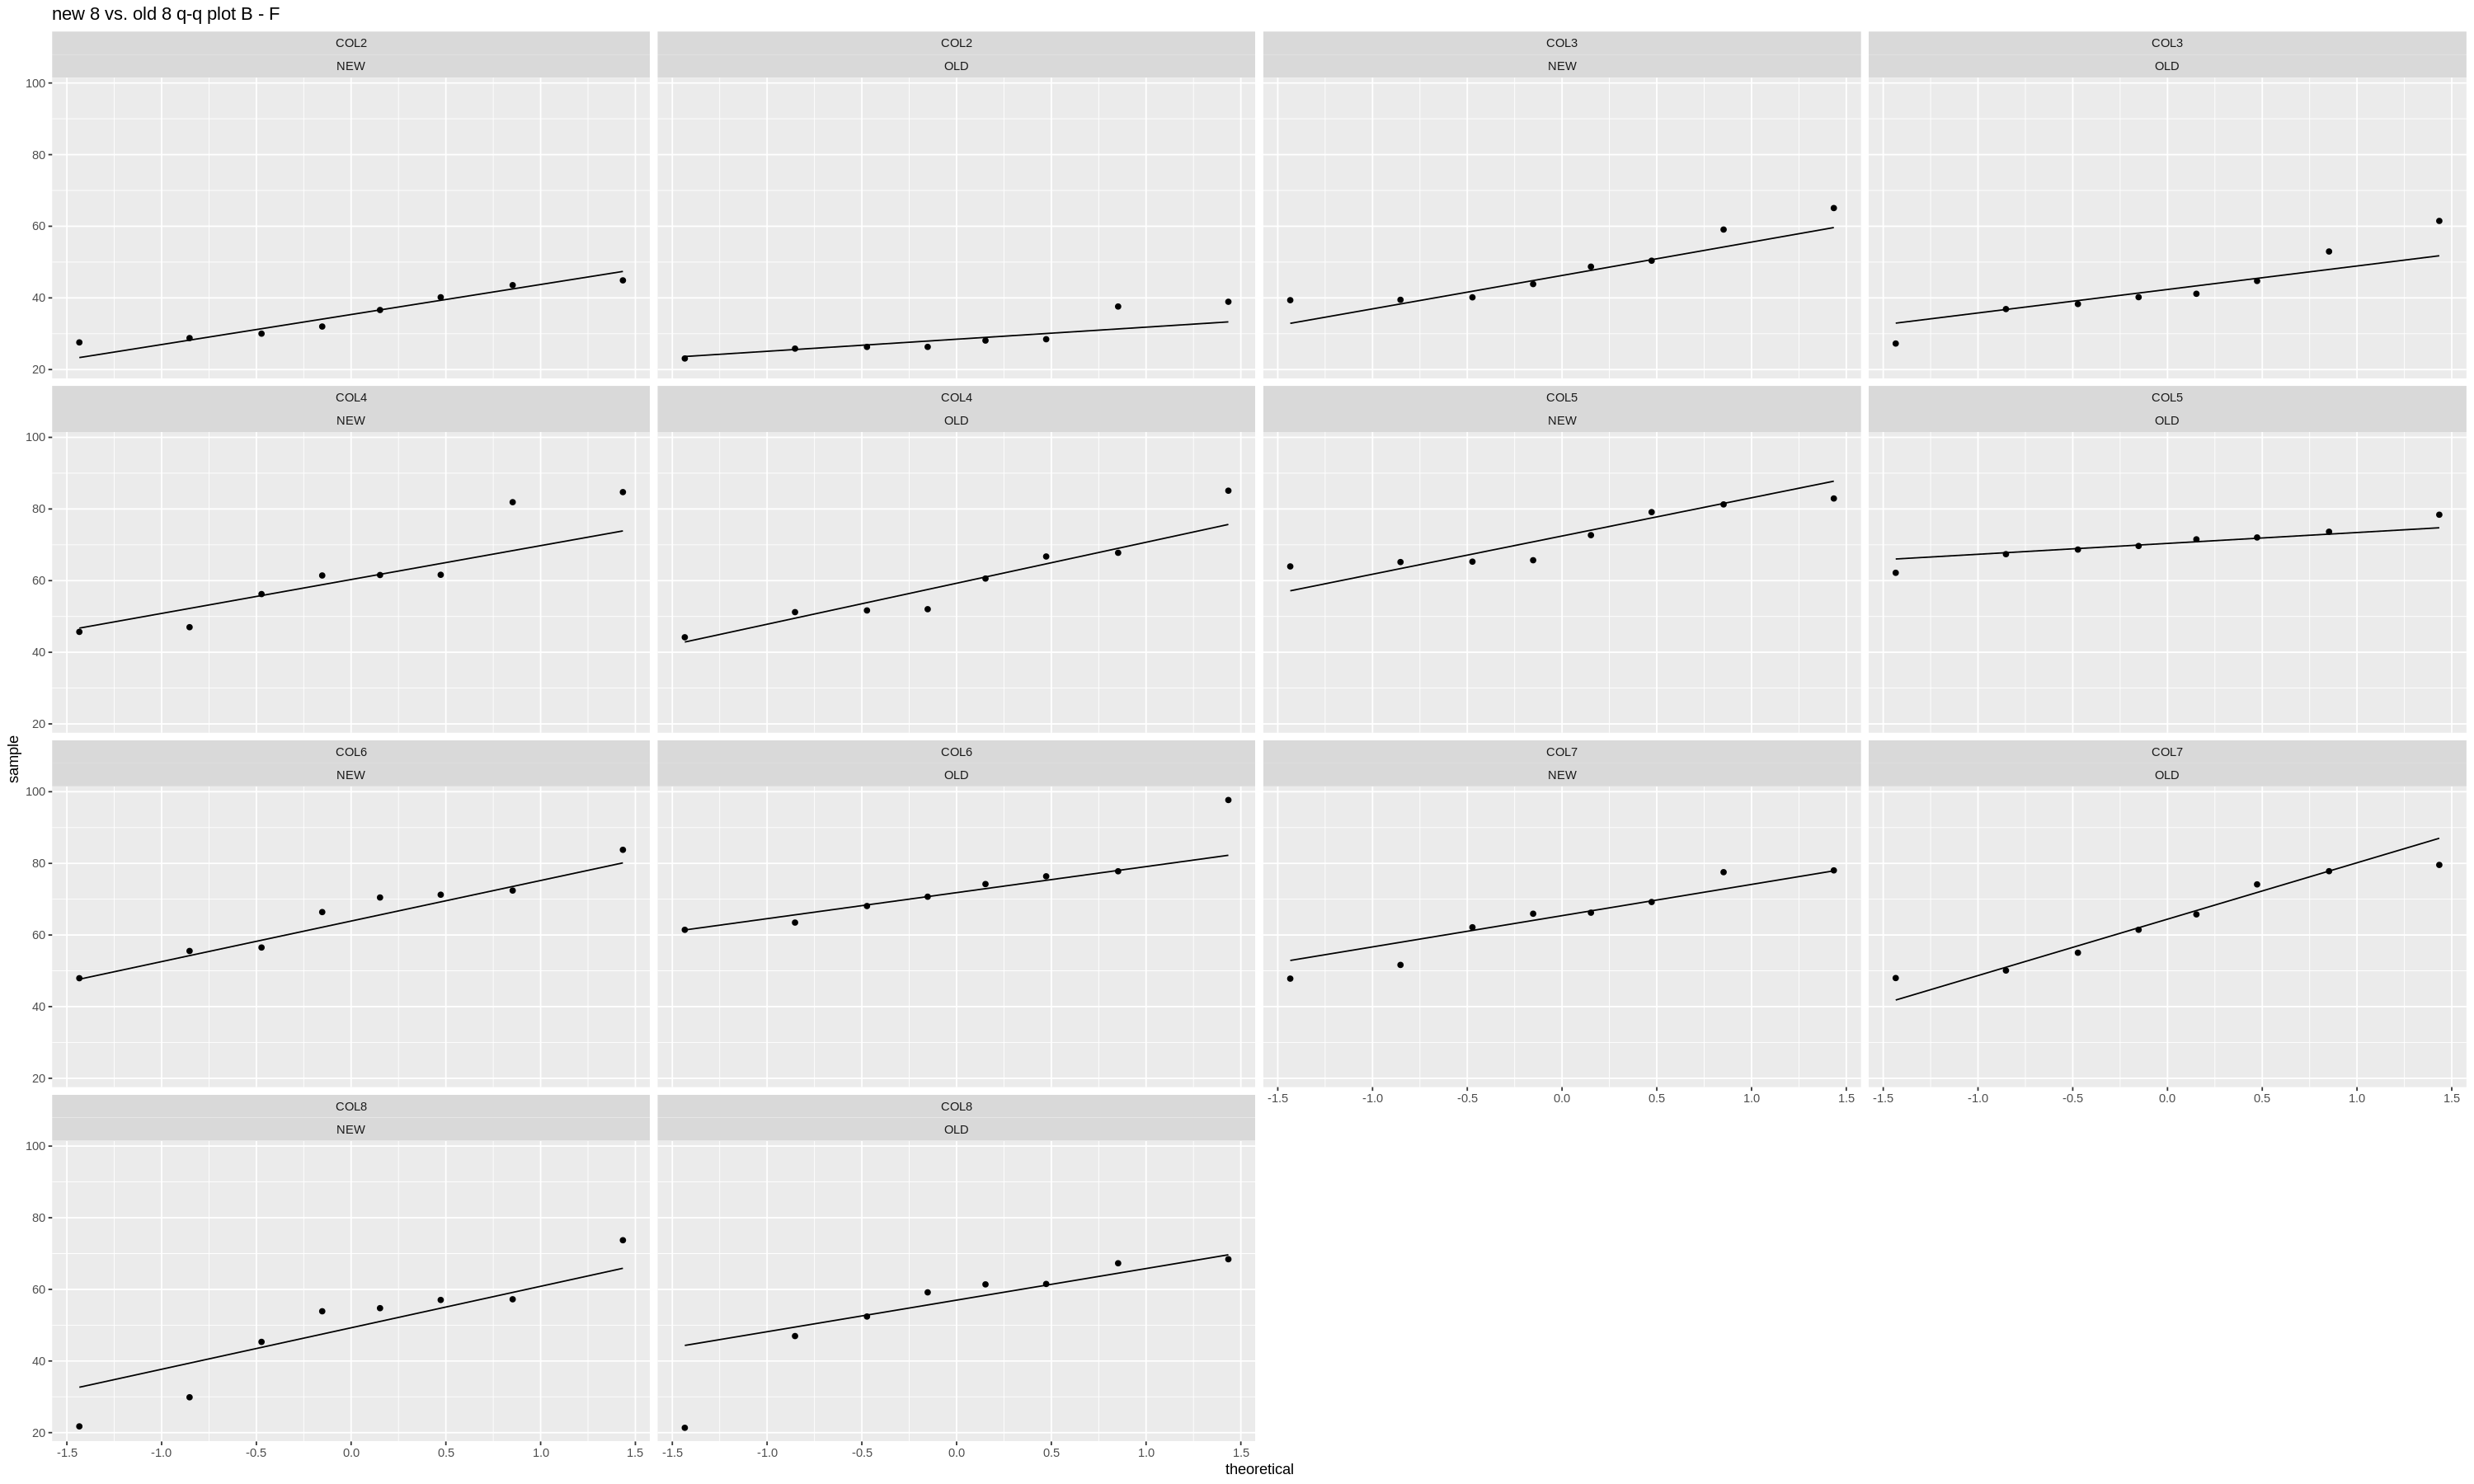

In [417]:
j = 2
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

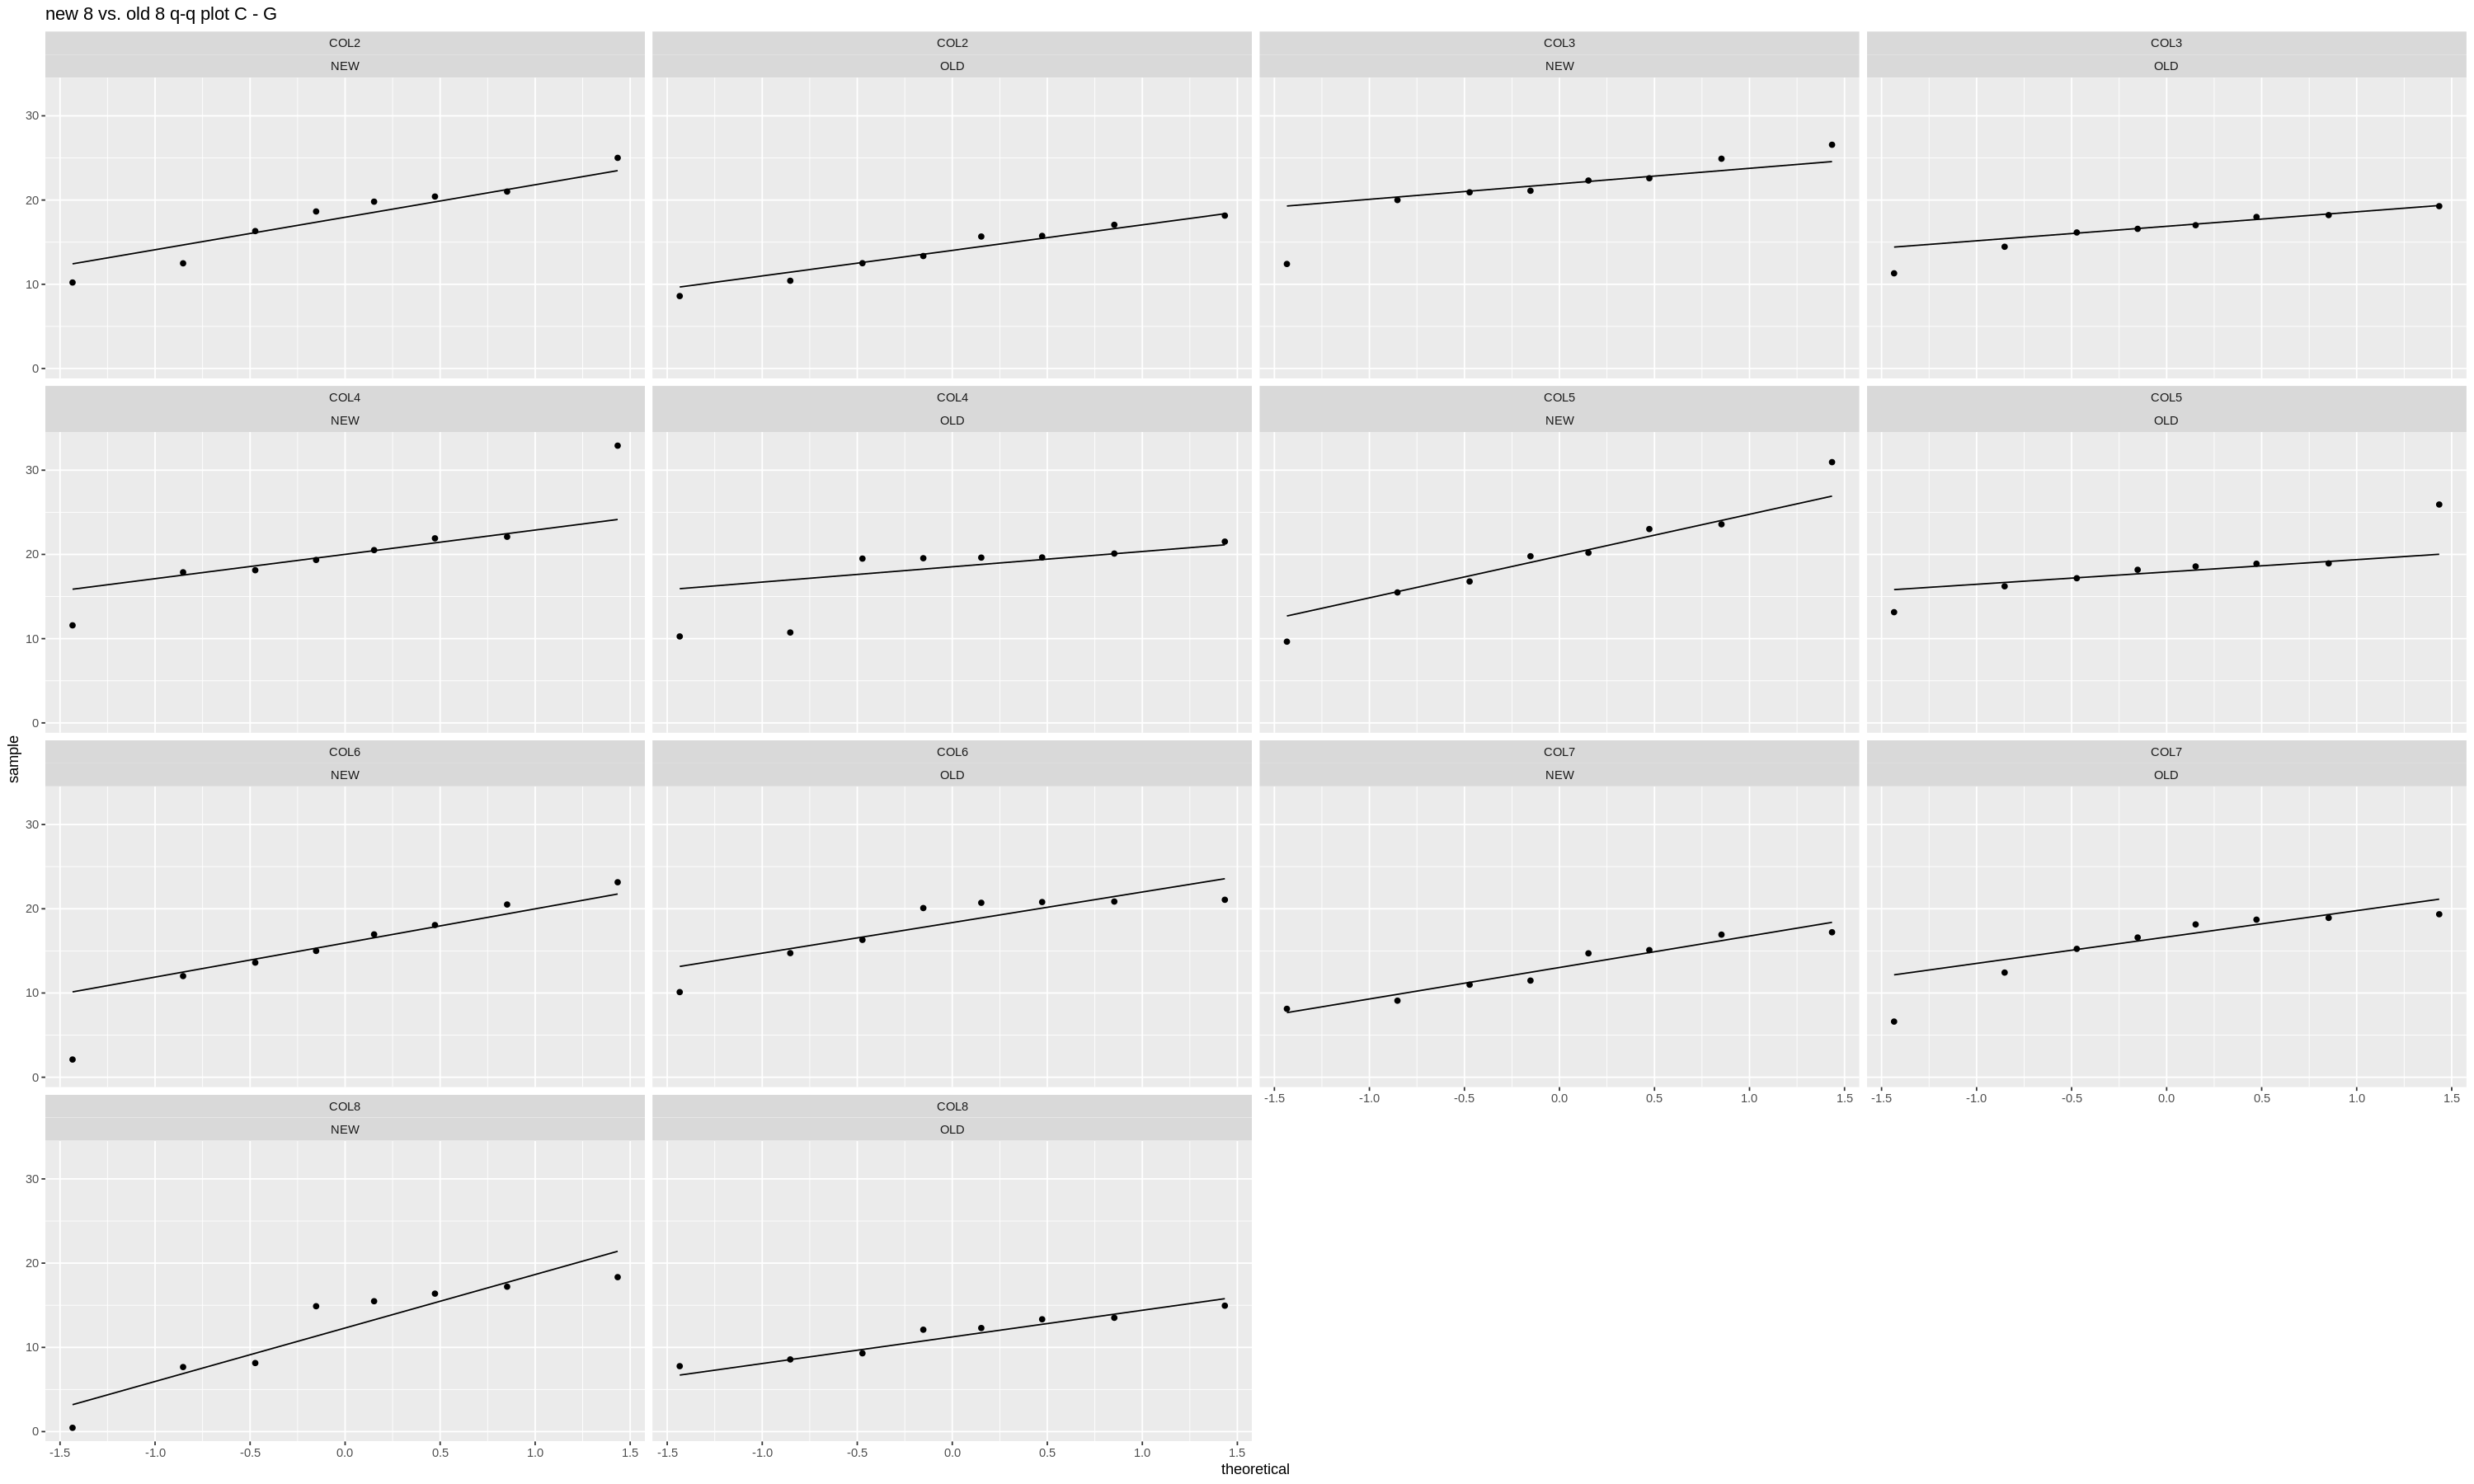

In [418]:
j = 3
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

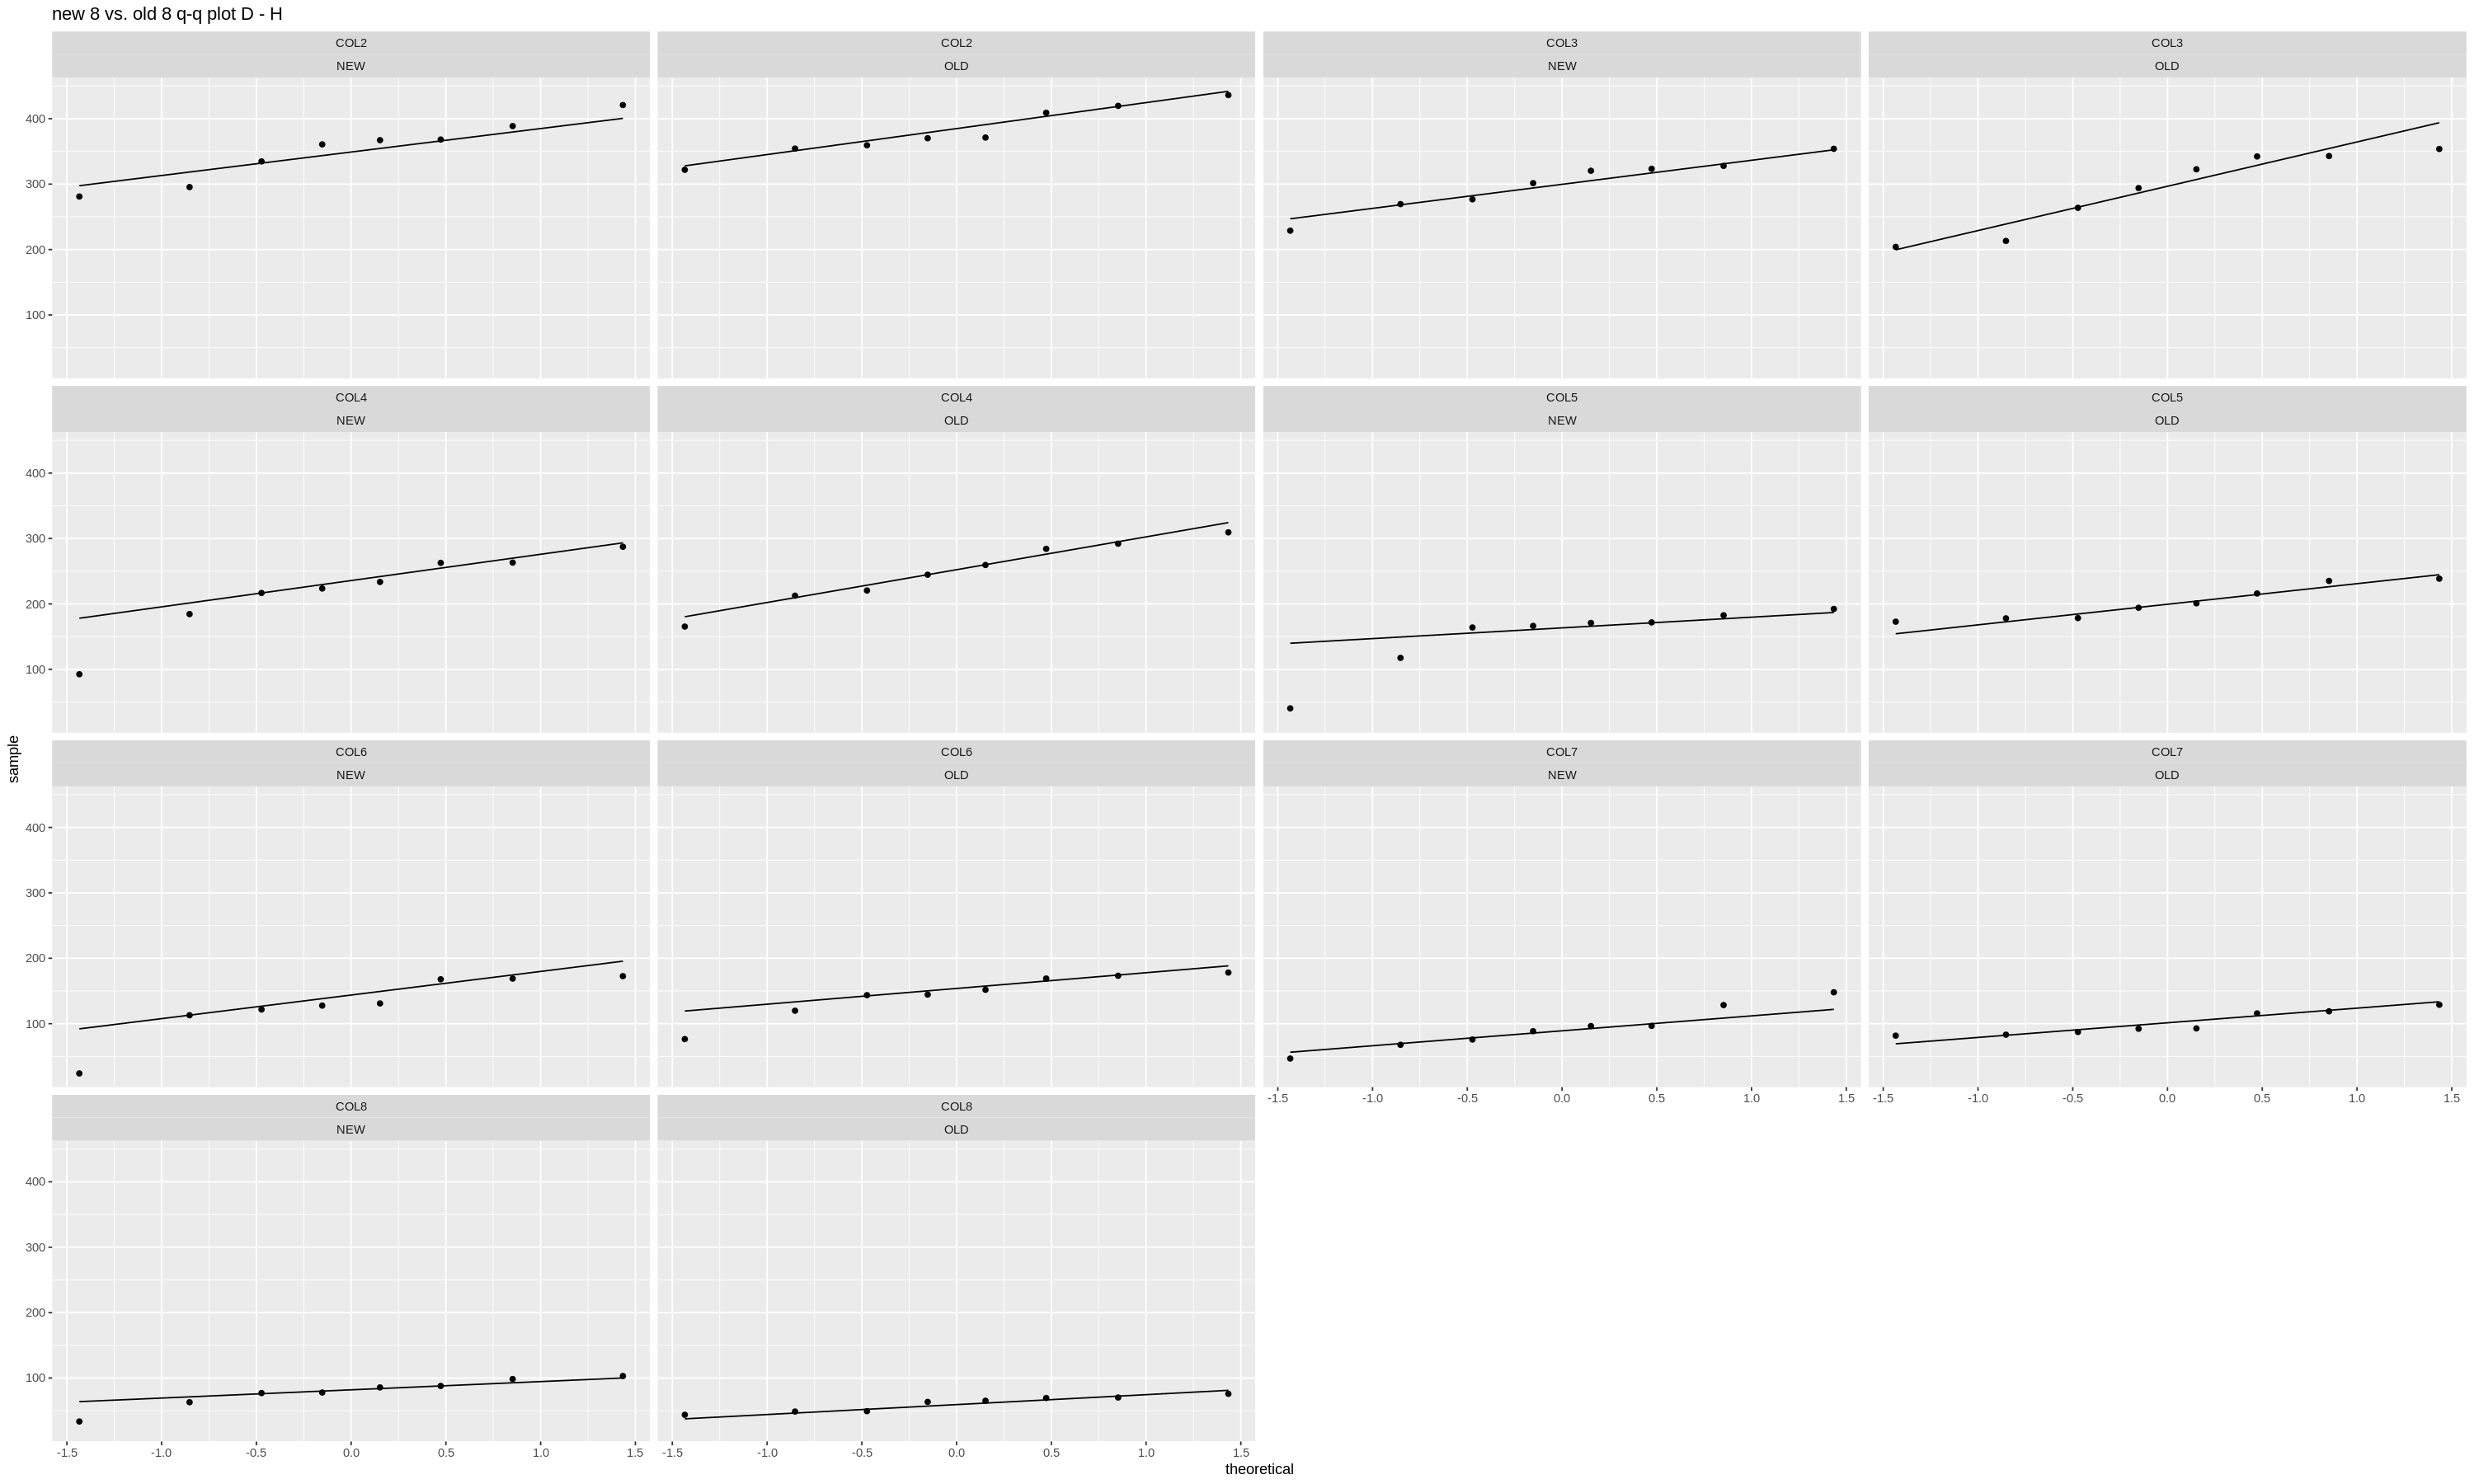

In [419]:
j = 4
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

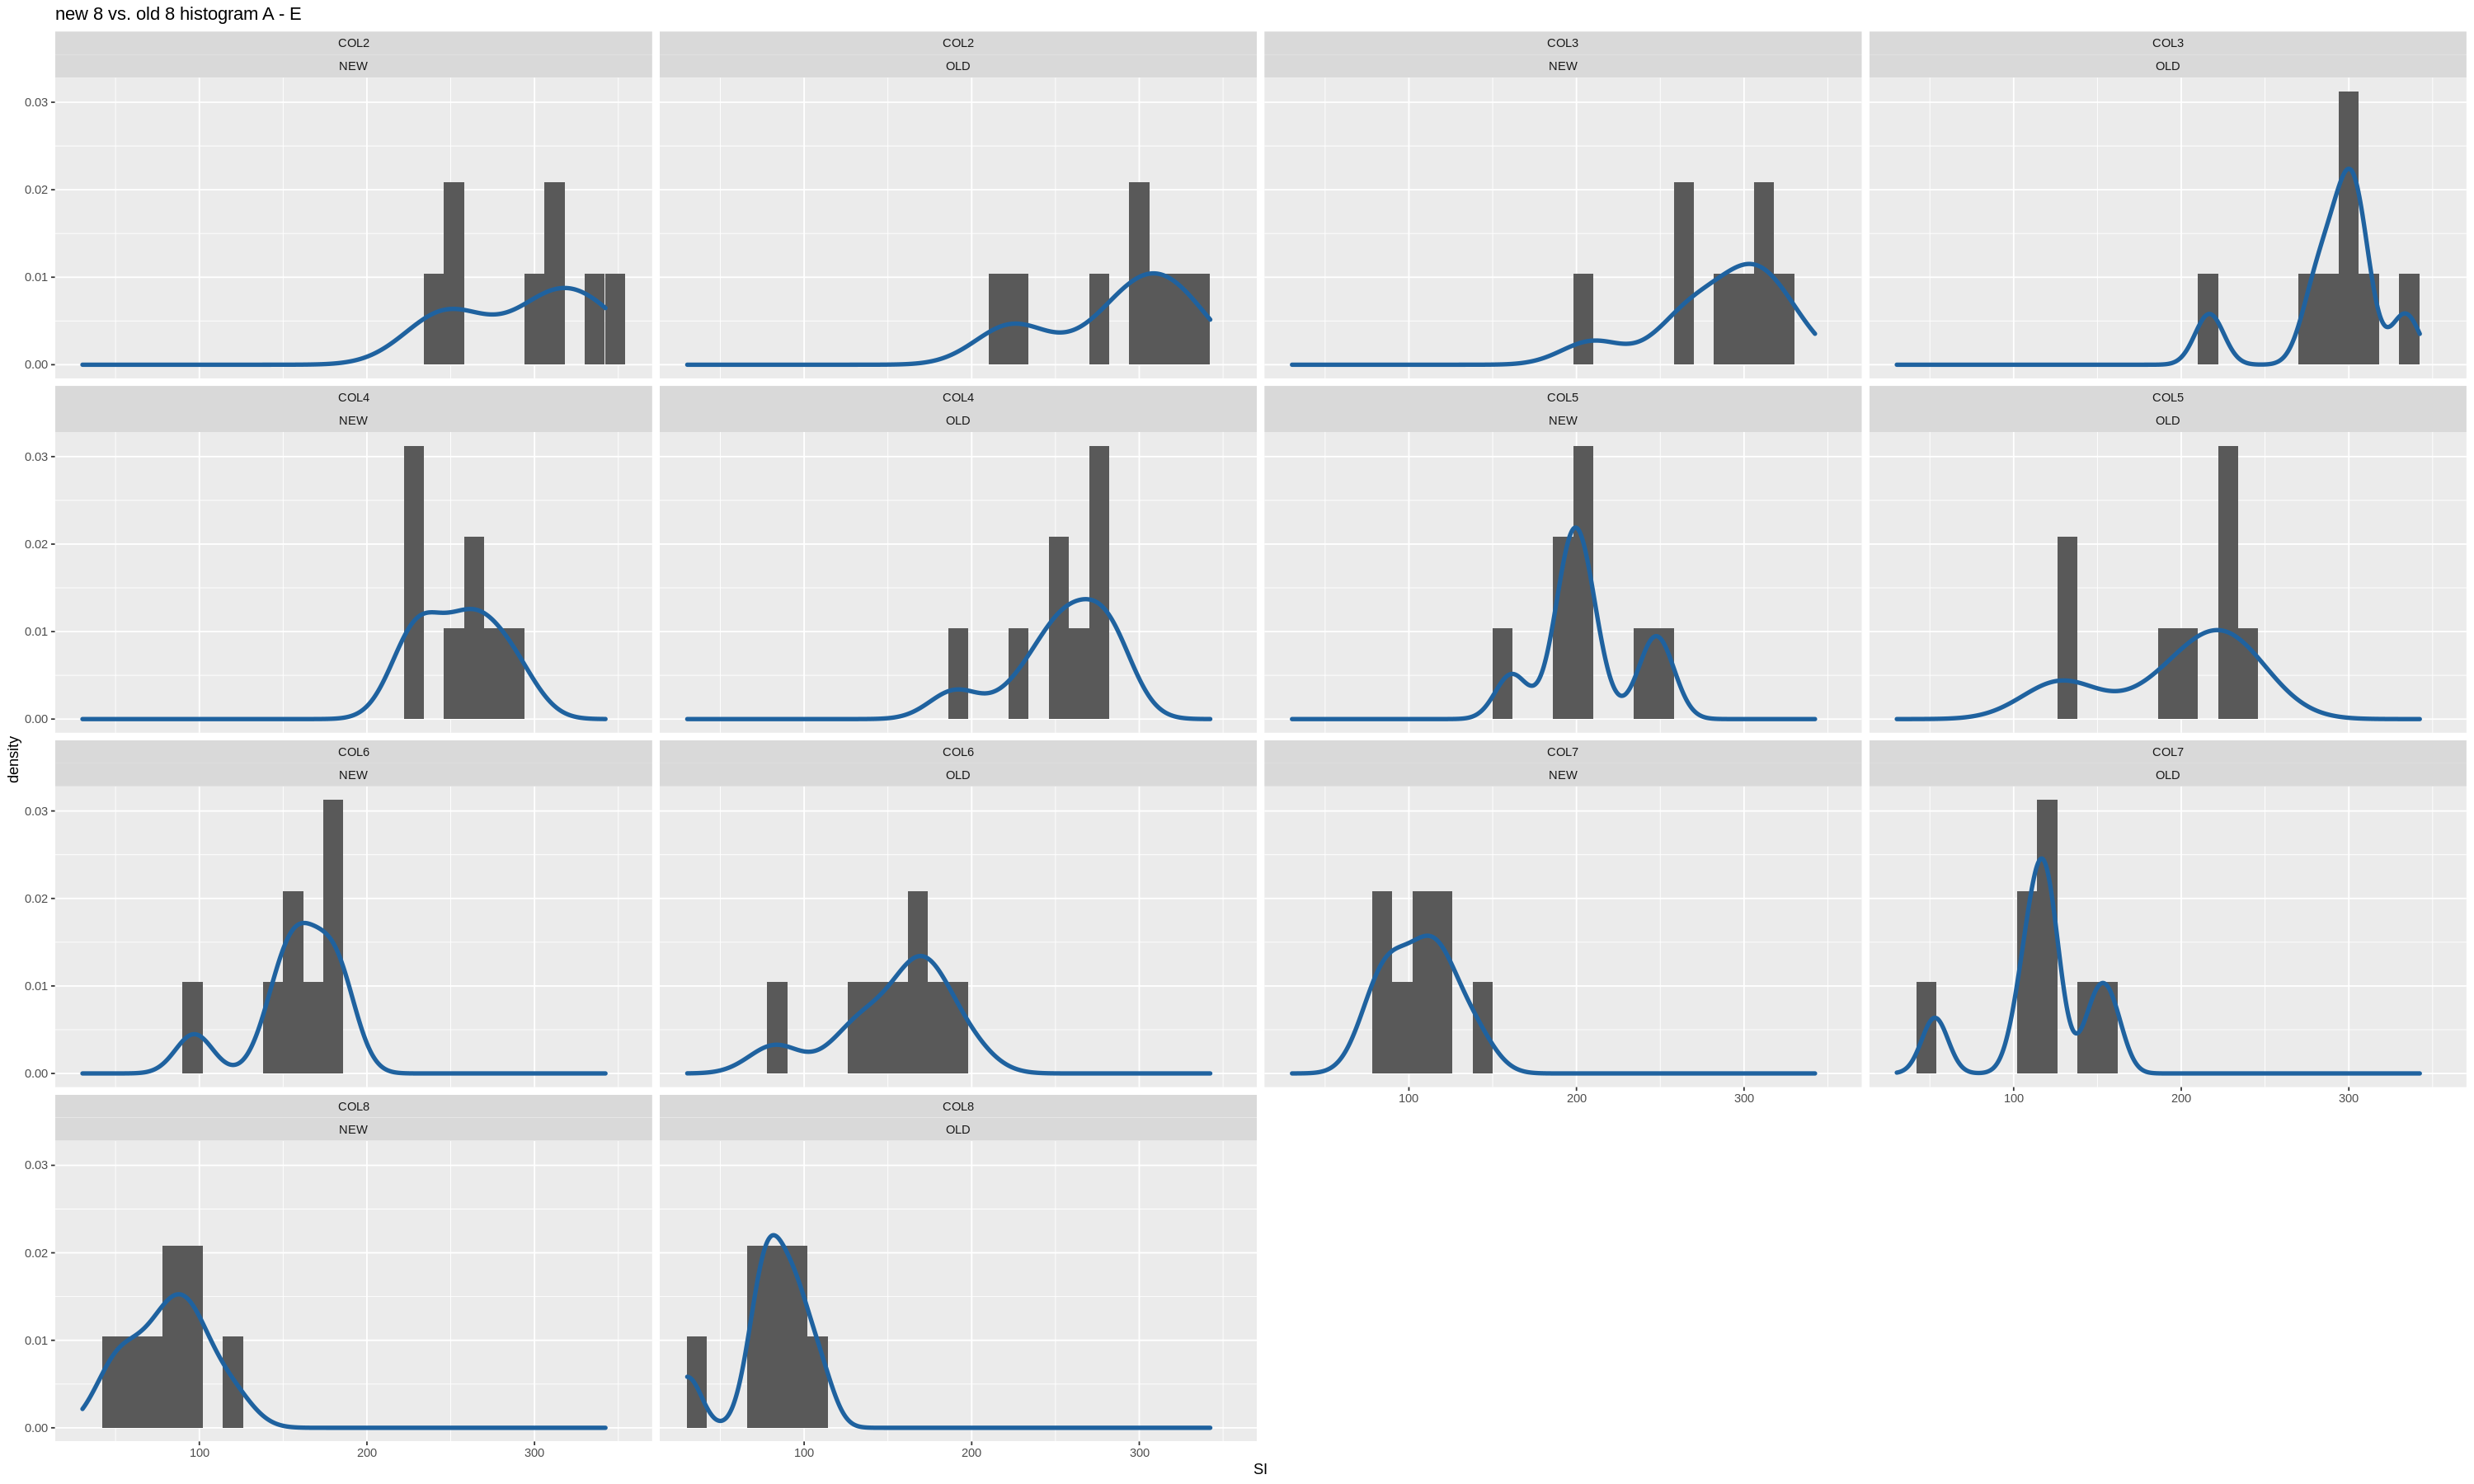

In [420]:
j = 1
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

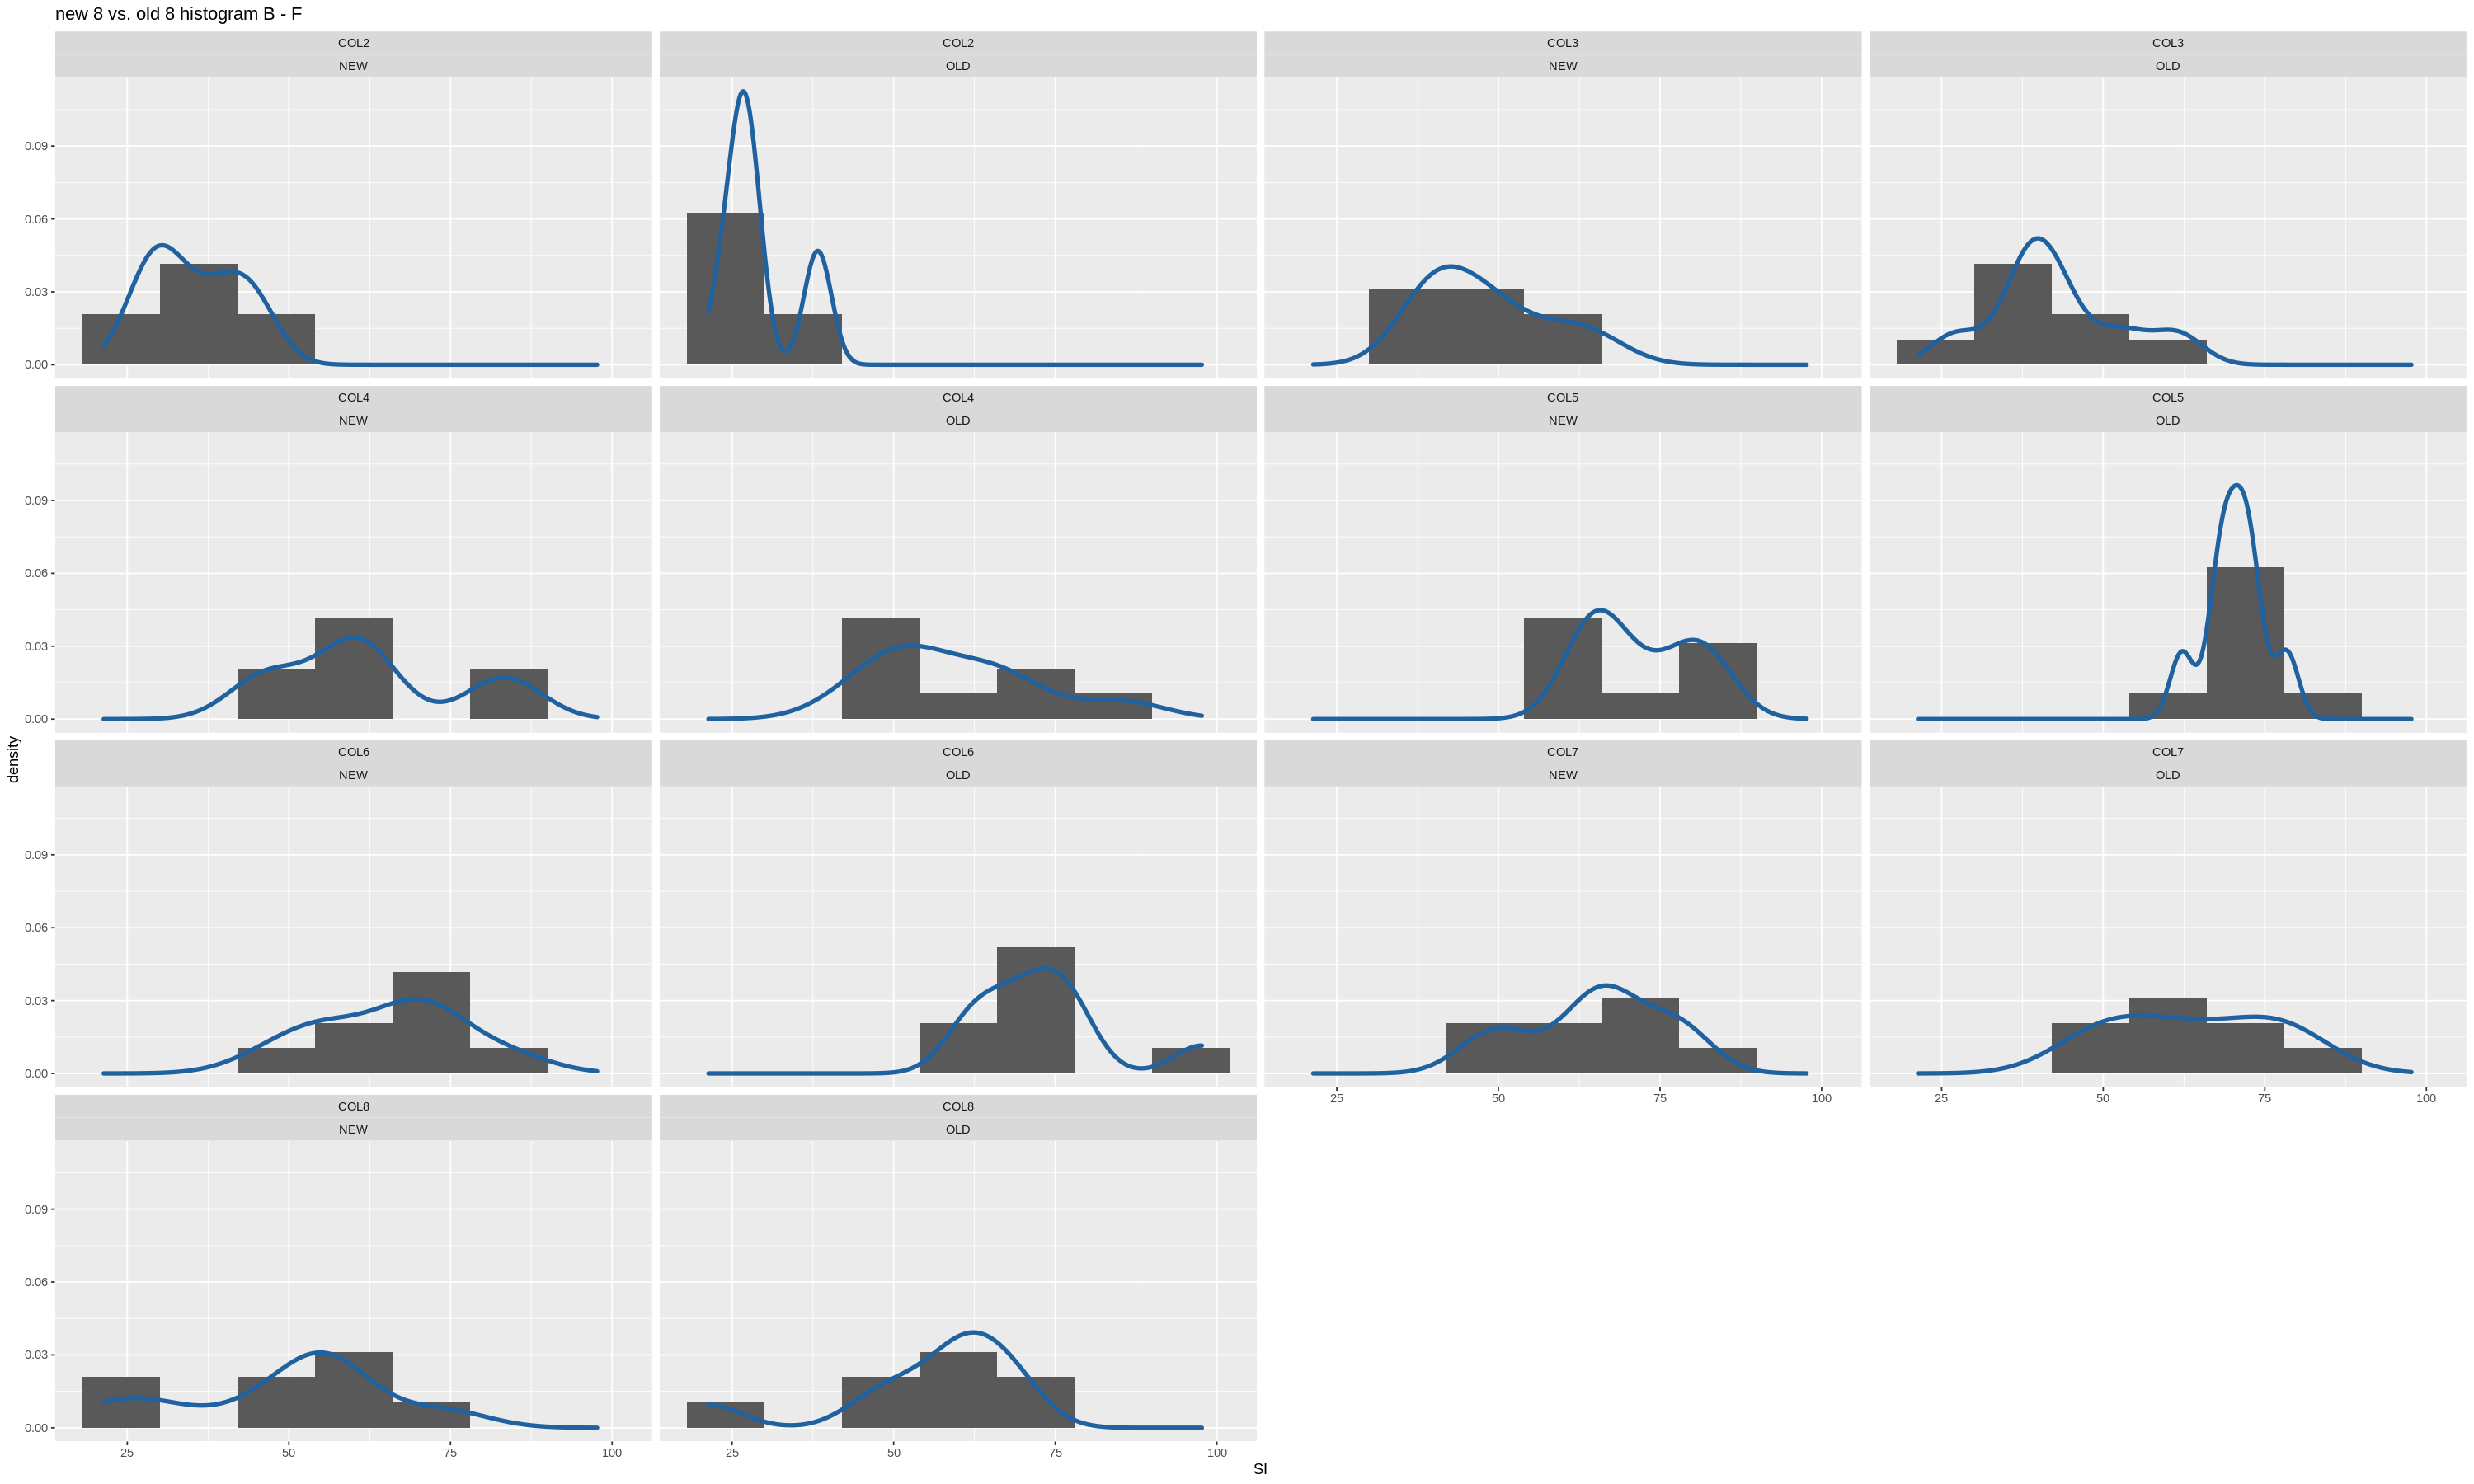

In [421]:
j = 2
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

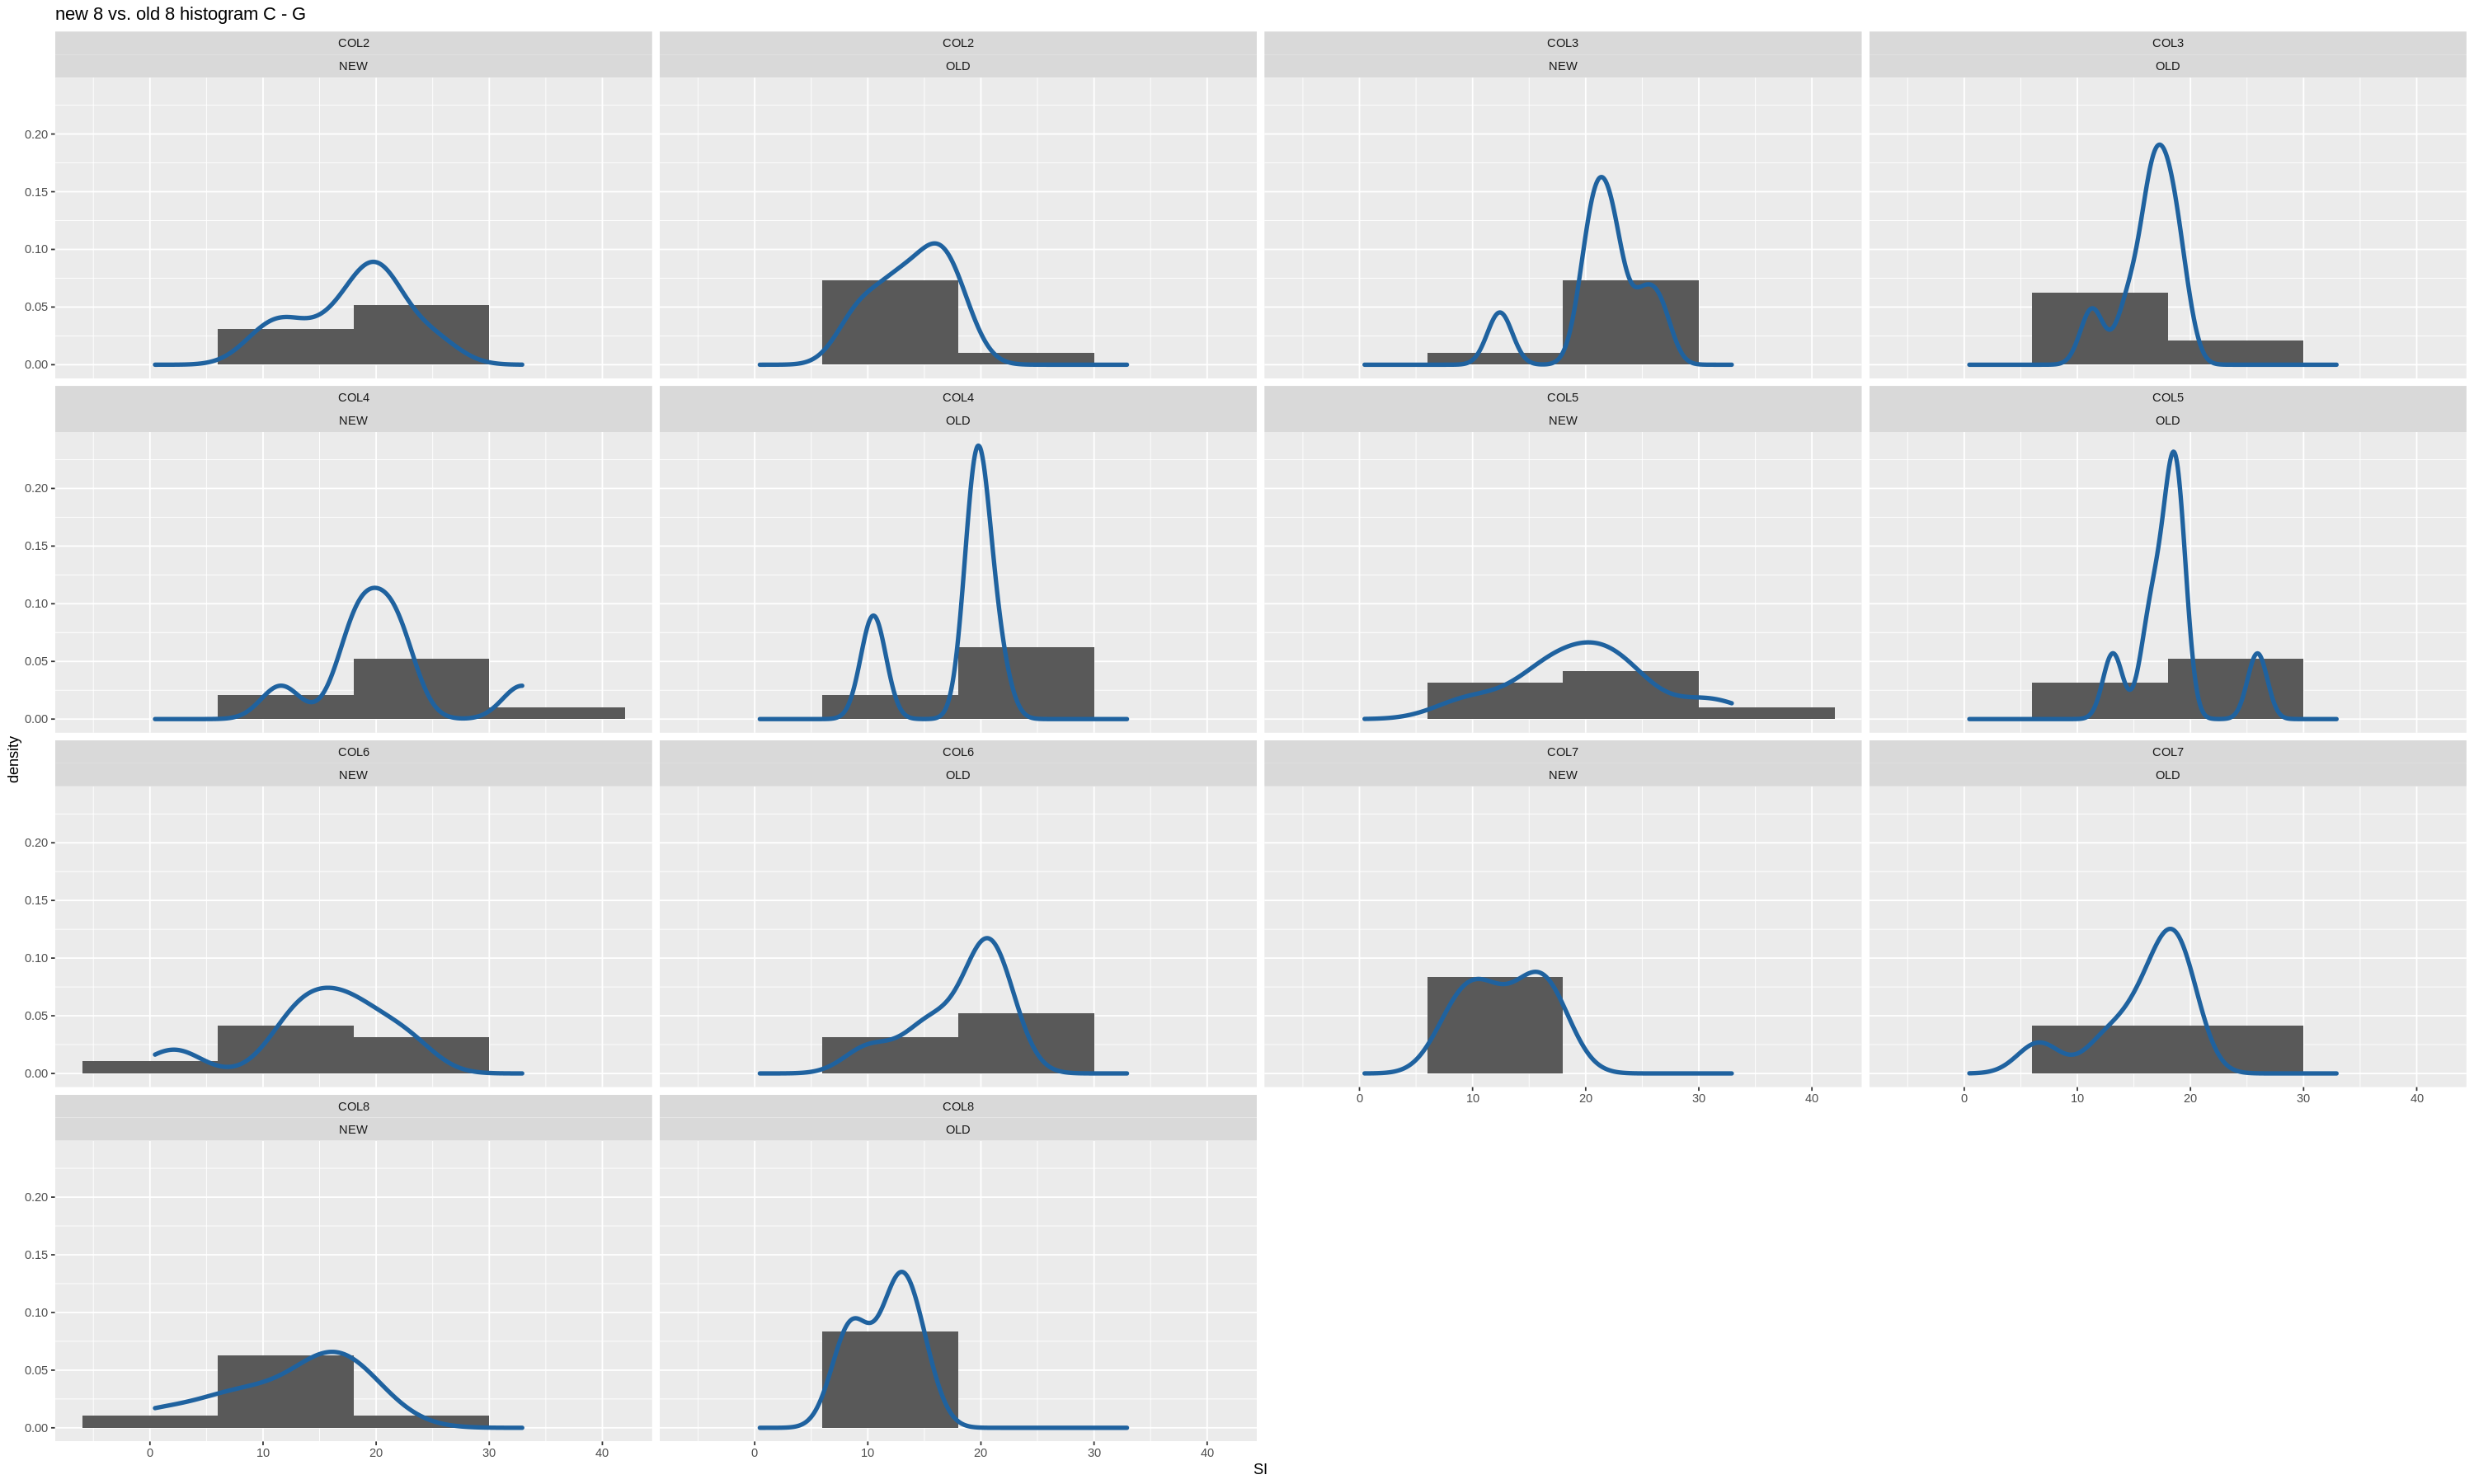

In [422]:
j = 3
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

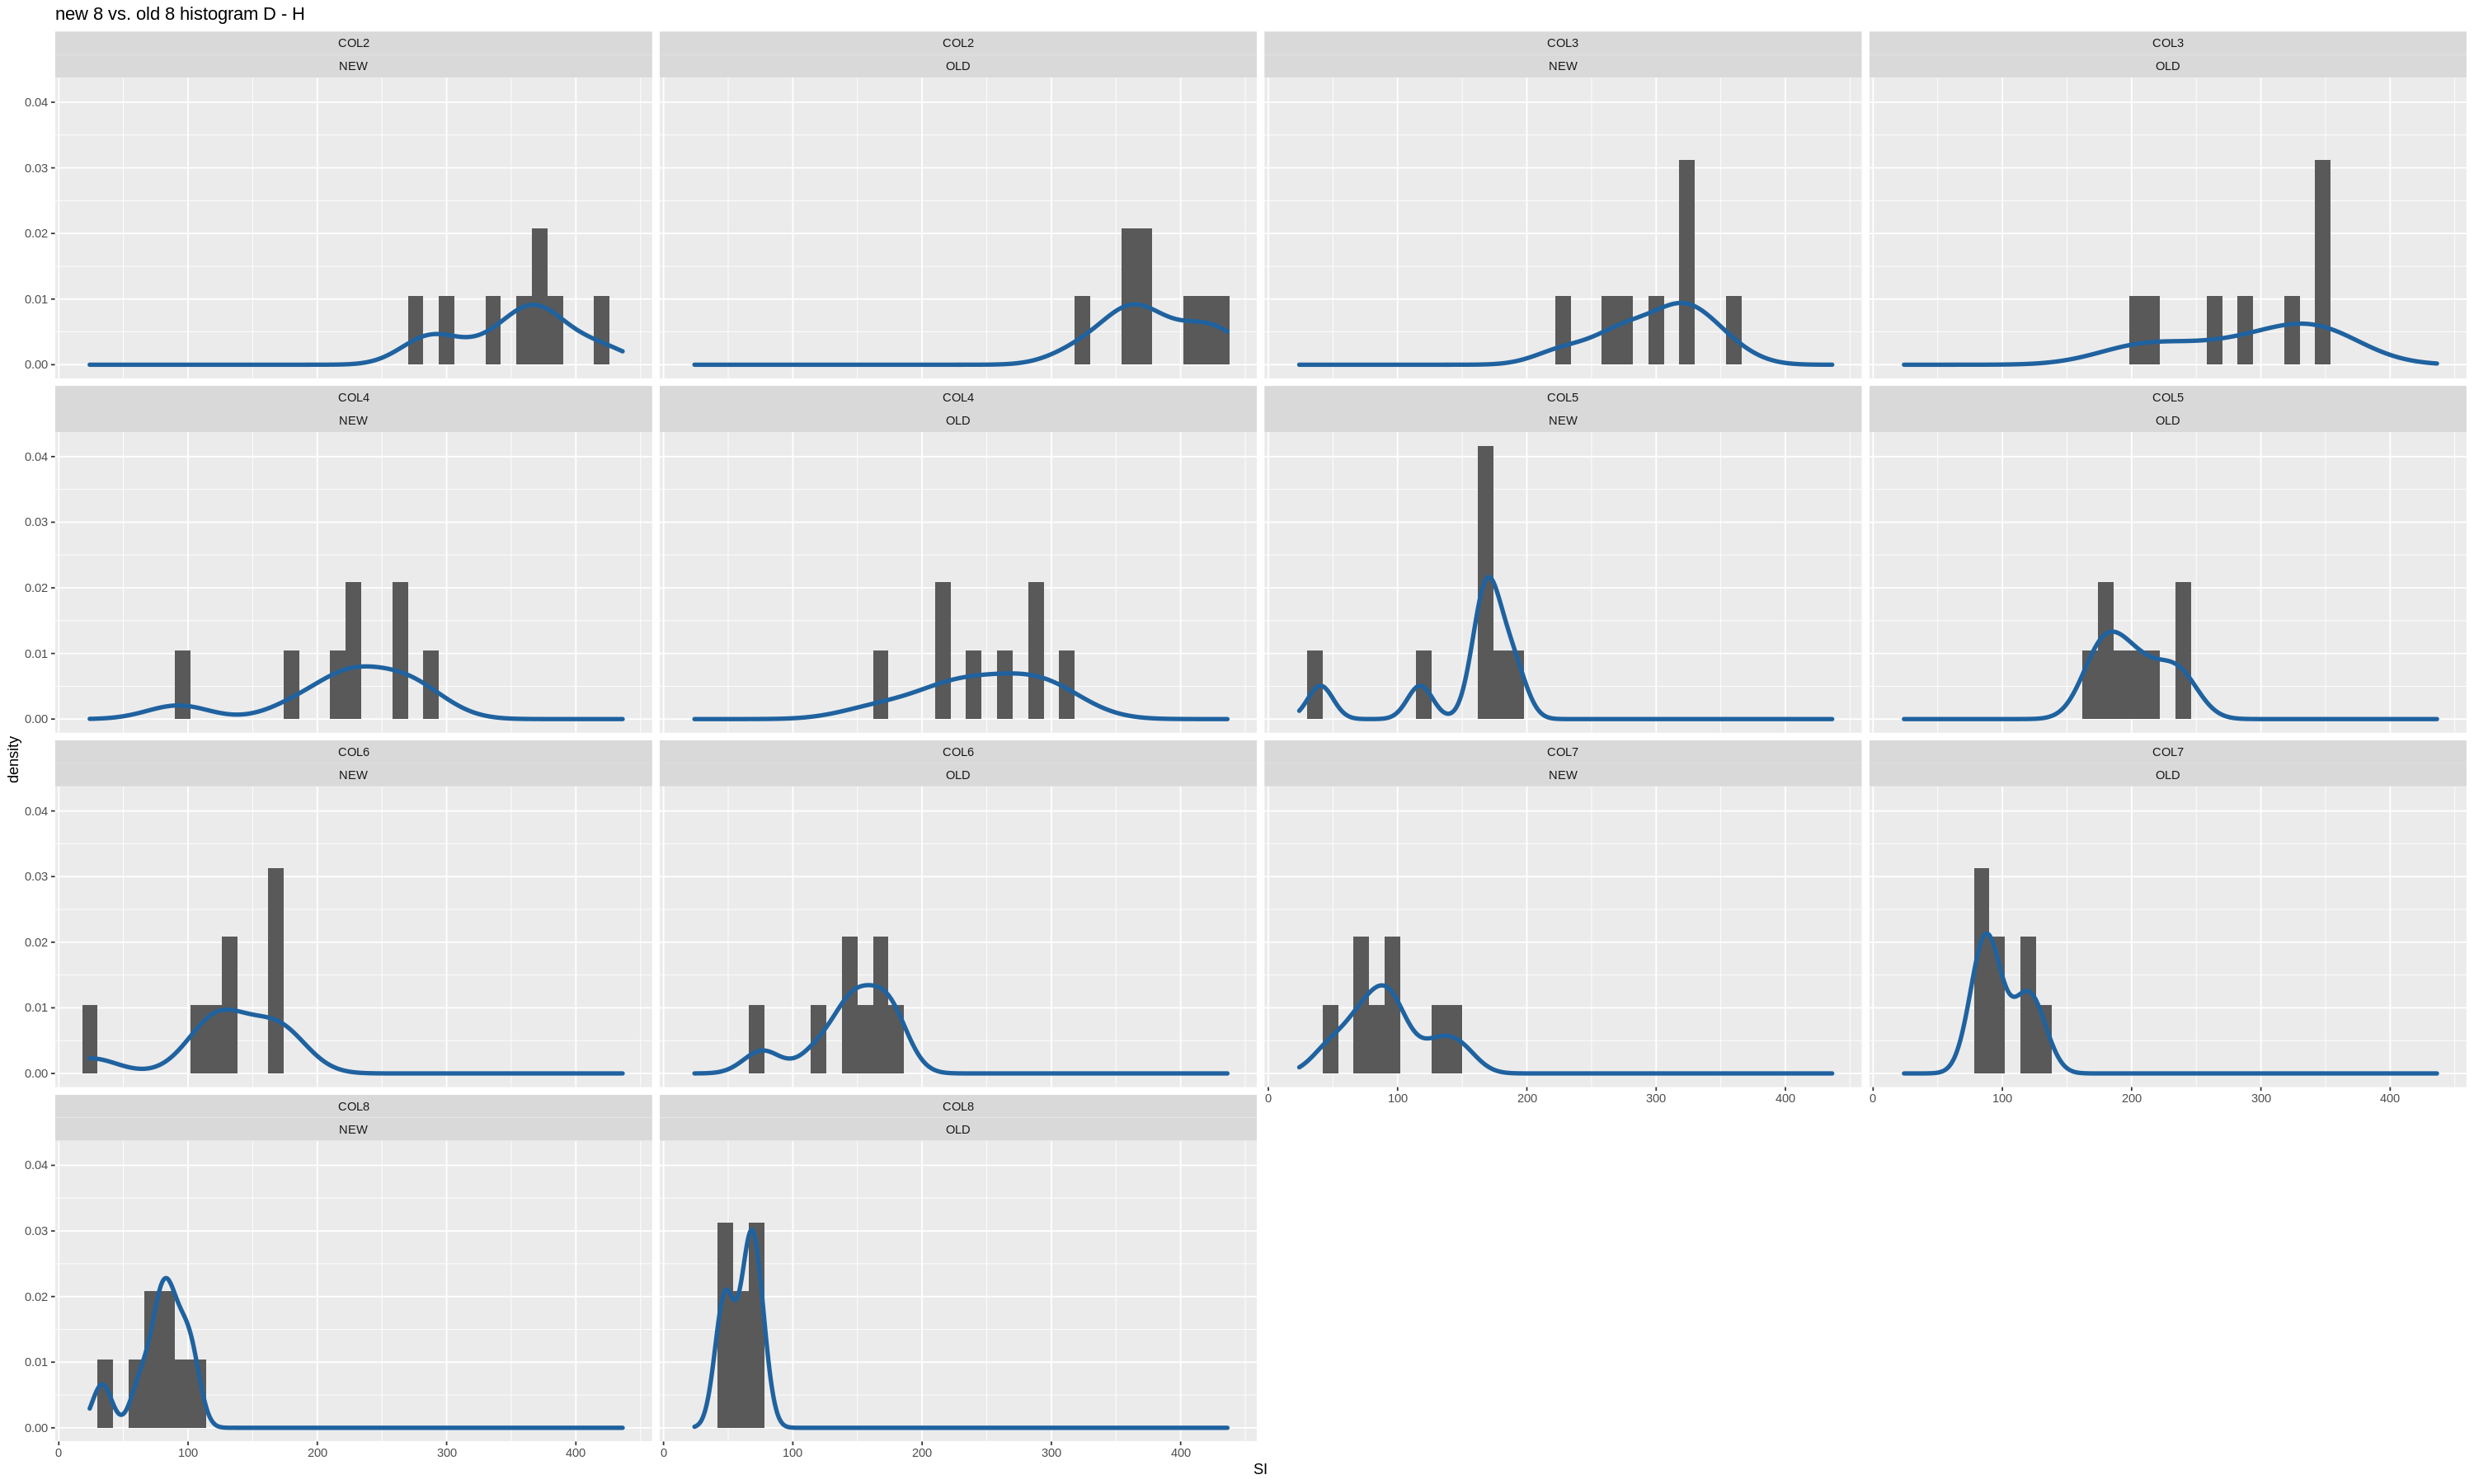

In [423]:
j = 4
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

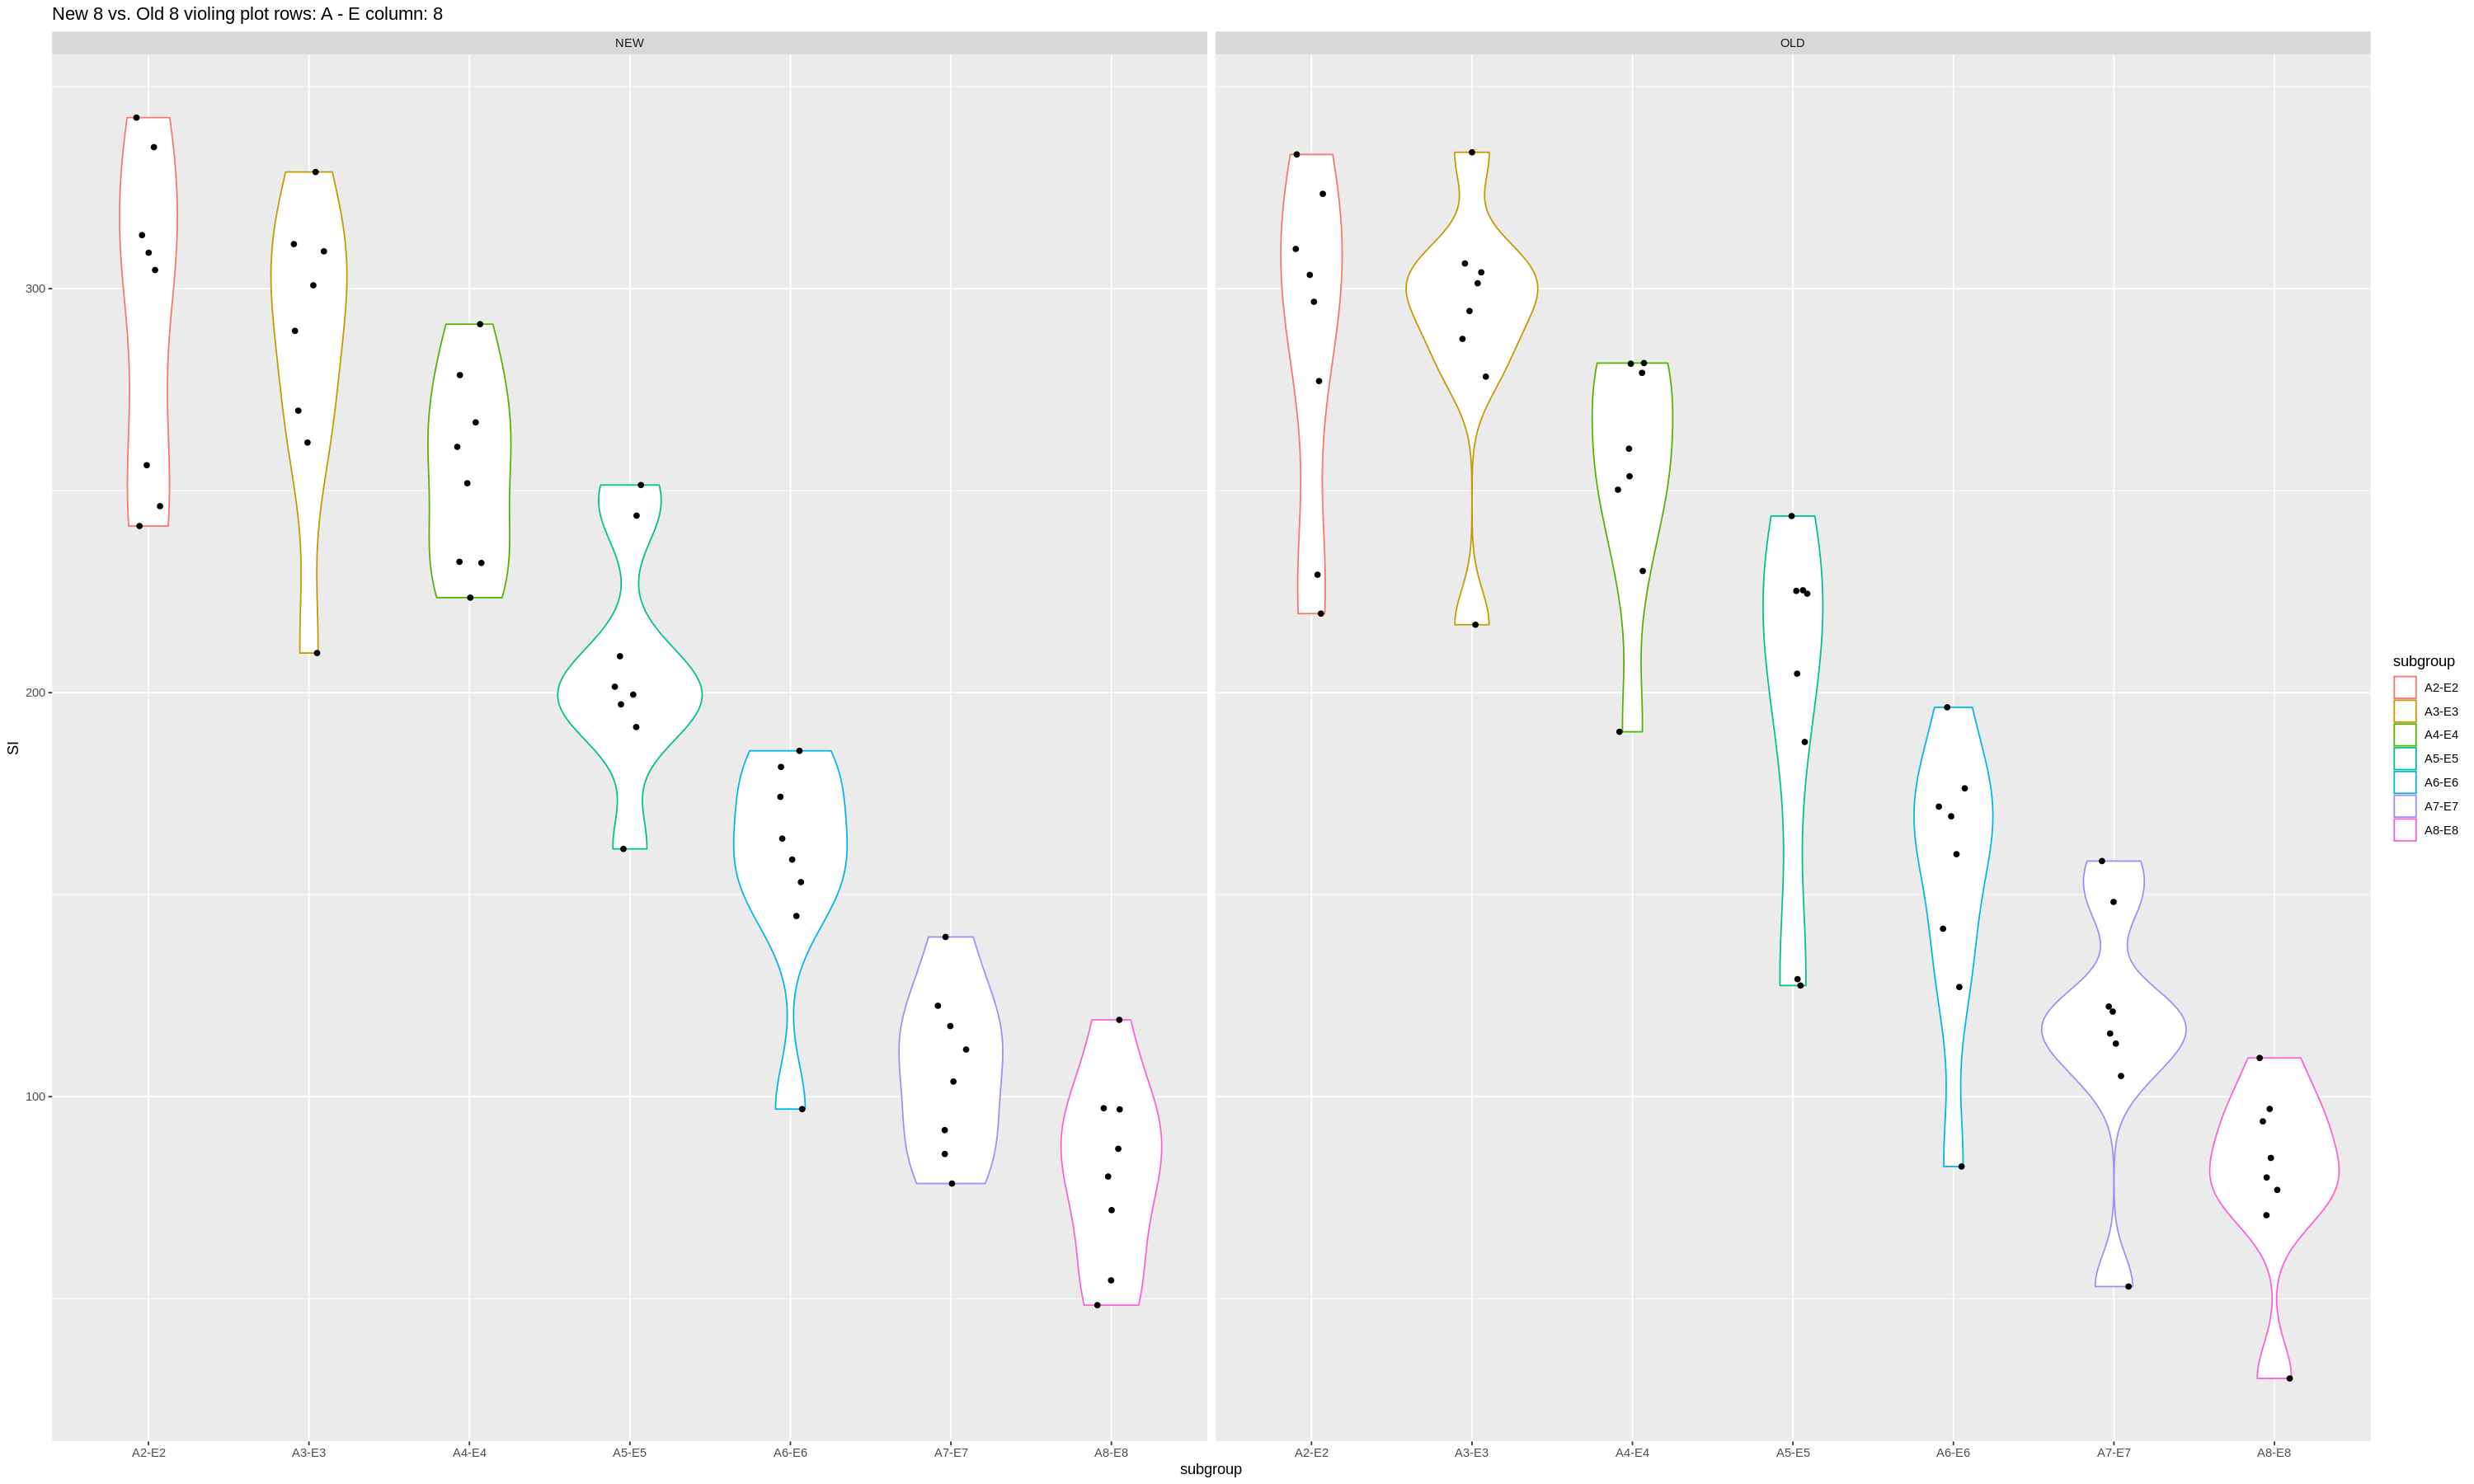

In [424]:
j = 1
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(subgroup, SI)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(~ method)

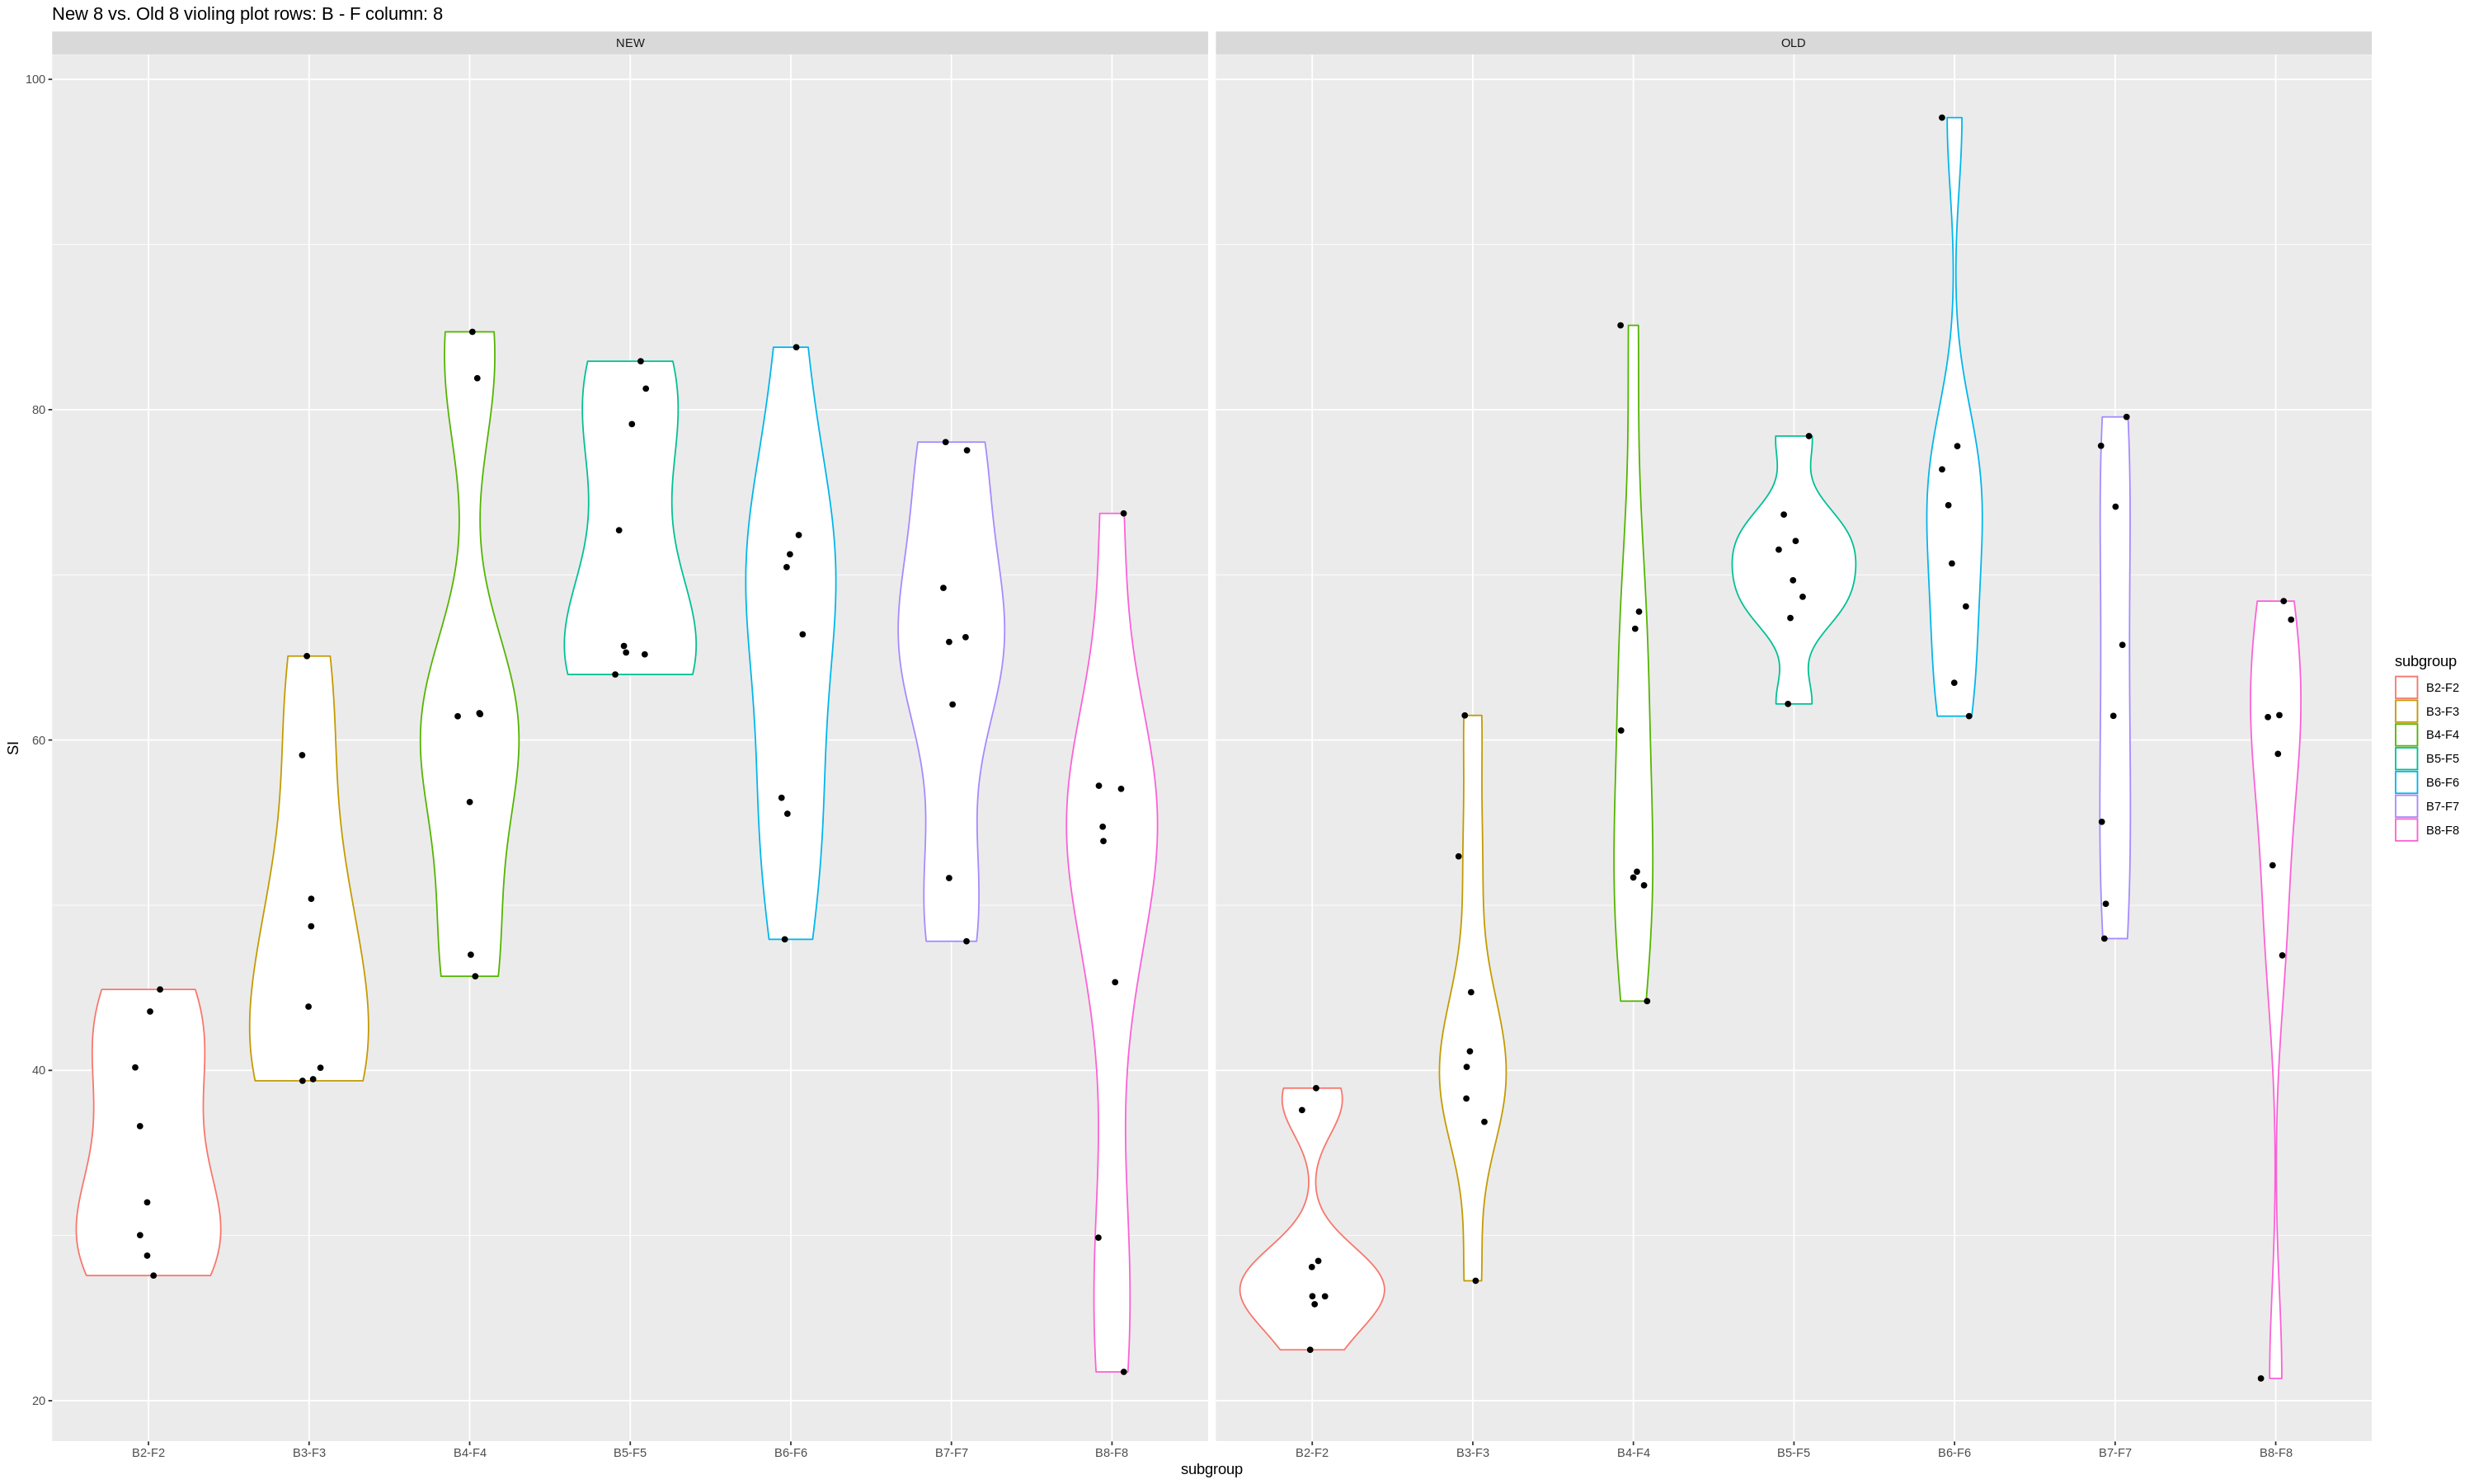

In [425]:
j = 2
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(subgroup, SI)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(~ method)

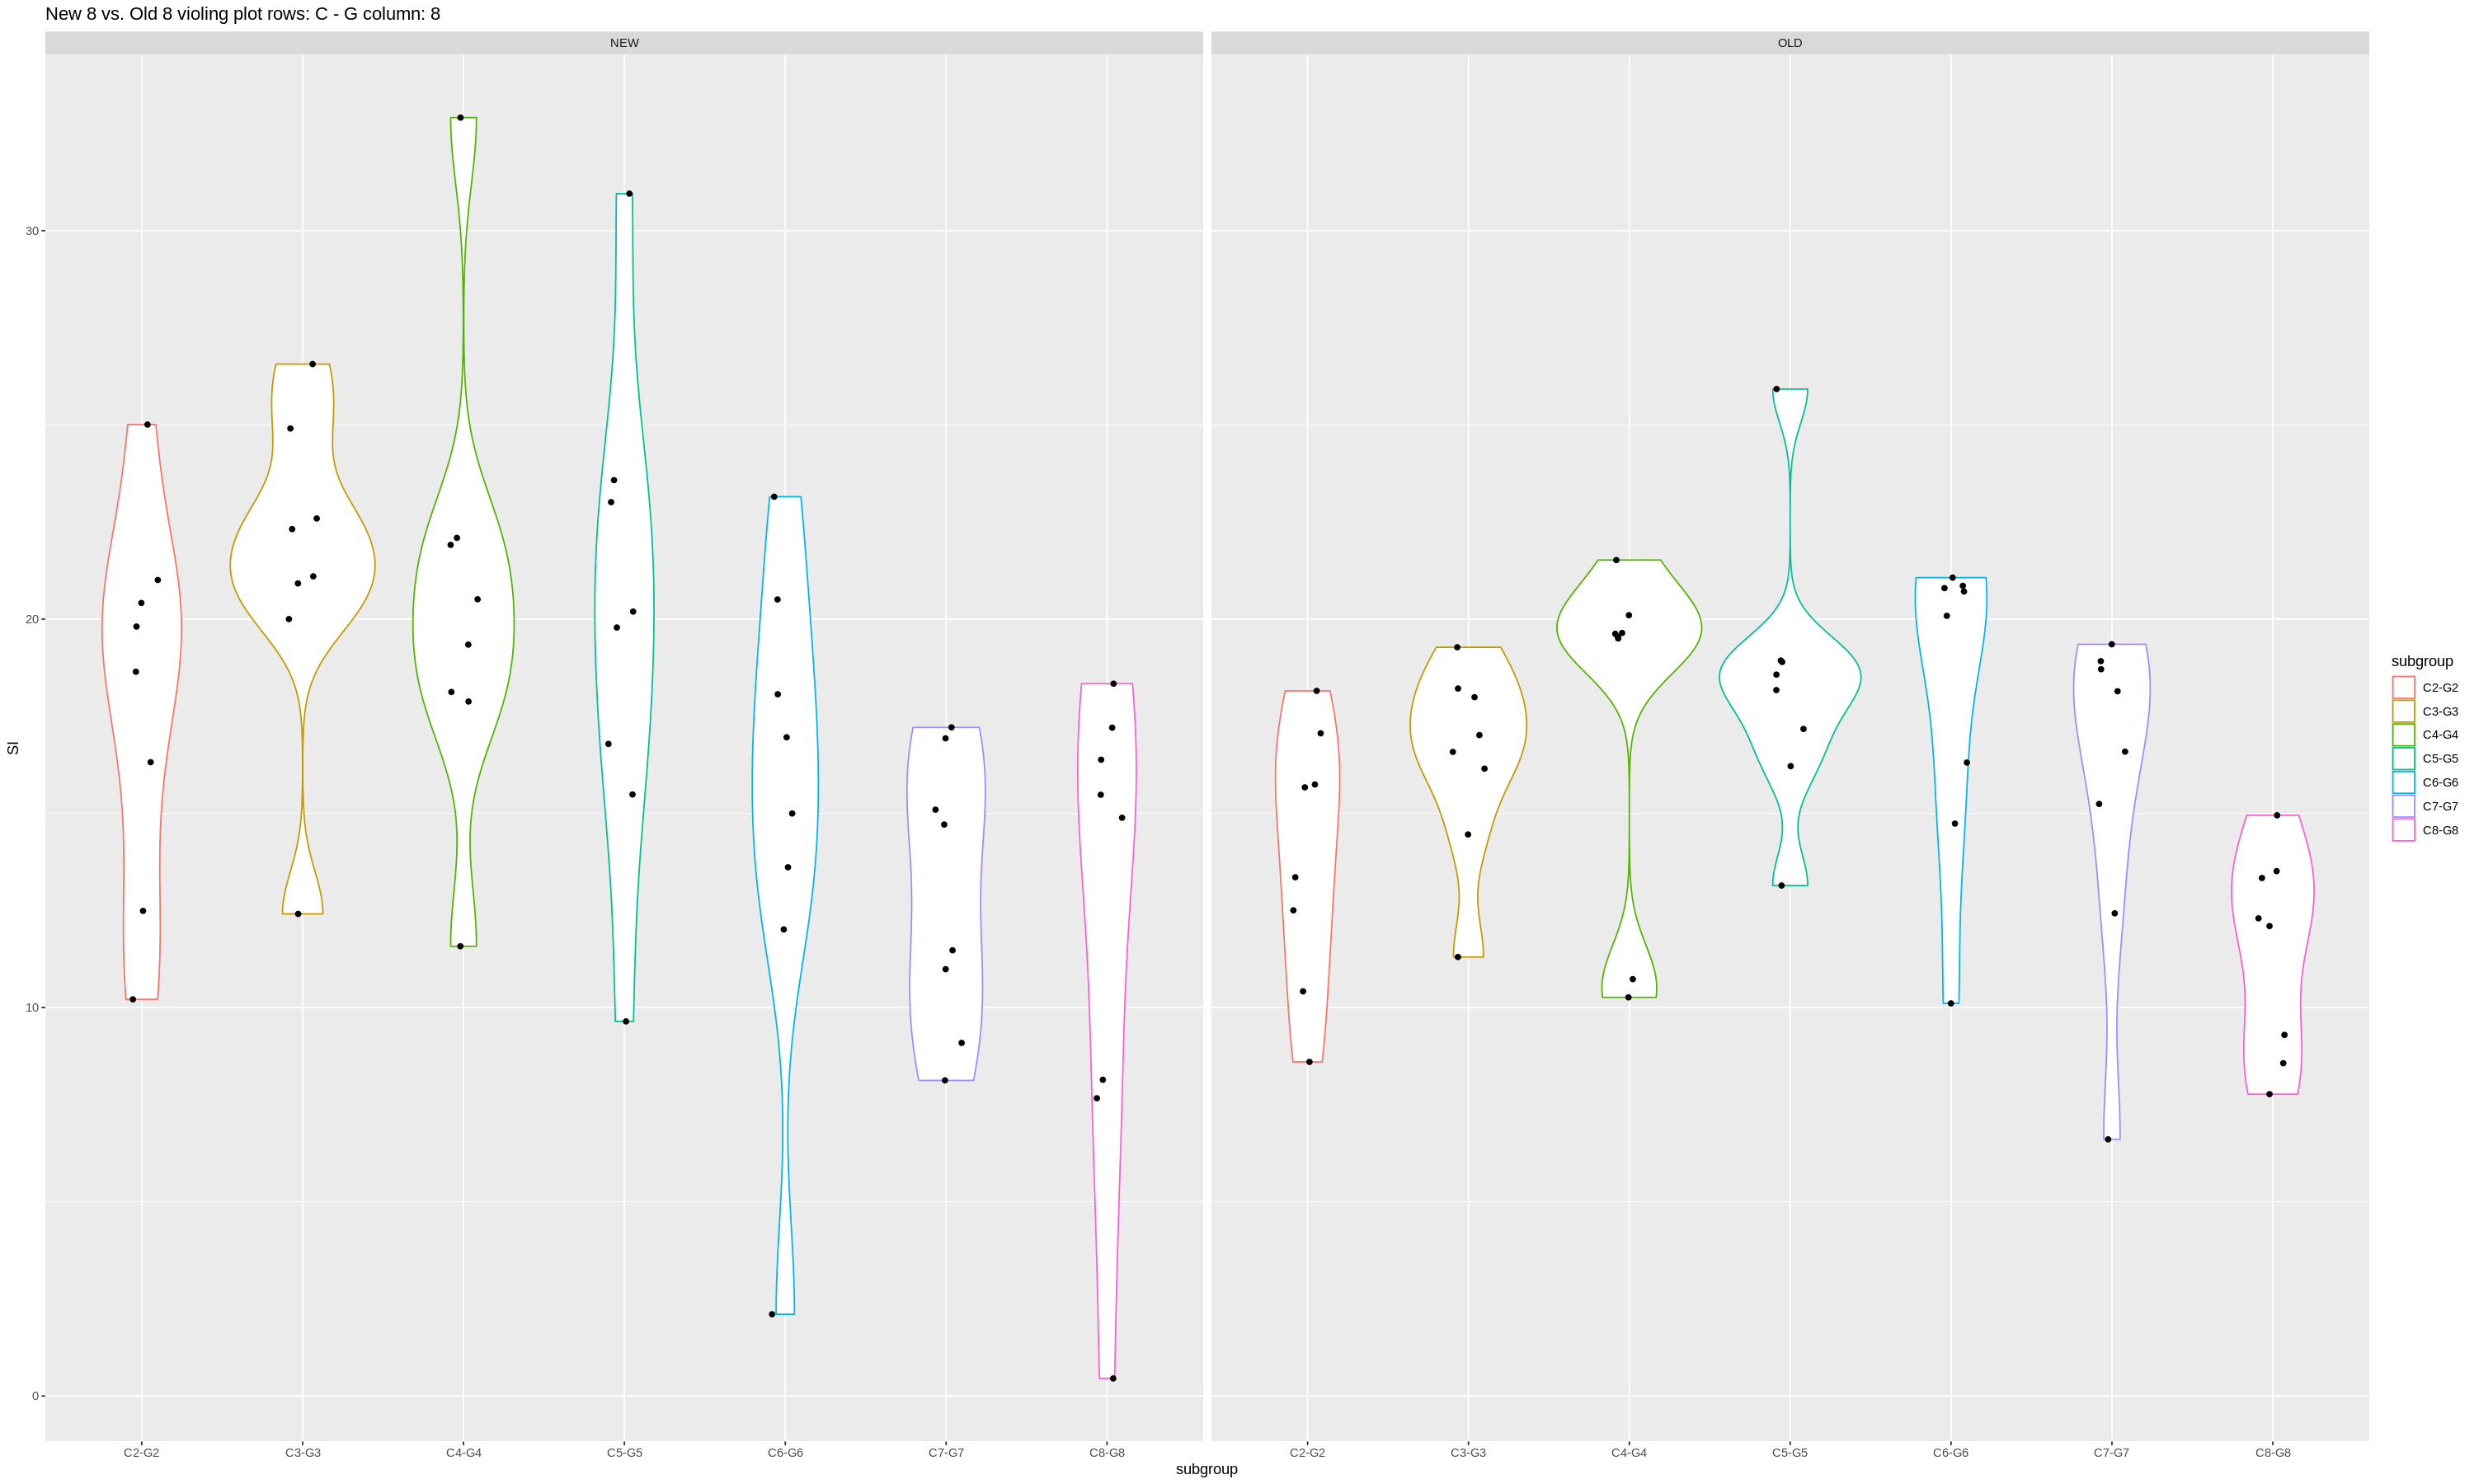

In [426]:
j = 3
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(subgroup, SI)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(~ method)

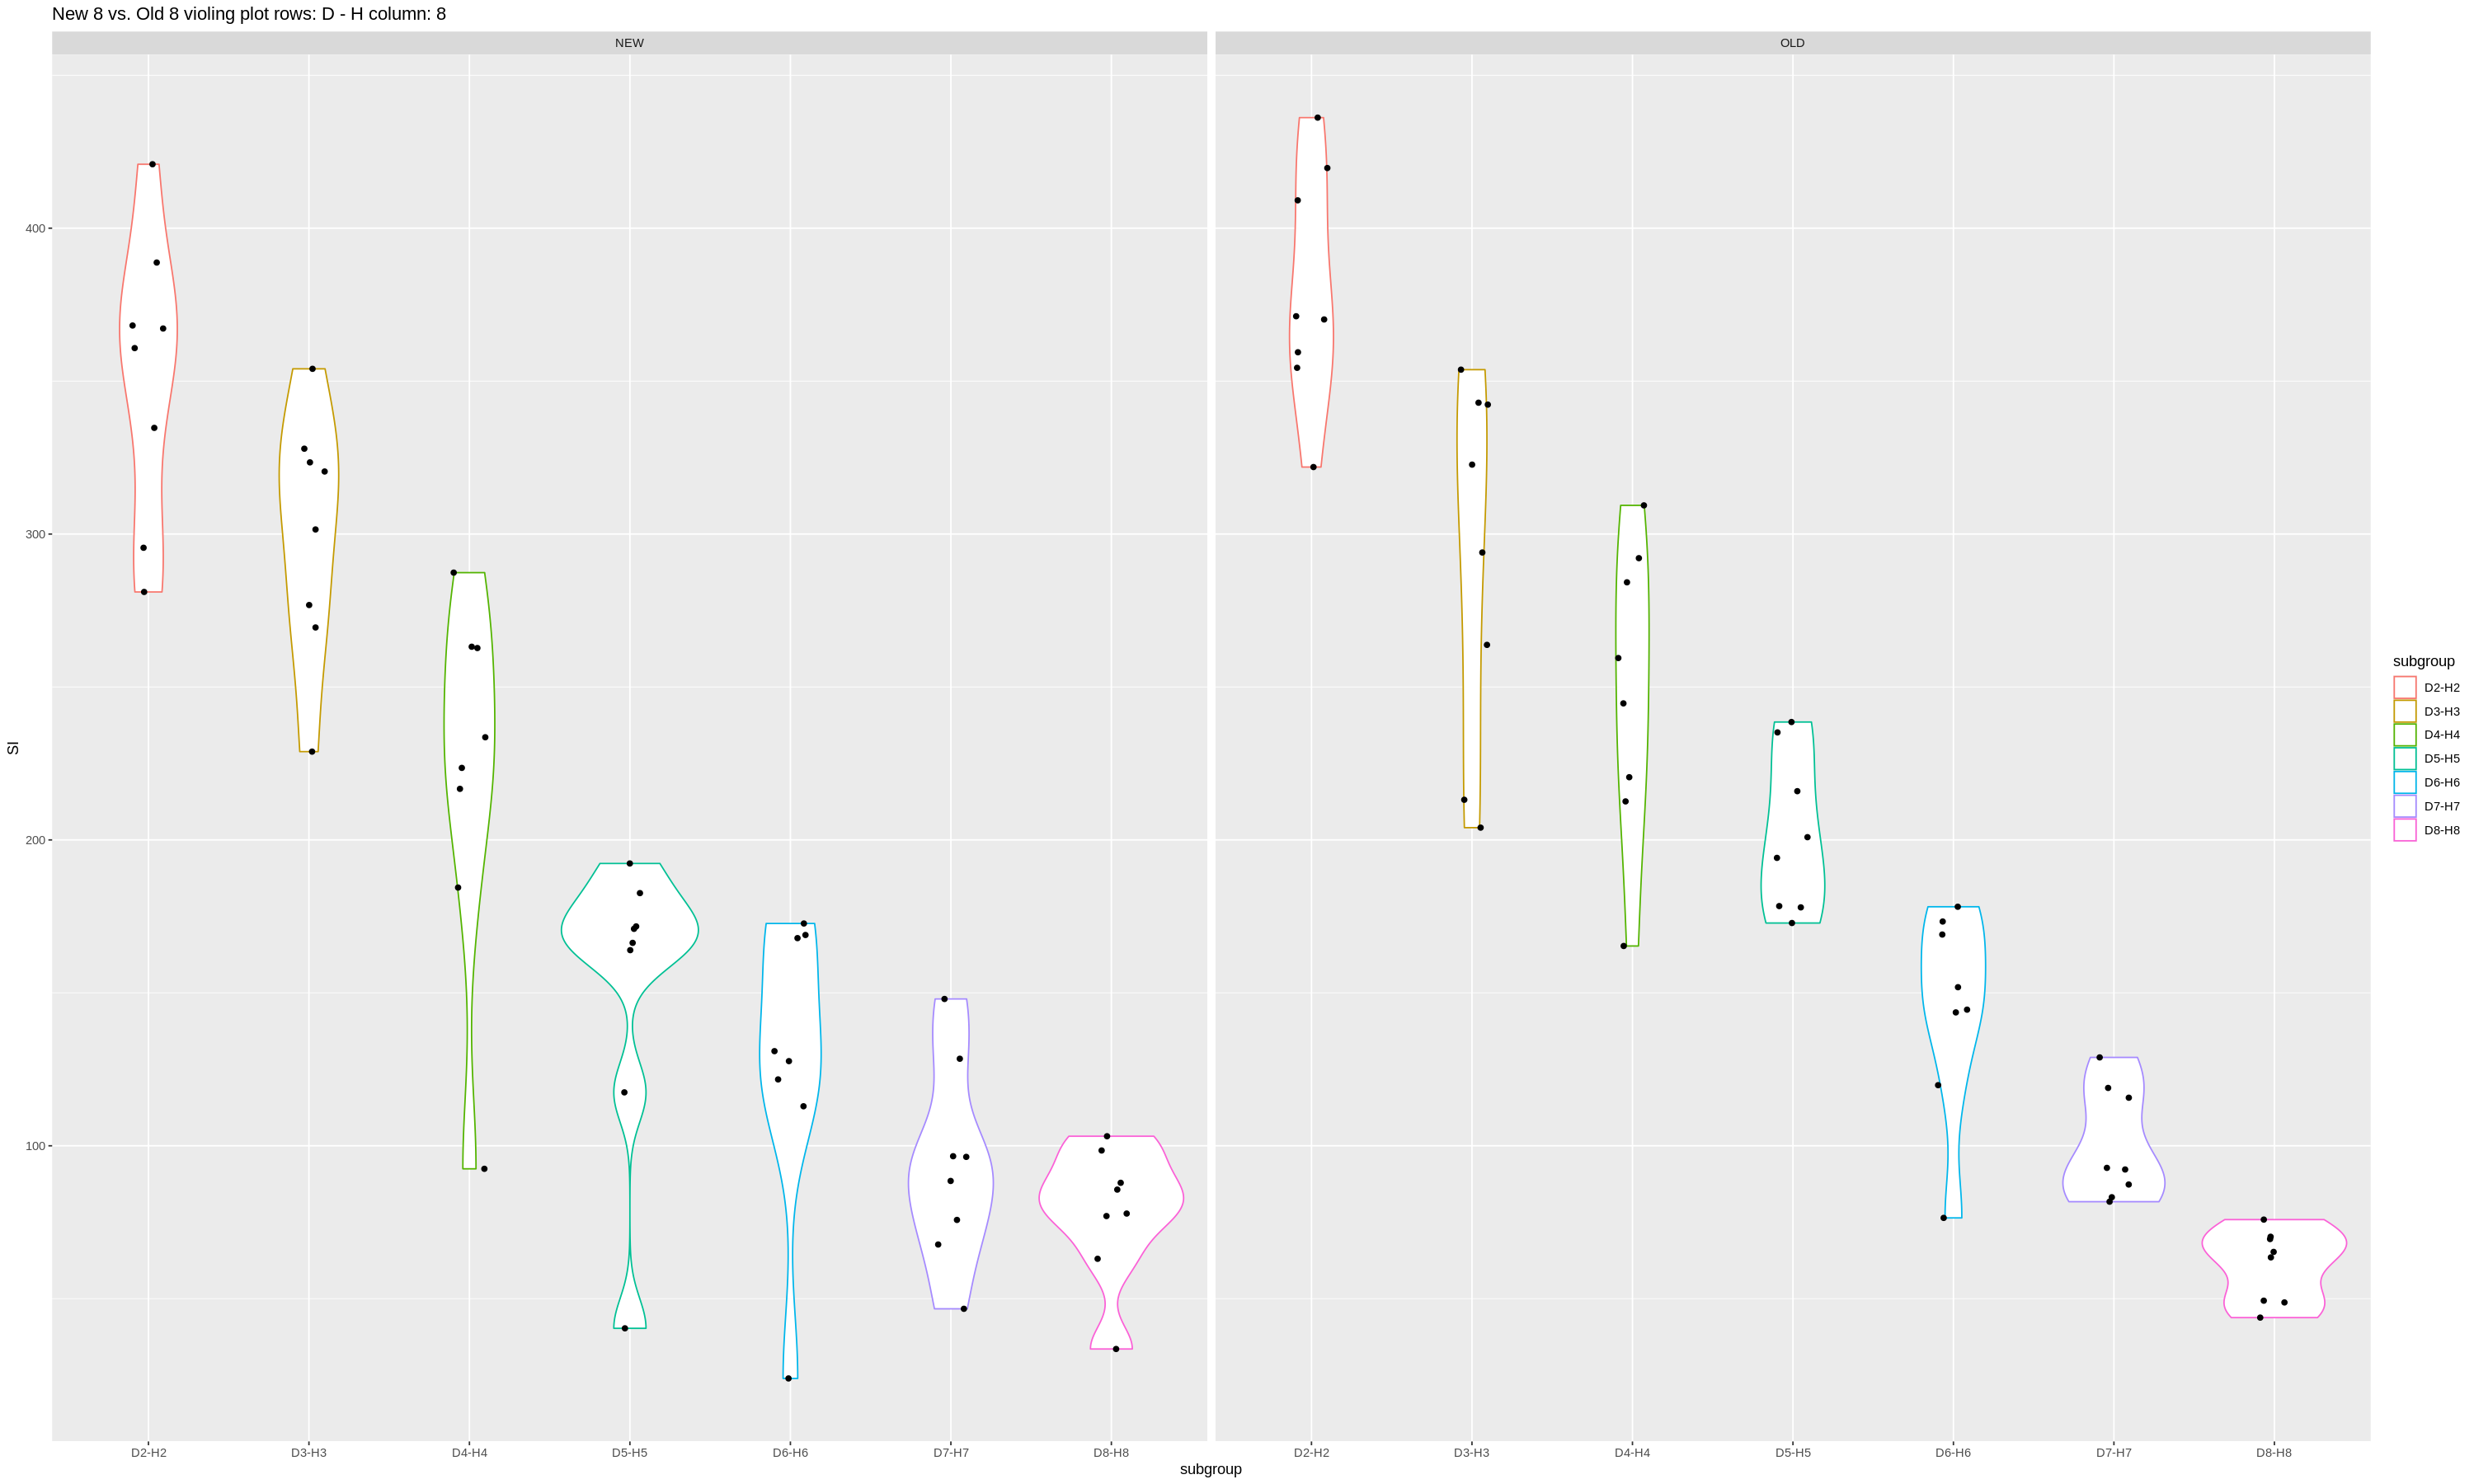

In [428]:
j = 4
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(subgroup, SI)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(~ method)

#### Violin plots
-  It is similar to a box plot, with the addition of a rotated kernel density plot on each side

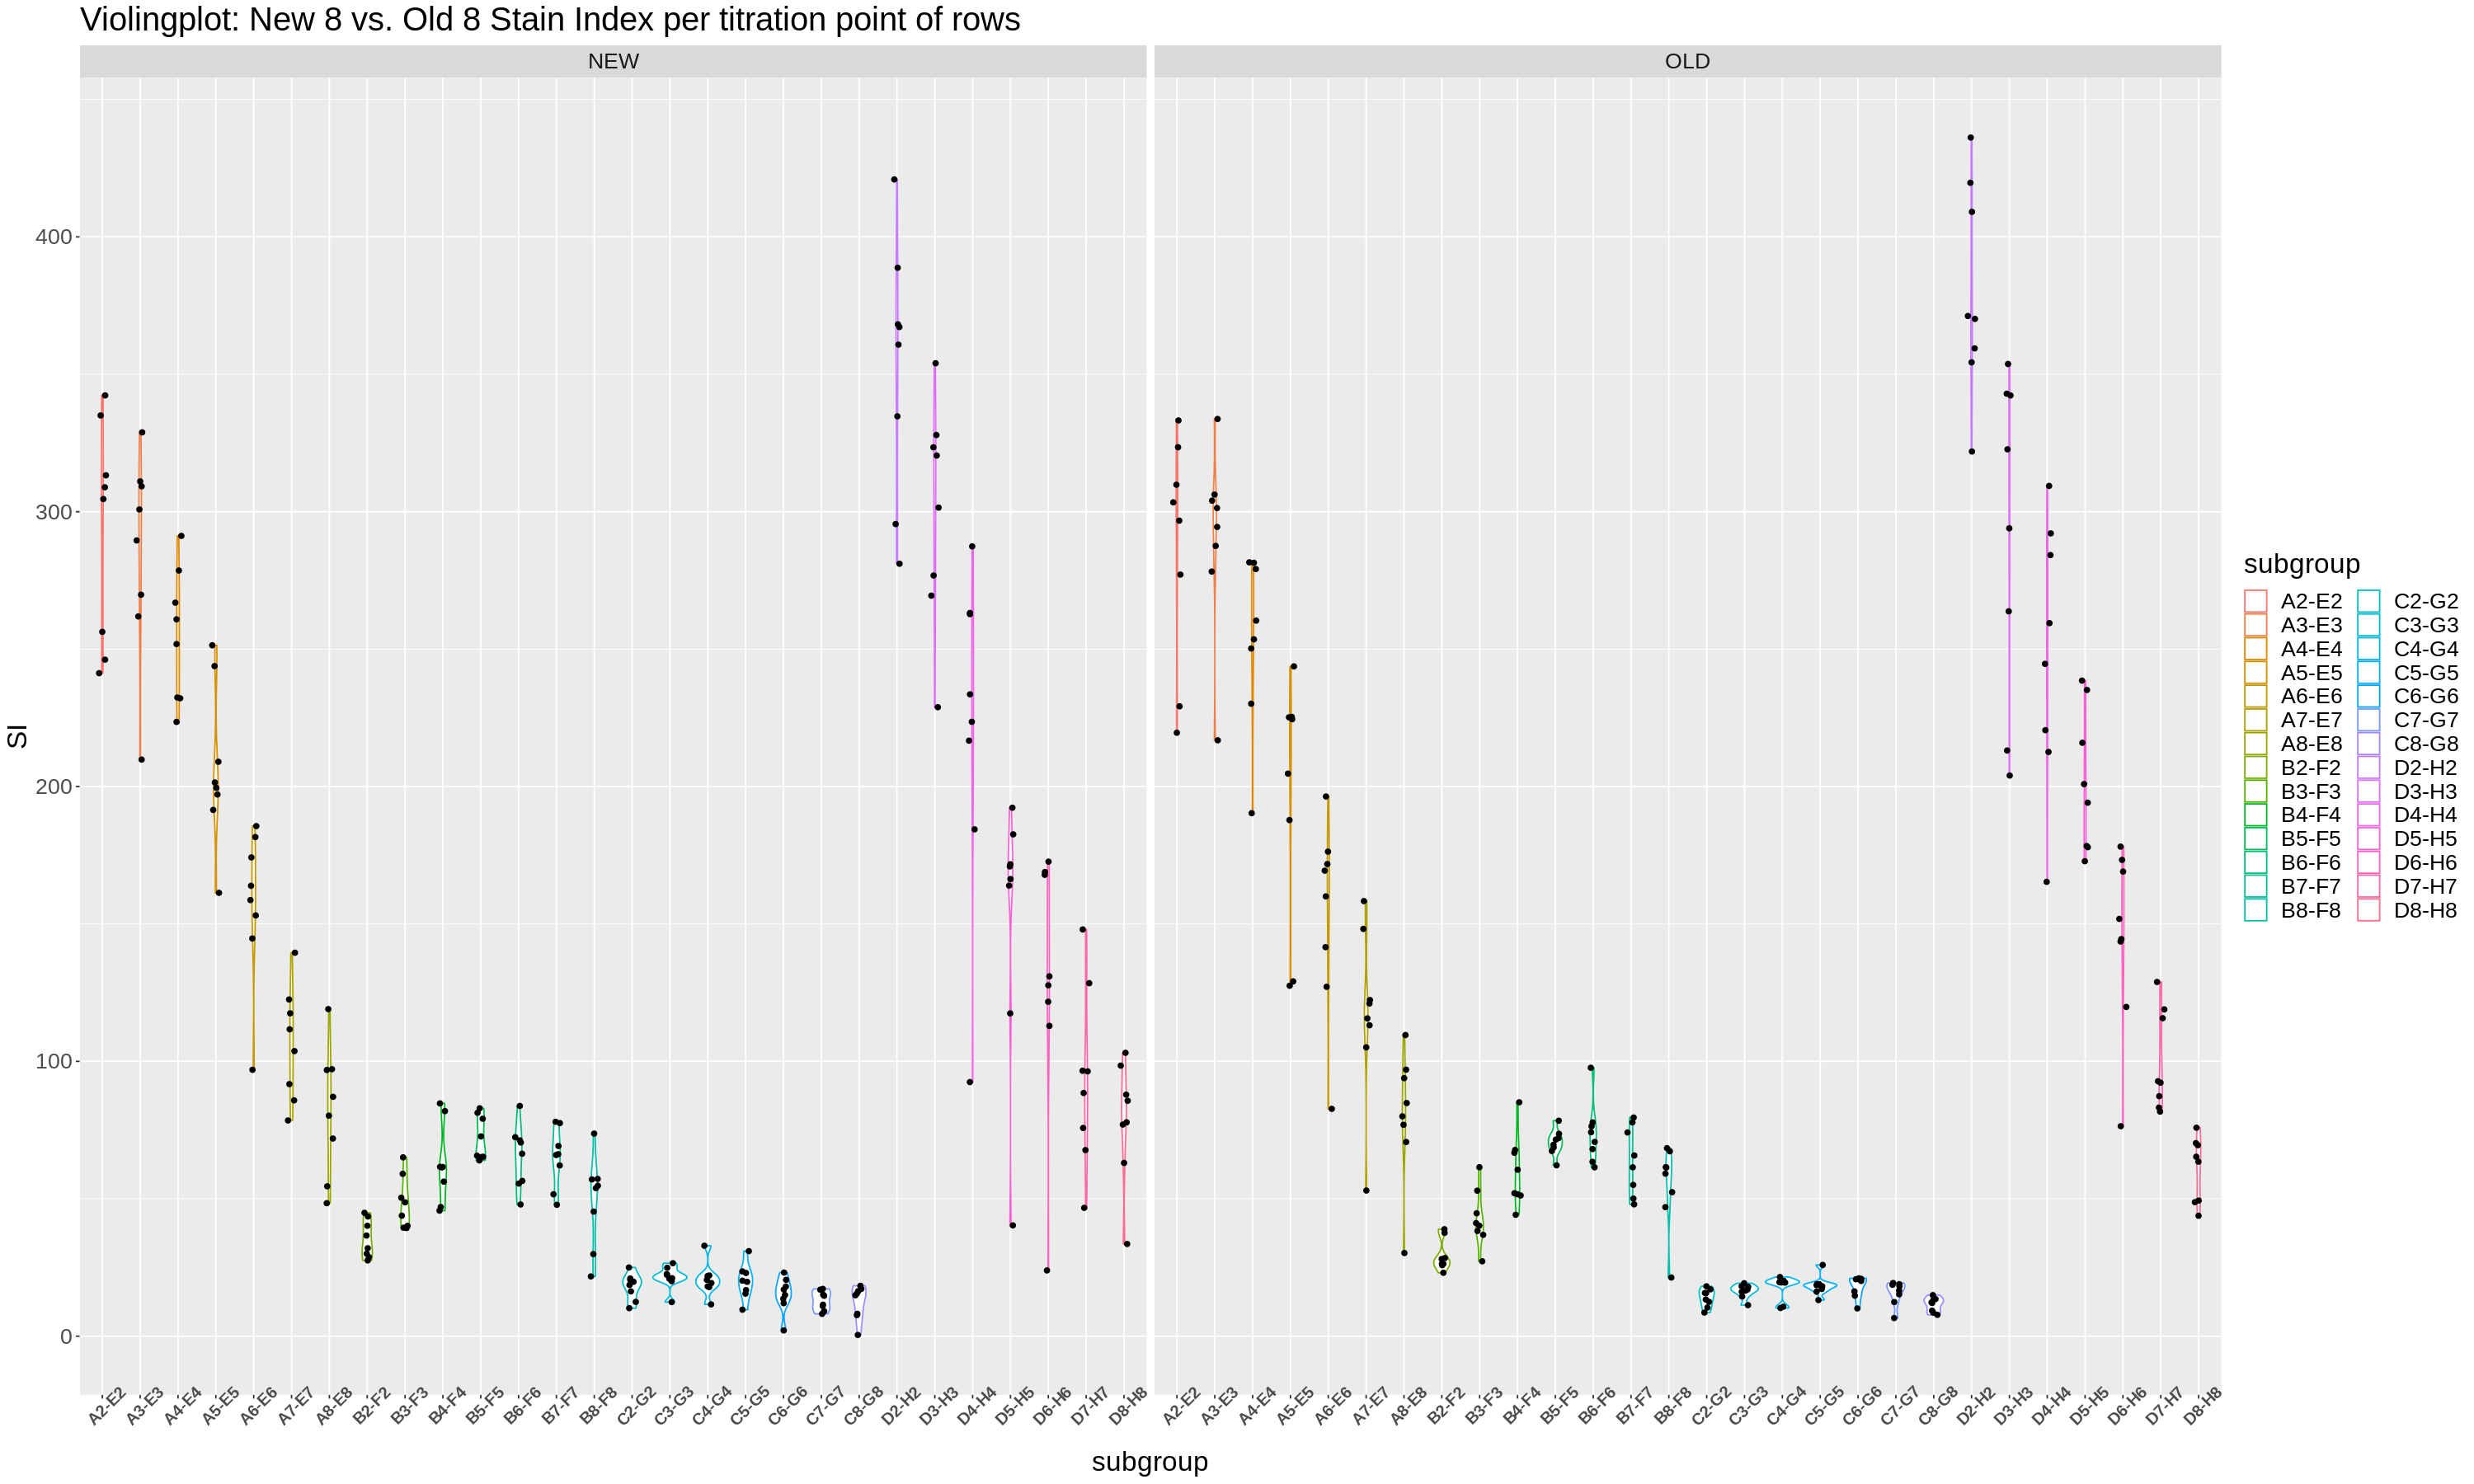

In [482]:
ggplot(dfm, aes(subgroup, SI)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("Violingplot: New 8 vs. Old 8 Stain Index per titration point of rows" ) +
    facet_wrap(~ method) +
    theme(text = element_text(size=20),
        axis.text.x = element_text(face = "bold", 
                           size = 12, angle = 45)) 

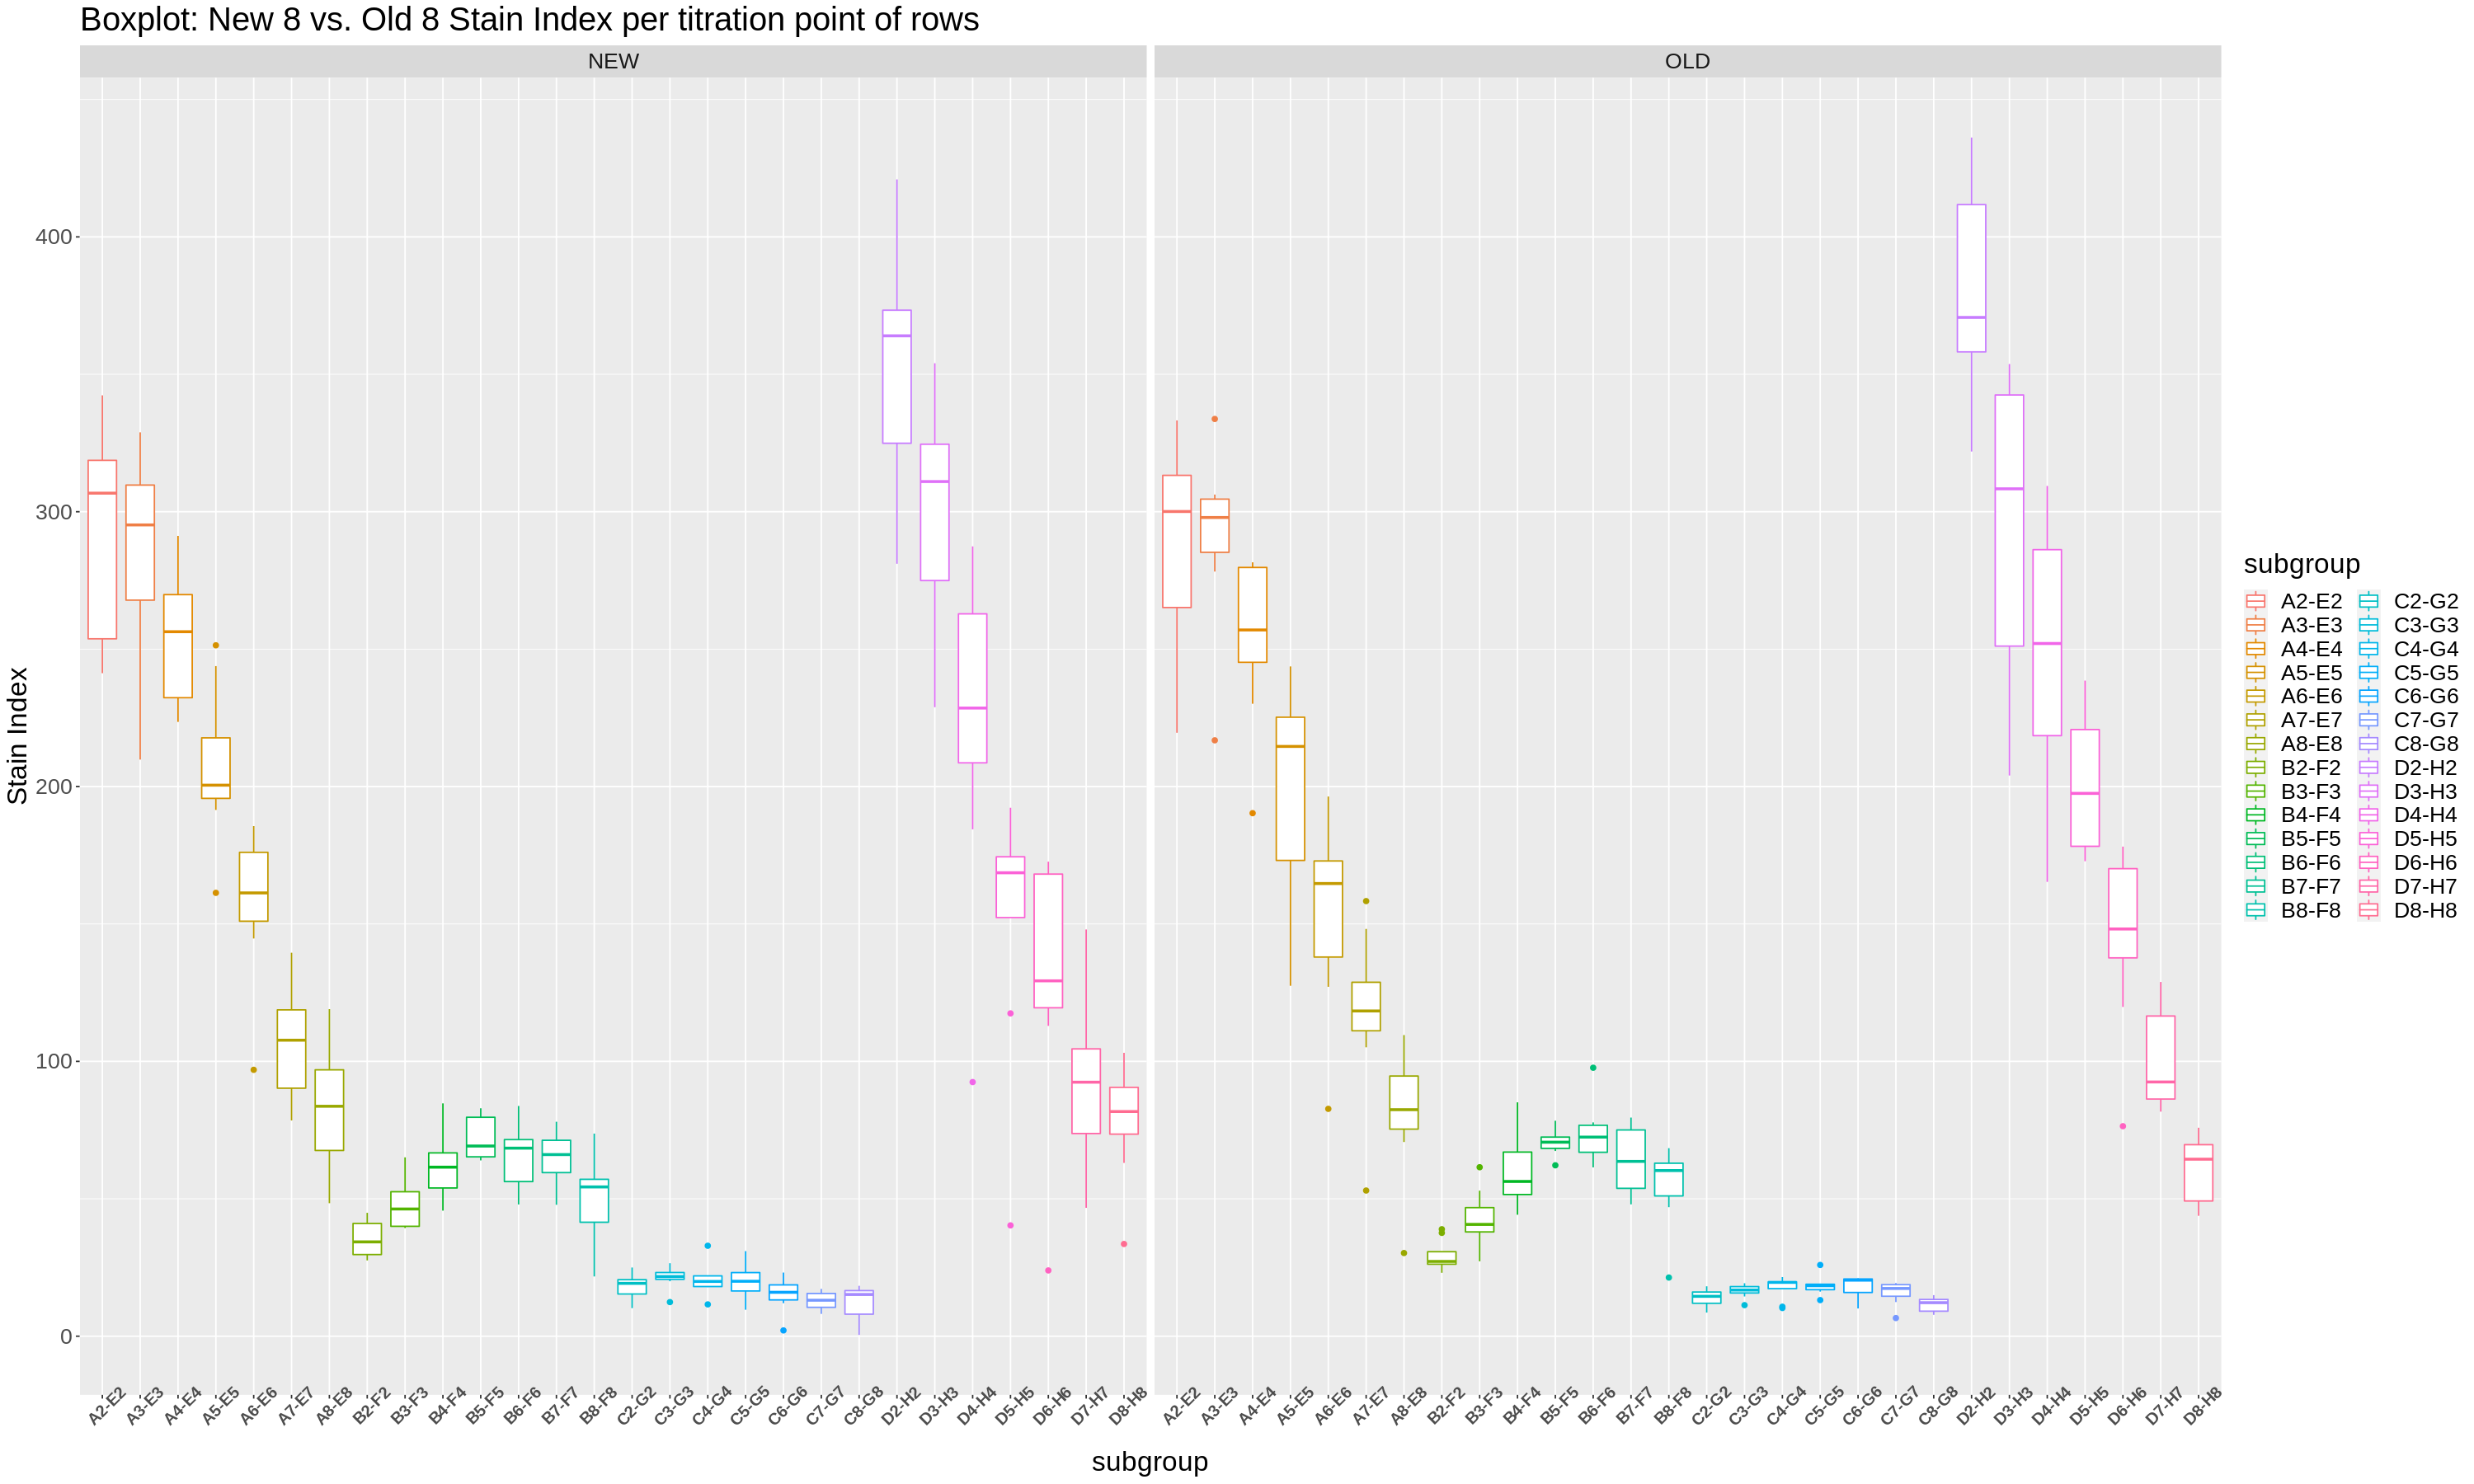

In [483]:
ggplot(dfm, aes(subgroup, SI, colour = subgroup)) + 
  geom_boxplot() + 
  ggtitle("Boxplot: New 8 vs. Old 8 Stain Index per titration point of rows" ) +
  ylab("Stain Index") +
  facet_wrap(~method) + 
  theme(text = element_text(size=20),
        axis.text.x = element_text(face = "bold", 
                           size = 12, angle = 45)) 

### simple stats

In [199]:
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate  
1 A2-E2    NEW    PLATE 1
2 A3-E3    NEW    PLATE 1
3 A4-E4    NEW    PLATE 1
4 A5-E5    NEW    PLATE 1
5 A6-E6    NEW    PLATE 1
6 A7-E7    NEW    PLATE 1

In [431]:
reagents <- c("BV-421","BUV-395","BB-515","PE")
df_stats <- data.frame()
row_idx = 1
rgcnt = 1

for (r in rows) {
    for (i in seq(2,8)) {
        sg = paste0(r[1],i,"-",r[2],i)
        df_stats[row_idx, "ROW.GROUP"] = sg 
        
        dfn<- dfm %>% 
            filter((subgroup == sg ) & method == "NEW")
        dfo<- dfm %>% 
            filter((subgroup == sg) & method == "OLD")
        df_stats[row_idx, "MEAN.O"] = formatC(mean(dfo$SI), format = "e", digits = 2)
        df_stats[row_idx, "MEAN.N"] = formatC(mean(dfn$SI), format = "e", digits = 2)
        df_stats[row_idx, "MIN.O"] = formatC(min(dfo$SI), format = "e", digits = 2)
        df_stats[row_idx, "MIN.N"] = formatC(min(dfn$SI), format = "e", digits = 2)
        df_stats[row_idx, "MAX.O"] = formatC(max(dfo$SI), format = "e", digits = 2)
        df_stats[row_idx, "MAX.N"] = formatC(max(dfn$SI), format = "e", digits = 2)
        df_stats[row_idx, "SD.O"] = formatC(sd(dfo$SI), format = "e", digits = 2)
        df_stats[row_idx, "SD.N"] = formatC(sd(dfn$SI), format = "e", digits = 2)
        pctdiff = abs( mean(dfo$SI) - mean(dfn$SI)) / (mean( mean(dfo$SI), mean(dfn$SI))/2)
        #print(pctdiff)
        df_stats[row_idx, "PCT.DIFF"] = paste0(round(pctdiff*100,2), "%")
        df_stats[row_idx, "CV.O"] = formatC(sd(dfo$SI)/mean(dfo$SI), format = "e", digits = 2)
        df_stats[row_idx, "CV.N"] = formatC(sd(dfn$SI)/mean(dfn$SI), format = "e", digits = 2)
        df_stats[row_idx, "REAGENT"] = reagents[rgcnt]
        cnt = row_idx %% 7
        if (cnt == 0) {
            rgcnt = rgcnt + 1
        }
        row_idx = row_idx + 1
    }
}
write.csv(df_stats, paste0("8v8_stats_si_cmbplts.csv"), row.names = FALSE)

In [432]:
df_stats

ROW.GROUP MEAN.O   MEAN.N   MIN.O    MIN.N    MAX.O    MAX.N    SD.O    
1  A2-E2     2.87e+02 2.93e+02 2.20e+02 2.41e+02 3.33e+02 3.42e+02 4.20e+01
2  A3-E3     2.90e+02 2.85e+02 2.17e+02 2.10e+02 3.34e+02 3.29e+02 3.39e+01
3  A4-E4     2.53e+02 2.55e+02 1.90e+02 2.24e+02 2.82e+02 2.91e+02 3.12e+01
4  A5-E5     1.96e+02 2.07e+02 1.28e+02 1.61e+02 2.44e+02 2.51e+02 4.49e+01
5  A6-E6     1.53e+02 1.57e+02 8.27e+01 9.69e+01 1.96e+02 1.86e+02 3.55e+01
6  A7-E7     1.17e+02 1.06e+02 5.30e+01 7.85e+01 1.58e+02 1.40e+02 3.16e+01
7  A8-E8     8.04e+01 8.19e+01 3.03e+01 4.84e+01 1.10e+02 1.19e+02 2.38e+01
8  B2-F2     2.93e+01 3.55e+01 2.31e+01 2.76e+01 3.89e+01 4.49e+01 5.76e+00
9  B3-F3     4.29e+01 4.83e+01 2.73e+01 3.94e+01 6.15e+01 6.51e+01 1.04e+01
10 B4-F4     5.99e+01 6.25e+01 4.42e+01 4.57e+01 8.51e+01 8.47e+01 1.31e+01
11 B5-F5     7.04e+01 7.20e+01 6.22e+01 6.40e+01 7.84e+01 8.29e+01 4.76e+00
12 B6-F6     7.37e+01 6.55e+01 6.14e+01 4.79e+01 9.77e+01 8.38e+01 1.13e+01
13 B7-F7     6.40e+01 6.48e+01 4.80e+01 4.78e+01 7.96e+01 7.80e+01 1.24e+01
14 B8-F8     5.48e+01 4.92e+01 2.13e+01 2.17e+01 6.84e+01 7.37e+01 1.53e+01
15 C2-G2     1.39e+01 1.80e+01 8.60e+00 1.02e+01 1.82e+01 2.50e+01 3.32e+00
16 C3-G3     1.64e+01 2.14e+01 1.13e+01 1.24e+01 1.93e+01 2.66e+01 2.52e+00
17 C4-G4     1.76e+01 2.05e+01 1.03e+01 1.16e+01 2.15e+01 3.29e+01 4.45e+00
18 C5-G5     1.84e+01 1.99e+01 1.31e+01 9.64e+00 2.59e+01 3.10e+01 3.61e+00
19 C6-G6     1.81e+01 1.52e+01 1.01e+01 2.10e+00 2.11e+01 2.32e+01 4.02e+00
20 C7-G7     1.57e+01 1.30e+01 6.61e+00 8.13e+00 1.94e+01 1.72e+01 4.36e+00
21 C8-G8     1.15e+01 1.23e+01 7.77e+00 4.53e-01 1.49e+01 1.83e+01 2.61e+00
22 D2-H2     3.80e+02 3.52e+02 3.22e+02 2.81e+02 4.36e+02 4.21e+02 3.82e+01
23 D3-H3     2.92e+02 3.00e+02 2.04e+02 2.29e+02 3.54e+02 3.54e+02 5.93e+01
24 D4-H4     2.49e+02 2.20e+02 1.65e+02 9.25e+01 3.09e+02 2.87e+02 4.78e+01
25 D5-H5     2.02e+02 1.51e+02 1.73e+02 4.03e+01 2.39e+02 1.92e+02 2.59e+01
26 D6-H6     1.45e+02 1.28e+02 7.64e+01 2.39e+01 1.78e+02 1.73e+02 3.35e+01
27 D7-H7     1.00e+02 9.35e+01 8.17e+01 4.67e+01 1.29e+02 1.48e+02 1.82e+01
28 D8-H8     6.08e+01 7.83e+01 4.38e+01 3.36e+01 7.59e+01 1.03e+02 1.19e+01
   SD.N     PCT.DIFF CV.O     CV.N     REAGENT
1  4.00e+01 4.82%    1.46e-01 1.36e-01 BV-421 
2  3.76e+01 3.56%    1.17e-01 1.32e-01 BV-421 
3  2.41e+01 1.05%    1.23e-01 9.48e-02 BV-421 
4  2.89e+01 11.13%   2.29e-01 1.40e-01 BV-421 
5  2.81e+01 5.46%    2.32e-01 1.79e-01 BV-421 
6  2.05e+01 18.32%   2.70e-01 1.92e-01 BV-421 
7  2.34e+01 3.76%    2.95e-01 2.86e-01 BV-421 
8  6.83e+00 41.77%   1.96e-01 1.93e-01 BUV-395
9  9.61e+00 25.16%   2.43e-01 1.99e-01 BUV-395
10 1.43e+01 8.72%    2.18e-01 2.29e-01 BUV-395
11 8.04e+00 4.48%    6.76e-02 1.12e-01 BUV-395
12 1.15e+01 22.21%   1.53e-01 1.76e-01 BUV-395
13 1.09e+01 2.63%    1.94e-01 1.68e-01 BUV-395
14 1.66e+01 20.48%   2.79e-01 3.37e-01 BUV-395
15 4.80e+00 58.12%   2.38e-01 2.67e-01 BB-515 
16 4.21e+00 60.82%   1.54e-01 1.97e-01 BB-515 
17 6.00e+00 33.23%   2.52e-01 2.92e-01 BB-515 
18 6.32e+00 16.88%   1.96e-01 3.17e-01 BB-515 
19 6.40e+00 32.16%   2.22e-01 4.22e-01 BB-515 
20 3.50e+00 35.49%   2.77e-01 2.70e-01 BB-515 
21 6.25e+00 14.63%   2.27e-01 5.07e-01 BB-515 
22 4.66e+01 14.78%   1.00e-01 1.32e-01 PE     
23 4.00e+01 5.64%    2.03e-01 1.33e-01 PE     
24 6.09e+01 22.56%   1.92e-01 2.76e-01 PE     
25 4.97e+01 50.58%   1.28e-01 3.30e-01 PE     
26 4.84e+01 22.49%   2.32e-01 3.77e-01 PE     
27 3.25e+01 13.16%   1.82e-01 3.48e-01 PE     
28 2.21e+01 57.66%   1.95e-01 2.82e-01 PE

### ANOVA

In [227]:
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate  
1 A2-E2    NEW    PLATE 1
2 A3-E3    NEW    PLATE 1
3 A4-E4    NEW    PLATE 1
4 A5-E5    NEW    PLATE 1
5 A6-E6    NEW    PLATE 1
6 A7-E7    NEW    PLATE 1

In [456]:
#sapply(colnames(ls_pair[[1]]), function(x) {paste0(sub("([A-Z])([0-9]).*", "\\2", x), substr(x, 6,20))}, USE.NAMES=F)

[1] "2.PLATE.1.NEW" "2.PLATE.1.OLD" "2.PLATE.2.NEW" "2.PLATE.2.OLD"
[5] "2.PLATE.3.NEW" "2.PLATE.3.OLD" "2.PLATE.4.NEW"

In [488]:
dfm.t <- dfm %>% mutate(anova = paste0(subgroup, "-", plate, "-", method))
df_stats = data.frame()
ls_tukey = list()
ls_pair = list()
row_idx = 1

for (r in rows) {
    for (i in seq(2,8)) {
        sg = paste0(r[1],i,"-",r[2],i)
        df_stats[row_idx, "ROW.GROUP"] = sg 
        df.t <- dfm.t %>% filter(subgroup == sg)

        res.aov <- aov(SI ~ anova, data = df.t)
        stat <- summary(res.aov)
        df_stats[row_idx, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
        print(stat)
        stat <- TukeyHSD(res.aov)
        ls_tukey[[row_idx]] <- data.frame(stat$anova)
        
        stat <- pairwise.t.test(df.t$SI, df.t$anova,
                     p.adjust.method = "BH")
        ls_pair[[row_idx]] <- data.frame(stat$p.value)
        ls_pair[[row_idx]] <- rbind(names(ls_pair[[row_idx]]), ls_pair[[row_idx]])
        colnames(ls_pair[[row_idx]]) <- paste0("COL", seq(7))
        rownames(ls_pair[[row_idx]])[1] <- row_idx
        row_idx = row_idx + 1
    }
}
df_tukey <- do.call(rbind, ls_tukey)
# logic to get colnames of each df and put at top and rename colnames for universal dataframe
df_pair <- do.call(rbind, ls_pair)
write.csv(df_pair, paste0("8v8_pair_SI_cmbplts.csv"))
write.csv(df_tukey, paste0("8v8_tukey_SI_cmbplts.csv"))
write.csv(df_stats, paste0("8v8_anova_SI_cmbplts.csv"), row.names = FALSE)

            Df Sum Sq Mean Sq F value  Pr(>F)   
anova        7  20619  2945.6   7.548 0.00532 **
Residuals    8   3122   390.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df Sum Sq Mean Sq F value Pr(>F)
anova        7  12167  1738.1    2.38  0.124
Residuals    8   5842   730.2               
            Df Sum Sq Mean Sq F value  Pr(>F)   
anova        7   9344  1334.8   6.821 0.00735 **
Residuals    8   1566   195.7                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df Sum Sq Mean Sq F value Pr(>F)  
anova        7  15421    2203   3.519 0.0493 *
Residuals    8   5008     626                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df Sum Sq Mean Sq F value Pr(>F)
anova        7   8382  1197.5   1.579  0.267
Residuals    8   6066   758.3               
            Df Sum Sq Mean Sq F value Pr(>F)
anova        7   6788   969.8   2.165  0.151
Resi

In [435]:
ls_pair

[[1]]
                   A2.E2.PLATE.1.NEW  A2.E2.PLATE.1.OLD  A2.E2.PLATE.2.NEW
1                  A2.E2.PLATE.1.NEW  A2.E2.PLATE.1.OLD  A2.E2.PLATE.2.NEW
A2-E2-PLATE 1-OLD  0.832169151226191               <NA>               <NA>
A2-E2-PLATE 2-NEW  0.263155404086116  0.344753747089523               <NA>
A2-E2-PLATE 2-OLD  0.788428236497713  0.926560692458683  0.374734025103208
A2-E2-PLATE 3-NEW 0.0322788152902843 0.0448549632603082   0.21517003485073
A2-E2-PLATE 3-OLD 0.0162563336337912  0.018572540407313 0.0510035573194847
A2-E2-PLATE 4-NEW  0.310779178084436  0.233787345302175 0.0470885062768798
A2-E2-PLATE 4-OLD  0.926560692458683  0.788428236497713  0.233787345302175
                   A2.E2.PLATE.2.OLD  A2.E2.PLATE.3.NEW  A2.E2.PLATE.3.OLD
1                  A2.E2.PLATE.2.OLD  A2.E2.PLATE.3.NEW  A2.E2.PLATE.3.OLD
A2-E2-PLATE 1-OLD               <NA>               <NA>               <NA>
A2-E2-PLATE 2-NEW               <NA>               <NA>               <NA>
A2-E2-PLATE 2-OLD               <NA>               <NA>               <NA>
A2-E2-PLATE 3-NEW 0.0466386010325088               <NA>               <NA>
A2-E2-PLATE 3-OLD  0.018572540407313  0.453761095871398               <NA>
A2-E2-PLATE 4-NEW   0.22198997332663 0.0162563336337912 0.0115270708694207
A2-E2-PLATE 4-OLD   0.75664781720123 0.0309471194779025 0.0162563336337912
                  A2.E2.PLATE.4.NEW
1                 A2.E2.PLATE.4.NEW
A2-E2-PLATE 1-OLD              <NA>
A2-E2-PLATE 2-NEW              <NA>
A2-E2-PLATE 2-OLD              <NA>
A2-E2-PLATE 3-NEW              <NA>
A2-E2-PLATE 3-OLD              <NA>
A2-E2-PLATE 4-NEW              <NA>
A2-E2-PLATE 4-OLD 0.344753747089523

[[2]]
                  A3.E3.PLATE.1.NEW A3.E3.PLATE.1.OLD A3.E3.PLATE.2.NEW
2                 A3.E3.PLATE.1.NEW A3.E3.PLATE.1.OLD A3.E3.PLATE.2.NEW
A3-E3-PLATE 1-OLD 0.737307213356555              <NA>              <NA>
A3-E3-PLATE 2-NEW 0.370175664530145 0.624300614657629              <NA>
A3-E3-PLATE 2-OLD 0.737307213356555 0.621174668854397 0.257931670128461
A3-E3-PLATE 3-NEW 0.249657828962723 0.370175664530145 0.737307213356555
A3-E3-PLATE 3-OLD 0.249657828962723 0.370175664530145 0.737307213356555
A3-E3-PLATE 4-NEW 0.737307213356555 0.588729703493125 0.249657828962723
A3-E3-PLATE 4-OLD 0.997185802541853 0.737307213356555 0.370175664530145
                  A3.E3.PLATE.2.OLD A3.E3.PLATE.3.NEW A3.E3.PLATE.3.OLD
2                 A3.E3.PLATE.2.OLD A3.E3.PLATE.3.NEW A3.E3.PLATE.3.OLD
A3-E3-PLATE 1-OLD              <NA>              <NA>              <NA>
A3-E3-PLATE 2-NEW              <NA>              <NA>              <NA>
A3-E3-PLATE 2-OLD              <NA>              <NA>              <NA>
A3-E3-PLATE 3-NEW 0.249657828962723              <NA>              <NA>
A3-E3-PLATE 3-OLD 0.249657828962723 0.973173626524896              <NA>
A3-E3-PLATE 4-NEW 0.973173626524896 0.249657828962723 0.249657828962723
A3-E3-PLATE 4-OLD 0.737307213356555 0.249657828962723 0.249657828962723
                  A3.E3.PLATE.4.NEW
2                 A3.E3.PLATE.4.NEW
A3-E3-PLATE 1-OLD              <NA>
A3-E3-PLATE 2-NEW              <NA>
A3-E3-PLATE 2-OLD              <NA>
A3-E3-PLATE 3-NEW              <NA>
A3-E3-PLATE 3-OLD              <NA>
A3-E3-PLATE 4-NEW              <NA>
A3-E3-PLATE 4-OLD 0.737307213356555

[[3]]
                   A4.E4.PLATE.1.NEW  A4.E4.PLATE.1.OLD  A4.E4.PLATE.2.NEW
3                  A4.E4.PLATE.1.NEW  A4.E4.PLATE.1.OLD  A4.E4.PLATE.2.NEW
A4-E4-PLATE 1-OLD  0.954582736505763               <NA>               <NA>
A4-E4-PLATE 2-NEW  0.084688465618725  0.084688465618725               <NA>
A4-E4-PLATE 2-OLD  0.324131470406439  0.335904218539518 0.0235011251027306
A4-E4-PLATE 3-NEW    0.2572336394989  0.250334584715685  0.403257684828396
A4-E4-PLATE 3-OLD 0.0235011251027306 0.0235011251027306  0.324131470406439
A4-E4-PLATE 4-NEW  0.266024059357489  0.274728249609568 0.0235011251027306
A4-E4-PLATE 4-OLD  0.684106045426829   0.66770602917317  0.154556540381268
           

In [459]:
df_stats

ROW.GROUP ANOVA   
1  A2-E2     5.32e-03
2  A3-E3     1.24e-01
3  A4-E4     7.35e-03
4  A5-E5     4.93e-02
5  A6-E6     2.67e-01
6  A7-E7     1.51e-01
7  A8-E8     8.10e-02
8  B2-F2     4.76e-03
9  B3-F3     3.09e-03
10 B4-F4     8.78e-04
11 B5-F5     2.47e-03
12 B6-F6     1.24e-01
13 B7-F7     4.42e-02
14 B8-F8     4.28e-01
15 C2-G2     3.25e-02
16 C3-G3     6.87e-03
17 C4-G4     2.38e-02
18 C5-G5     2.13e-01
19 C6-G6     9.44e-01
20 C7-G7     4.69e-01
21 C8-G8     6.36e-01
22 D2-H2     1.59e-02
23 D3-H3     1.98e-02
24 D4-H4     3.30e-01
25 D5-H5     2.51e-01
26 D6-H6     4.01e-01
27 D7-H7     5.94e-01
28 D8-H8     1.68e-01

### Find Outliers using Tietjen Moore Test
- detect multiple outliers in a univariate data set that follows an approximately normal distribution
- If there are no outliers in the data, the test statistic is close to 1. If there are outliers in the data, the test statistic will be closer to zero

In [96]:
# not immediately implenmented
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("D", i, "-H", i) & method == "Old 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [ ]:
#ggplot(dff, aes(subgroup, SI, fill=subgroup)) +
    #geom_boxplot(width = 0.4) + 
#    stat_summary(geom="text", fun=quantile,
#           aes(label=sprintf("%1.1f", ..y..), color=subgroup),
#           position=position_nudge(x=0.4), size=3.25) +
   # ggtitle("New 8 vs. Old 8") + 
   # facet_wrap( ~ method) +
   # theme(axis.text.x = element_text(face = "bold", 
   #                        size = 8.75, angle = 45)) 

In [300]:
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate  
1 A2-E2    NEW    PLATE 1
2 A3-E3    NEW    PLATE 1
3 A4-E4    NEW    PLATE 1
4 A5-E5    NEW    PLATE 1
5 A6-E6    NEW    PLATE 1
6 A7-E7    NEW    PLATE 1

In [460]:
dfm <- dfm %>% mutate(anova = paste0(subgroup, "-", plate, "-", group))
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate   anova             
1 A2-E2    NEW    PLATE 1 A2-E2-PLATE 1-COL2
2 A3-E3    NEW    PLATE 1 A3-E3-PLATE 1-COL3
3 A4-E4    NEW    PLATE 1 A4-E4-PLATE 1-COL4
4 A5-E5    NEW    PLATE 1 A5-E5-PLATE 1-COL5
5 A6-E6    NEW    PLATE 1 A6-E6-PLATE 1-COL6
6 A7-E7    NEW    PLATE 1 A7-E7-PLATE 1-COL7

In [461]:
# linear regression 
dfm <- dfm %>% mutate(wellid = substr(SAMPLE_NAME, 14,15), anova = paste0(wellid, "-", plate, "-", group))
dfn <- dfm %>% filter(method == "NEW")
dfo <- dfm %>% filter(method == "OLD")
dfm.t <- inner_join(x = dfn, y = dfo, by = "anova") %>% 
            distinct(SI.x, SI.y, .keep_all = T)
reg <- lm(SI.y~SI.x,data=dfm.t) 
dfm.t <- dfm.t %>% mutate(regline = reg[[1]][2]*SI.x + reg[[1]][1])
summary(reg)


Call:
lm(formula = SI.y ~ SI.x, data = dfm.t)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.026 -13.045  -6.124   7.086 213.366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.75681    3.67340   1.567    0.119    
SI.x         0.97605    0.02359  41.378   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.96 on 222 degrees of freedom
Multiple R-squared:  0.8852,	Adjusted R-squared:  0.8847 
F-statistic:  1712 on 1 and 222 DF,  p-value: < 2.2e-16


In [462]:
head(dfm.t)

SAMPLE_NAME.x               MFI..x   MFI..1.x SI.x     SN.x     group.x row.x
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30   308.8967 477.8045 COL2    A-E  
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30   309.2416 501.4090 COL3    A-E  
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49   260.8396 450.5773 COL4    A-E  
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38   243.8216 455.9127 COL5    A-E  
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86   185.6048 471.1639 COL6    A-E  
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06   139.5327 356.7222 COL7    A-E  
  subgroup.x method.x plate.x ⋯ MFI..1.y SI.y     SN.y     group.y row.y
1 A2-E2      NEW      PLATE 1 ⋯ 66.15    333.2169 527.8000 COL2    A-E  
2 A3-E3      NEW      PLATE 1 ⋯ 68.04    294.4616 532.6667 COL3    A-E  
3 A4-E4      NEW      PLATE 1 ⋯ 69.30    279.1553 523.7818 COL4    A-E  
4 A5-E5      NEW      PLATE 1 ⋯ 73.71    204.7023 487.3761 COL5    A-E  
5 A6-E6      NEW      PLATE 1 ⋯ 95.76    127.1381 363.1118 COL6    A-E  
6 A7-E7      NEW      PLATE 1 ⋯ 82.53    158.3221 445.8092 COL7    A-E  
  subgroup.y method.y plate.y wellid.y regline 
1 A2-E2      OLD      PLATE 1 A2       307.2564
2 A3-E3      OLD      PLATE 1 A3       307.5930
3 A4-E4      OLD      PLATE 1 A4       260.3502
4 A5-E5      OLD      PLATE 1 A5       243.7397
5 A6-E6      OLD      PLATE 1 A6       186.9170
6 A7-E7      OLD      PLATE 1 A7       141.9481

In [463]:
dfm.t %>% filter(group.x == 'COL2') %>% select(anova, group.x, plate.x, subgroup.x, regline, SI.x, SI.y)

anova           group.x plate.x subgroup.x regline   SI.x      SI.y      
1  A2-PLATE 1-COL2 COL2    PLATE 1 A2-E2      307.25642 308.89673 333.216862
2  B2-PLATE 1-COL2 COL2    PLATE 1 B2-F2       48.27548  43.56184  37.595090
3  C2-PLATE 1-COL2 COL2    PLATE 1 C2-G2       26.26112  21.00737  13.354858
4  D2-PLATE 1-COL2 COL2    PLATE 1 D2-H2      364.16461 367.20113 370.161241
5  E2-PLATE 1-COL2 COL2    PLATE 1 A2-E2      311.50260 313.24708 277.122883
6  F2-PLATE 1-COL2 COL2    PLATE 1 B2-F2       49.58054  44.89892  38.924102
7  G2-PLATE 1-COL2 COL2    PLATE 1 C2-G2       25.68331  20.41538  15.742664
8  H2-PLATE 1-COL2 COL2    PLATE 1 D2-H2      365.11946 368.17940 371.206397
9  A2-PLATE 2-COL2 COL2    PLATE 2 A2-E2      255.91333 256.29397 309.828237
10 B2-PLATE 2-COL2 COL2    PLATE 2 B2-F2       36.99881  32.00850  26.319364
11 C2-PLATE 2-COL2 COL2    PLATE 2 C2-G2       21.68273  16.31665  17.060472
12 D2-PLATE 2-COL2 COL2    PLATE 2 D2-H2      332.45251 334.71099 409.109061
13 E2-PLATE 2-COL2 COL2    PLATE 2 A2-E2      303.07945 304.61728 296.753527
14 F2-PLATE 2-COL2 COL2    PLATE 2 B2-F2       41.50299  36.62319  28.461698
15 G2-PLATE 2-COL2 COL2    PLATE 2 C2-G2       30.16629  25.00835  18.152520
16 H2-PLATE 2-COL2 COL2    PLATE 2 D2-H2      357.91139 360.79448 419.671538
17 A2-PLATE 3-COL2 COL2    PLATE 3 A2-E2      246.02772 246.16581 219.571710
18 B2-PLATE 3-COL2 COL2    PLATE 3 B2-F2       32.67360  27.57717  26.326410
19 C2-PLATE 3-COL2 COL2    PLATE 3 C2-G2       17.94677  12.48903   8.600984
20 D2-PLATE 3-COL2 COL2    PLATE 3 D2-H2      294.19798 295.51791 359.435794
21 E2-PLATE 3-COL2 COL2    PLATE 3 A2-E2      241.23099 241.25140 229.189654
22 F2-PLATE 3-COL2 COL2    PLATE 3 B2-F2       35.06032  30.02245  23.082901
23 G2-PLATE 3-COL2 COL2    PLATE 3 C2-G2       15.72394  10.21166  12.503224
24 H2-PLATE 3-COL2 COL2    PLATE 3 D2-H2      280.09639 281.07034 321.903736
25 A2-PLATE 4-COL2 COL2    PLATE 4 A2-E2      332.75996 335.02599 323.460095
26 B2-PLATE 4-COL2 COL2    PLATE 4 B2-F2       44.97140  40.17669  25.841774
27 C2-PLATE 4-COL2 COL2    PLATE 4 C2-G2       25.09128  19.80882  15.669211
28 D2-PLATE 4-COL2 COL2    PLATE 4 D2-H2      416.58580 420.90844 436.147864
29 E2-PLATE 4-COL2 COL2    PLATE 4 A2-E2      339.89234 342.33335 303.406264
30 F2-PLATE 4-COL2 COL2    PLATE 4 B2-F2       33.85057  28.78302  28.093782
31 G2-PLATE 4-COL2 COL2    PLATE 4 C2-G2       23.95562  18.64531  10.417868
32 H2-PLATE 4-COL2 COL2    PLATE 4 D2-H2      385.21531 388.76829 354.347058

In [464]:
head(dfm.t, 20)

SAMPLE_NAME.x               MFI..x    MFI..1.x SI.x       SN.x      group.x
1  Specimen_001_A2_A02_003.fcs 33111.855  69.300  308.896726 477.80453 COL2   
2  Specimen_001_A3_A03_004.fcs 34747.648  69.300  309.241566 501.40905 COL3   
3  Specimen_001_A4_A04_005.fcs 34915.230  77.490  260.839640 450.57725 COL4   
4  Specimen_001_A5_A05_006.fcs 36190.350  79.380  243.821622 455.91271 COL5   
5  Specimen_001_A6_A06_007.fcs 36213.660  76.860  185.604823 471.16393 COL6   
6  Specimen_001_A7_A07_008.fcs 36407.070 102.060  139.532694 356.72223 COL7   
7  Specimen_001_A8_A08_009.fcs 37447.828 151.200   80.240020 247.67083 COL8   
8  Specimen_001_B2_B02_015.fcs 10368.359 136.120   43.561838  76.17073 COL2   
9  Specimen_001_B3_B03_016.fcs 15745.100 137.780   59.085214 114.27711 COL3   
10 Specimen_001_B4_B04_017.fcs 23477.379 147.325   84.712966 159.35774 COL4   
11 Specimen_001_B5_B05_018.fcs 30982.239 160.605   81.276228 192.90955 COL5   
12 Specimen_001_B6_B06_019.fcs 36996.418 175.960   72.411202 210.25472 COL6   
13 Specimen_001_B7_B07_020.fcs 41308.270 200.030   66.227185 206.51037 COL7   
14 Specimen_001_B8_B08_021.fcs 47612.949 202.520   57.044127 235.10247 COL8   
15 Specimen_001_C2_C02_027.fcs  6555.000 142.500   21.007371  46.00000 COL2   
16 Specimen_001_C3_C03_028.fcs  9686.625 139.125   22.316651  69.62534 COL3   
17 Specimen_001_C4_C04_029.fcs 13561.500 150.000   22.091451  90.41000 COL4   
18 Specimen_001_C5_C05_030.fcs 19801.500 167.250   20.193875 118.39462 COL5   
19 Specimen_001_C6_C06_031.fcs 23304.750 282.375   13.611927  82.53121 COL6   
20 Specimen_001_C7_C07_032.fcs 22745.250 381.375    9.090341  59.64012 COL7   
   row.x subgroup.x method.x plate.x ⋯ MFI..1.y SI.y      SN.y      group.y
1  A-E   A2-E2      NEW      PLATE 1 ⋯  66.150  333.21686 527.79997 COL2   
2  A-E   A3-E3      NEW      PLATE 1 ⋯  68.040  294.46156 532.66667 COL3   
3  A-E   A4-E4      NEW      PLATE 1 ⋯  69.300  279.15533 523.78177 COL4   
4  A-E   A5-E5      NEW      PLATE 1 ⋯  73.710  204.70226 487.37605 COL5   
5  A-E   A6-E6      NEW      PLATE 1 ⋯  95.760  127.13808 363.11183 COL6   
6  A-E   A7-E7      NEW      PLATE 1 ⋯  82.530  158.32208 445.80915 COL7   
7  A-E   A8-E8      NEW      PLATE 1 ⋯ 163.170   76.91984 228.91506 COL8   
8  B-F   B2-F2      NEW      PLATE 1 ⋯ 127.820   37.59509  80.58441 COL2   
9  B-F   B3-F3      NEW      PLATE 1 ⋯ 133.630   52.95623 126.91924 COL3   
10 B-F   B4-F4      NEW      PLATE 1 ⋯ 137.780   67.77140 176.66868 COL4   
11 B-F   B5-F5      NEW      PLATE 1 ⋯ 152.720   78.40191 216.18477 COL5   
12 B-F   B6-F6      NEW      PLATE 1 ⋯ 172.640   74.21702 229.35577 COL6   
13 B-F   B7-F7      NEW      PLATE 1 ⋯ 216.215   77.81339 211.64300 COL7   
14 B-F   B8-F8      NEW      PLATE 1 ⋯ 178.865   68.41167 270.56612 COL8   
15 C-G   C2-G2      NEW      PLATE 1 ⋯ 132.750   13.35486  40.19492 COL2   
16 C-G   C3-G3      NEW      PLATE 1 ⋯ 129.750   16.58144  69.75723 COL3   
17 C-G   C4-G4      NEW      PLATE 1 ⋯ 148.500   19.64367  86.22475 COL4   
18 C-G   C5-G5      NEW      PLATE 1 ⋯ 142.500   25.92342 123.70789 COL5   
19 C-G   C6-G6      NEW      PLATE 1 ⋯ 164.250   20.79786 133.91324 COL6   
20 C-G   C7-G7      NEW      PLATE 1 ⋯ 273.750   16.58844  90.20274 COL7   
   row.y subgroup.y method.y plate.y wellid.y regline  
1  A-E   A2-E2      OLD      PLATE 1 A2       307.25642
2  A-E   A3-E3      OLD      PLATE 1 A3       307.59300
3  A-E   A4-E4      OLD      PLATE 1 A4       260.35015
4  A-E   A5-E5      OLD      PLATE 1 A5       243.73966
5  A-E   A6-E6      OLD      PLATE 1 A6       186.91698
6  A-E   A7-E7      OLD      PLATE 1 A7       141.94813
7  A-E   A8-E8      OLD      PLATE 1 A8        84.07533
8  B-F   B2-F2      OLD      PLATE 1 B2        48.27548
9  B-F   B3-F3      OLD      PLATE 1 B3        63.42712
10 B-F   B4-F4      OLD      PLATE 1 B4        88.44117
11 B-F   B5-F5      OLD      PLATE 1 B5        85.08673
12 B-F   B6-F6      OLD      PLATE 1 B6        76.43399
13 B-F   B7-F7      

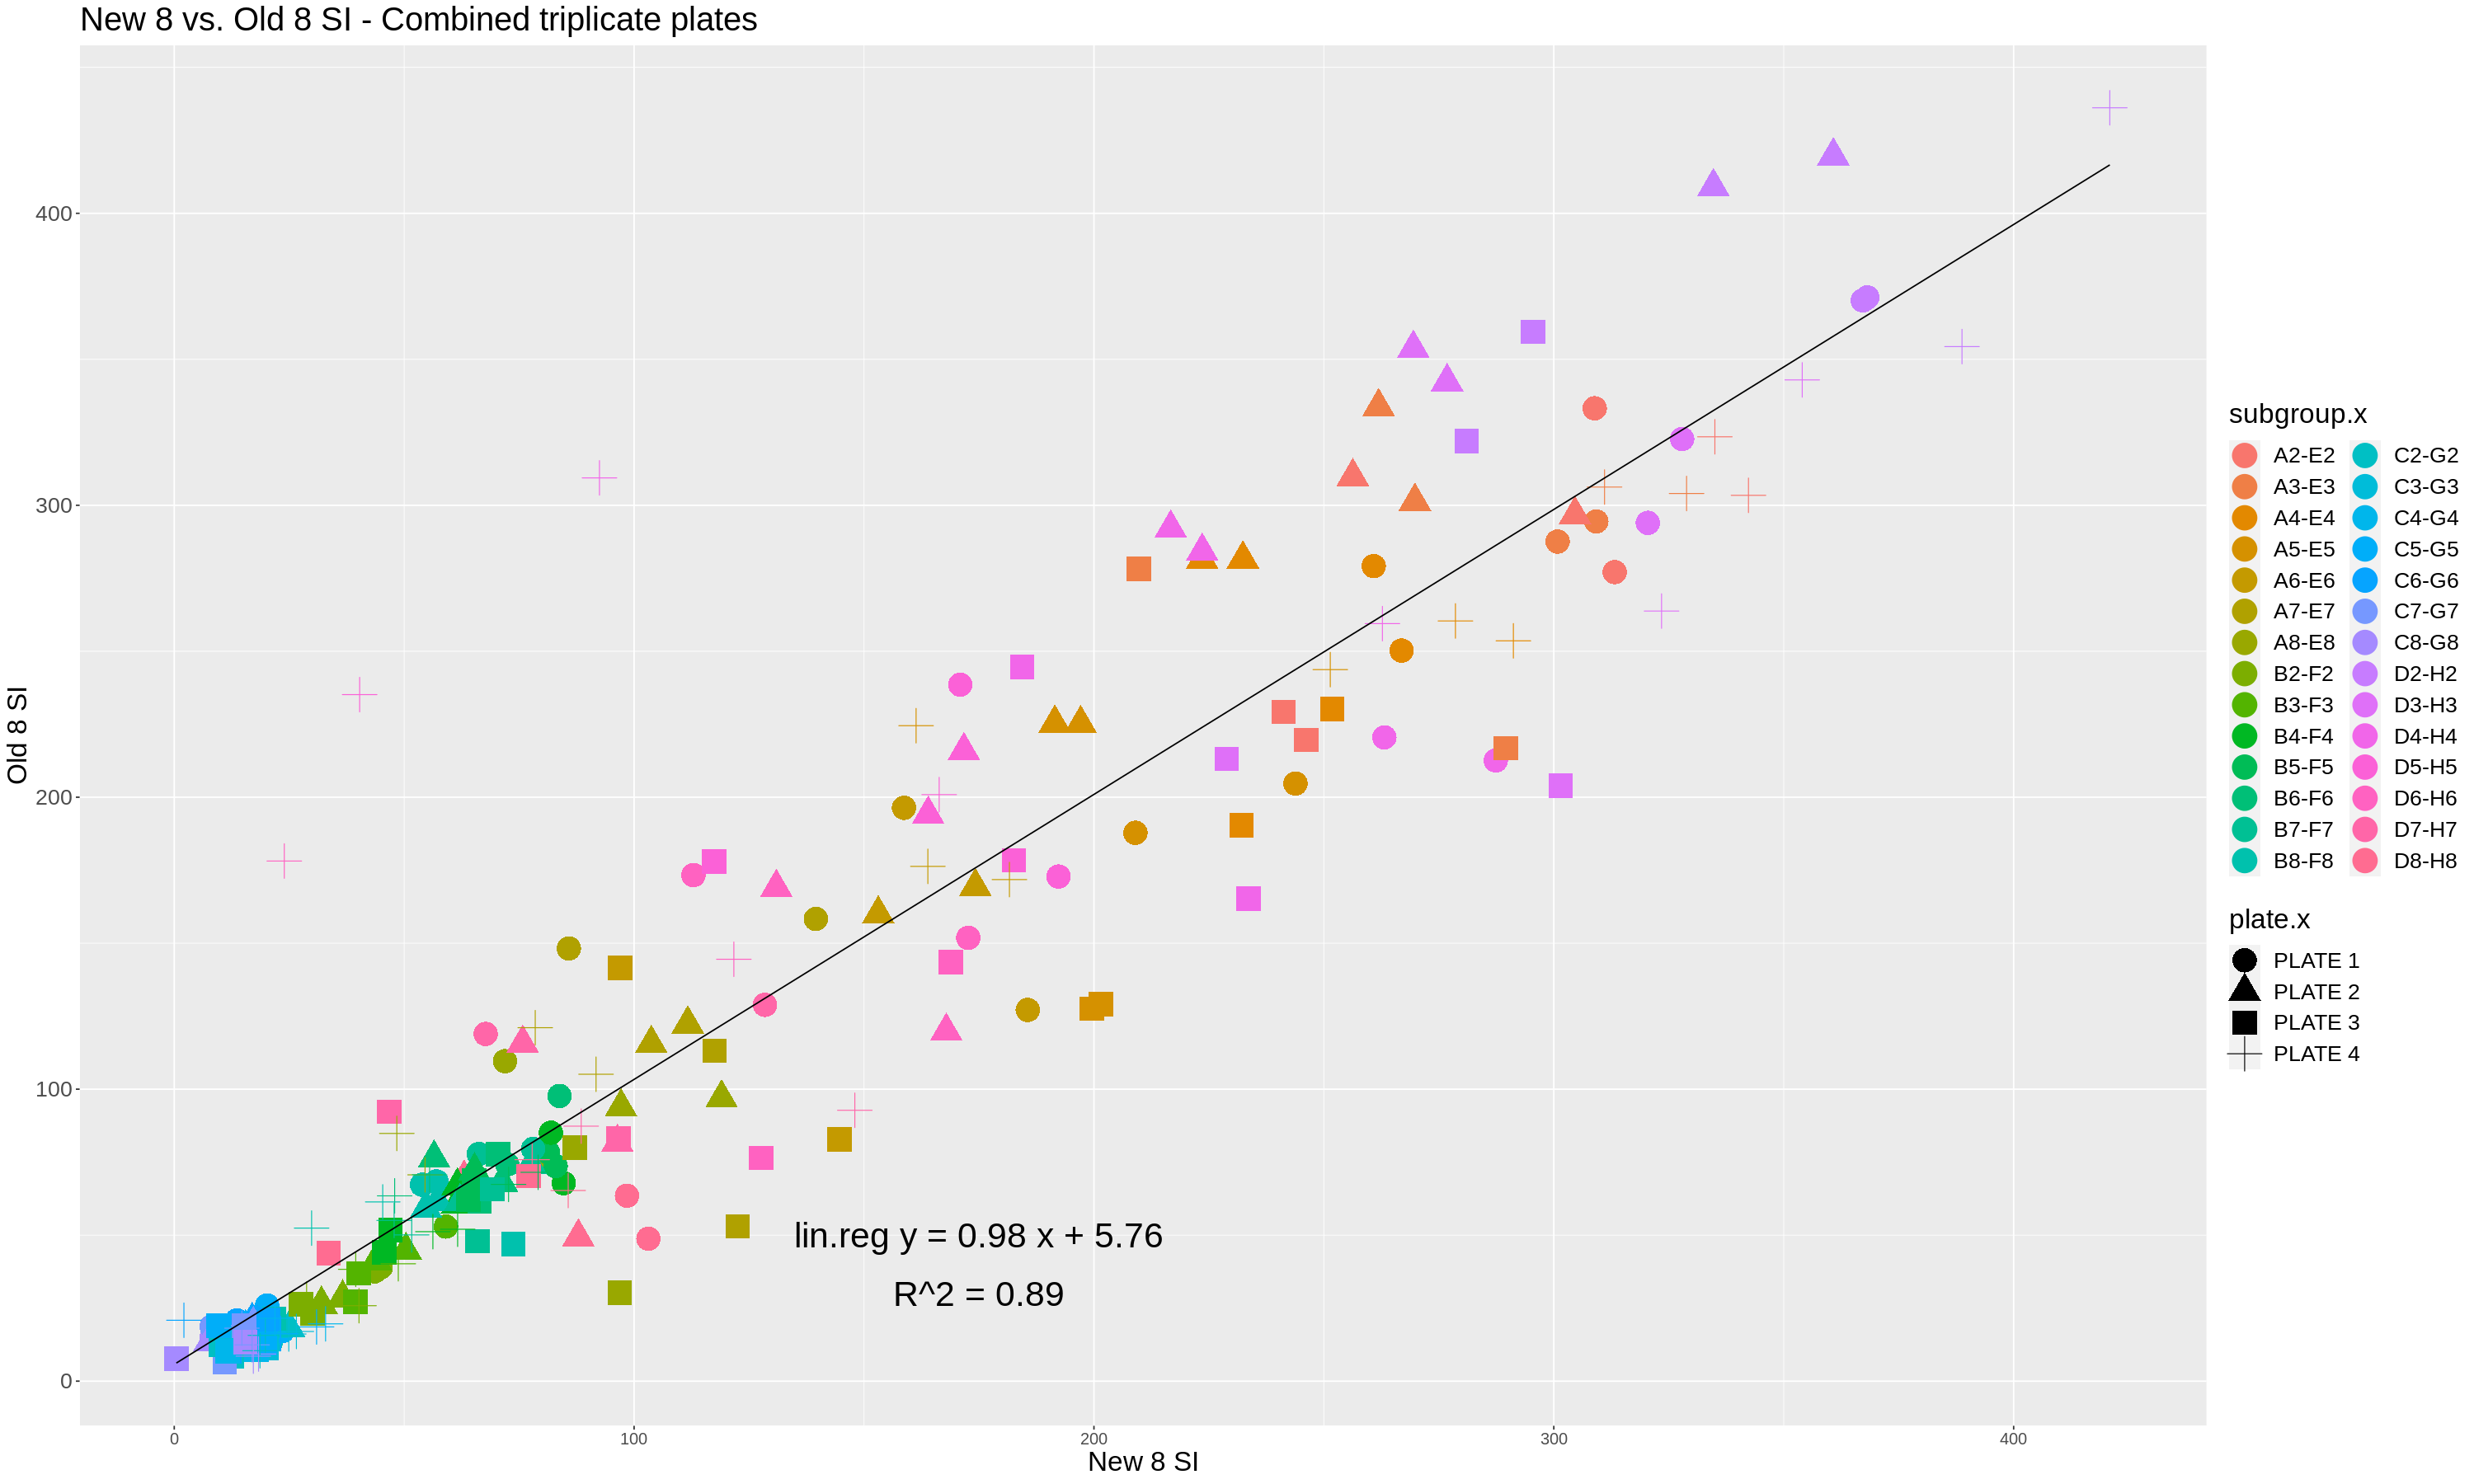

In [465]:
ggplot(dfm.t) + 
    geom_point(size = 8, aes(x = SI.x, 
                   y = SI.y, 
                   color=subgroup.x,
                   shape=plate.x)) + 
    geom_line(aes(x = SI.x, 
                  y = regline)) + 
    ggtitle("New 8 vs. Old 8 SI - Combined triplicate plates") + 
    xlab("New 8 SI") + 
    ylab("Old 8 SI") + 
    theme(text = element_text(size=20),
        axis.text.x = element_text(size = 12)) +
    annotate("text", 
             x = 175, 
             y = 50, 
             size = 9,
             label = paste("lin.reg y =", round(reg[[1]][2],2), "x +", 
                           round(reg[[1]][1],2))) + 
    annotate("text",
             x = 175,
             y = 30,
             size = 9,
             label = paste("R^2 =", round(summary(reg)$`r.squared`, 2)))


### XmR charts to show data series

In [466]:
# add the well id
dfm.t2 <- dfm %>% mutate(wellid = substr(SAMPLE_NAME, 14,15))

In [467]:
head(dfm.t2)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate   anova           wellid
1 A2-E2    NEW    PLATE 1 A2-PLATE 1-COL2 A2    
2 A3-E3    NEW    PLATE 1 A3-PLATE 1-COL3 A3    
3 A4-E4    NEW    PLATE 1 A4-PLATE 1-COL4 A4    
4 A5-E5    NEW    PLATE 1 A5-PLATE 1-COL5 A5    
5 A6-E6    NEW    PLATE 1 A6-PLATE 1-COL6 A6    
6 A7-E7    NEW    PLATE 1 A7-PLATE 1-COL7 A7

In [468]:
options(repr.plot.width=25, repr.plot.height=15)

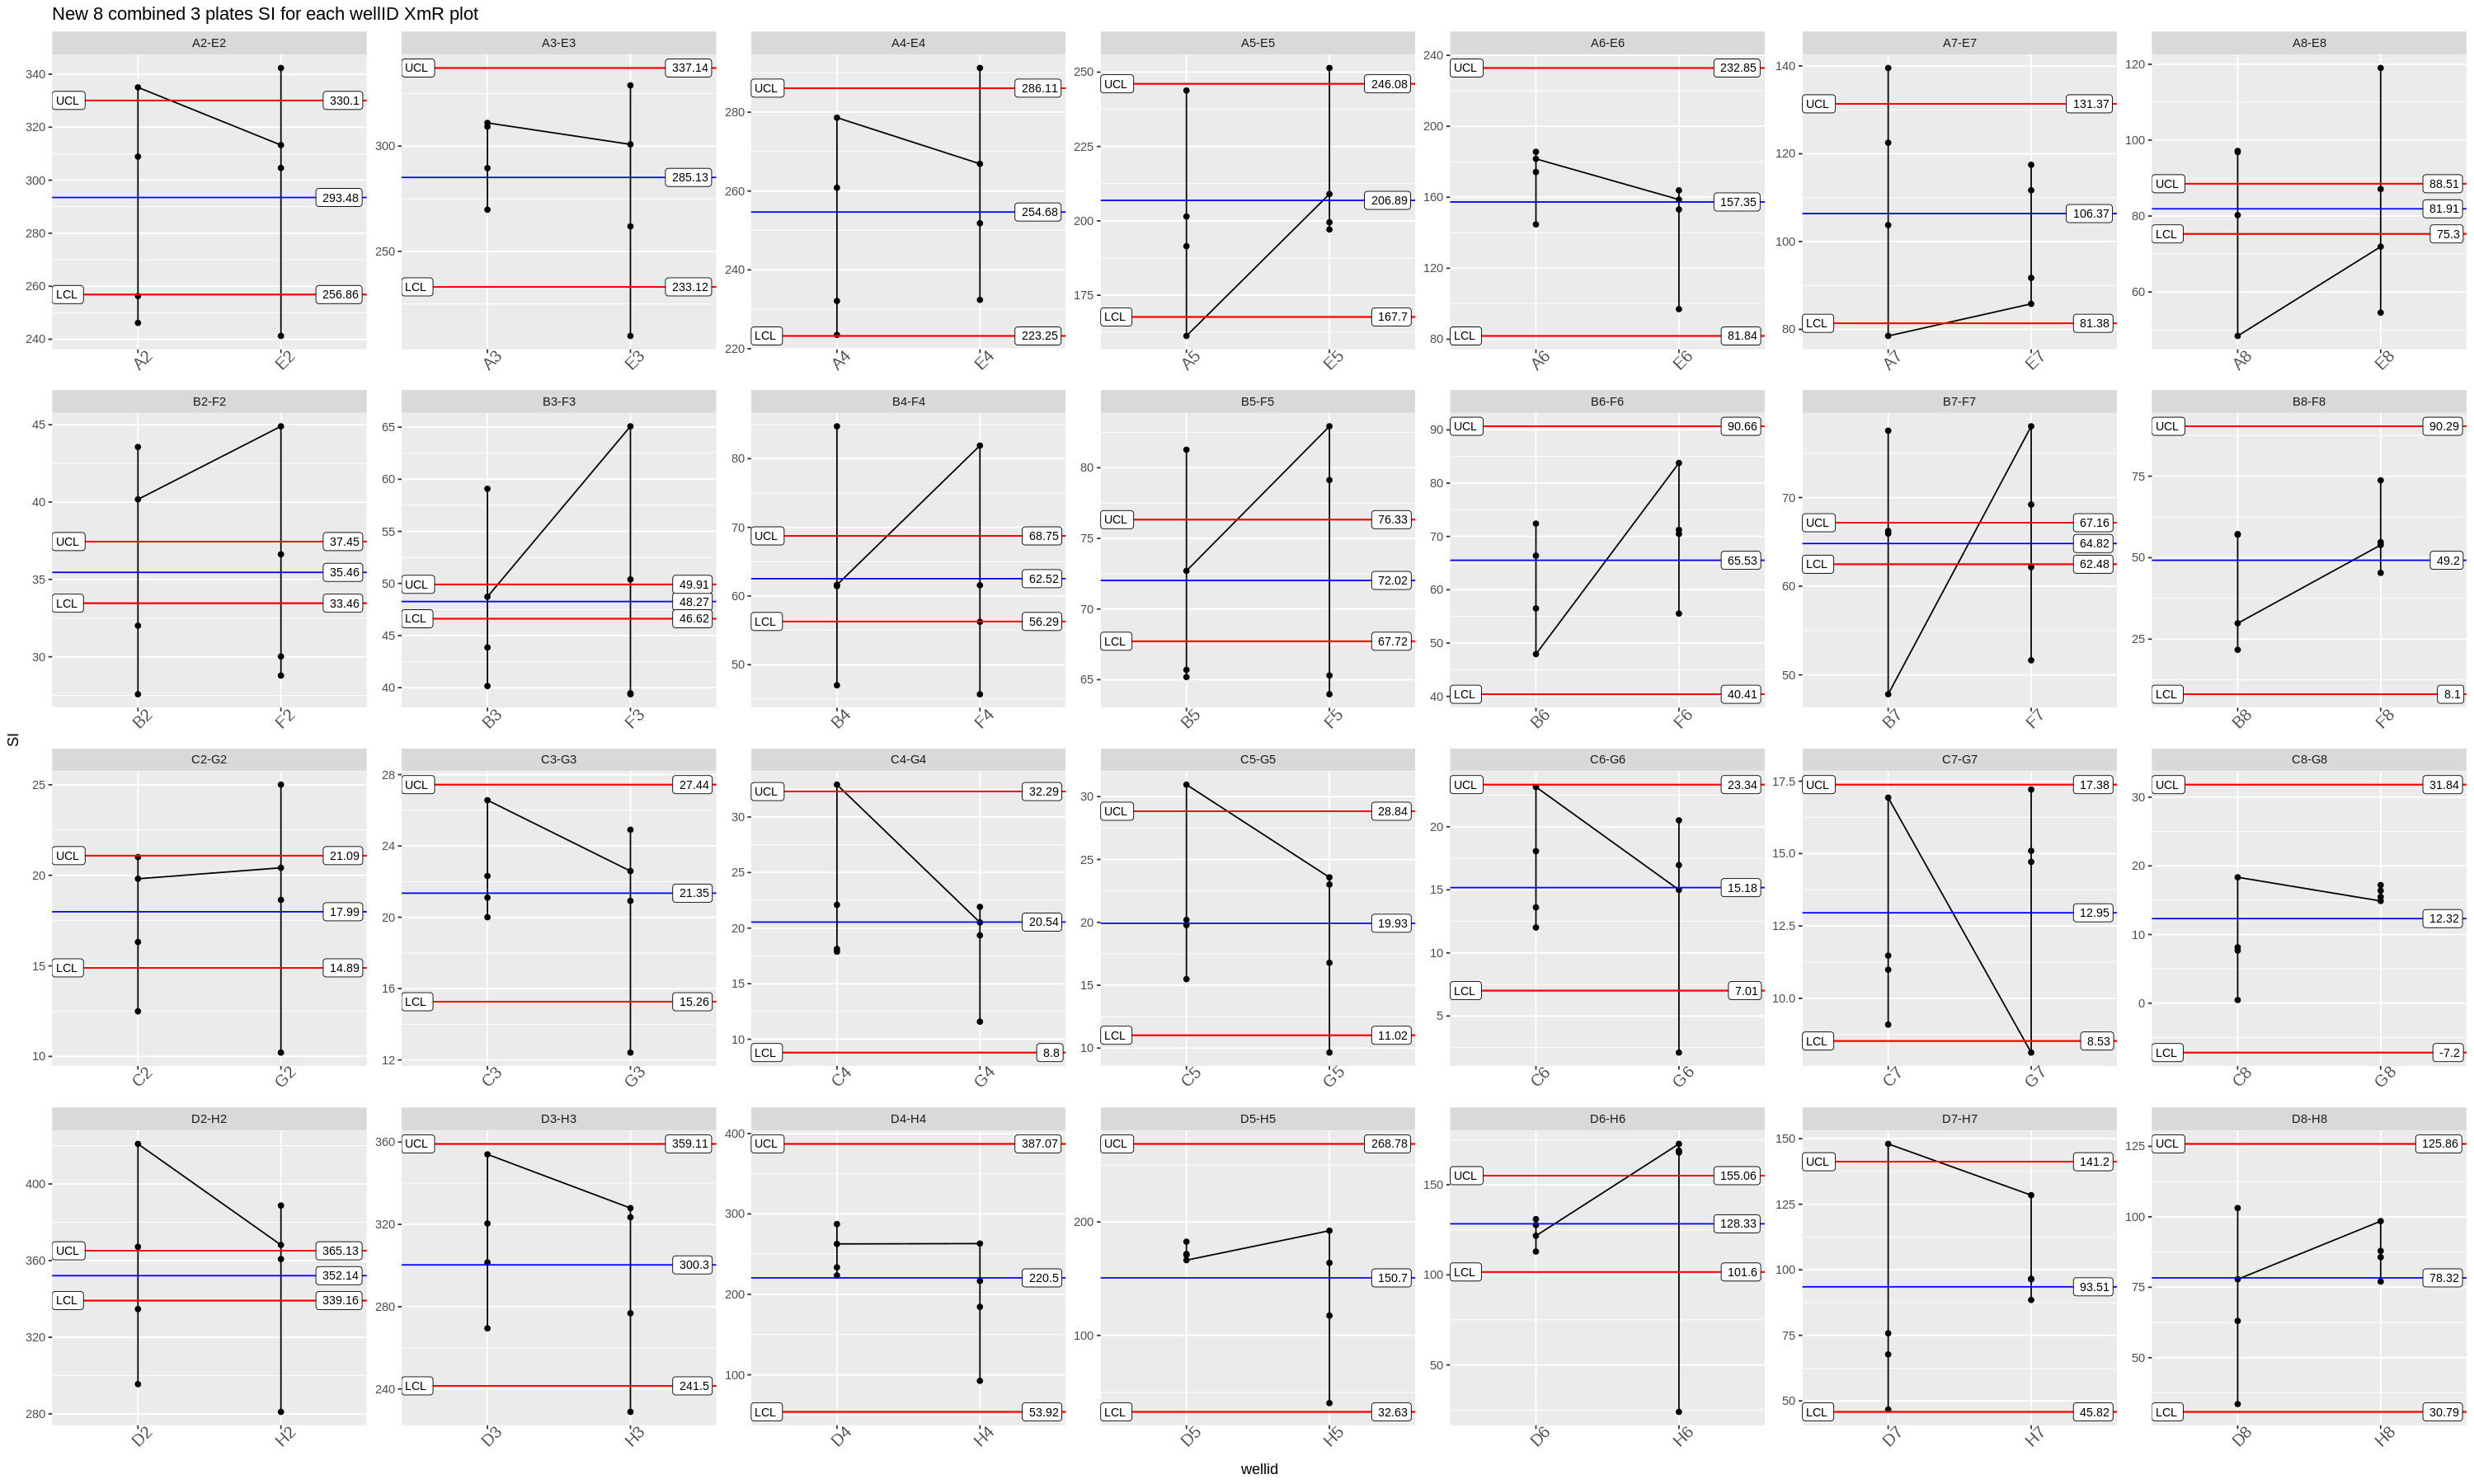

In [469]:
df.t2 <- dfm.t2 %>% filter(method == "NEW")
ggplot(df.t2, aes(x=wellid, y=SI, group = group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("SI") +
  facet_wrap(~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("New 8 combined 3 plates SI for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

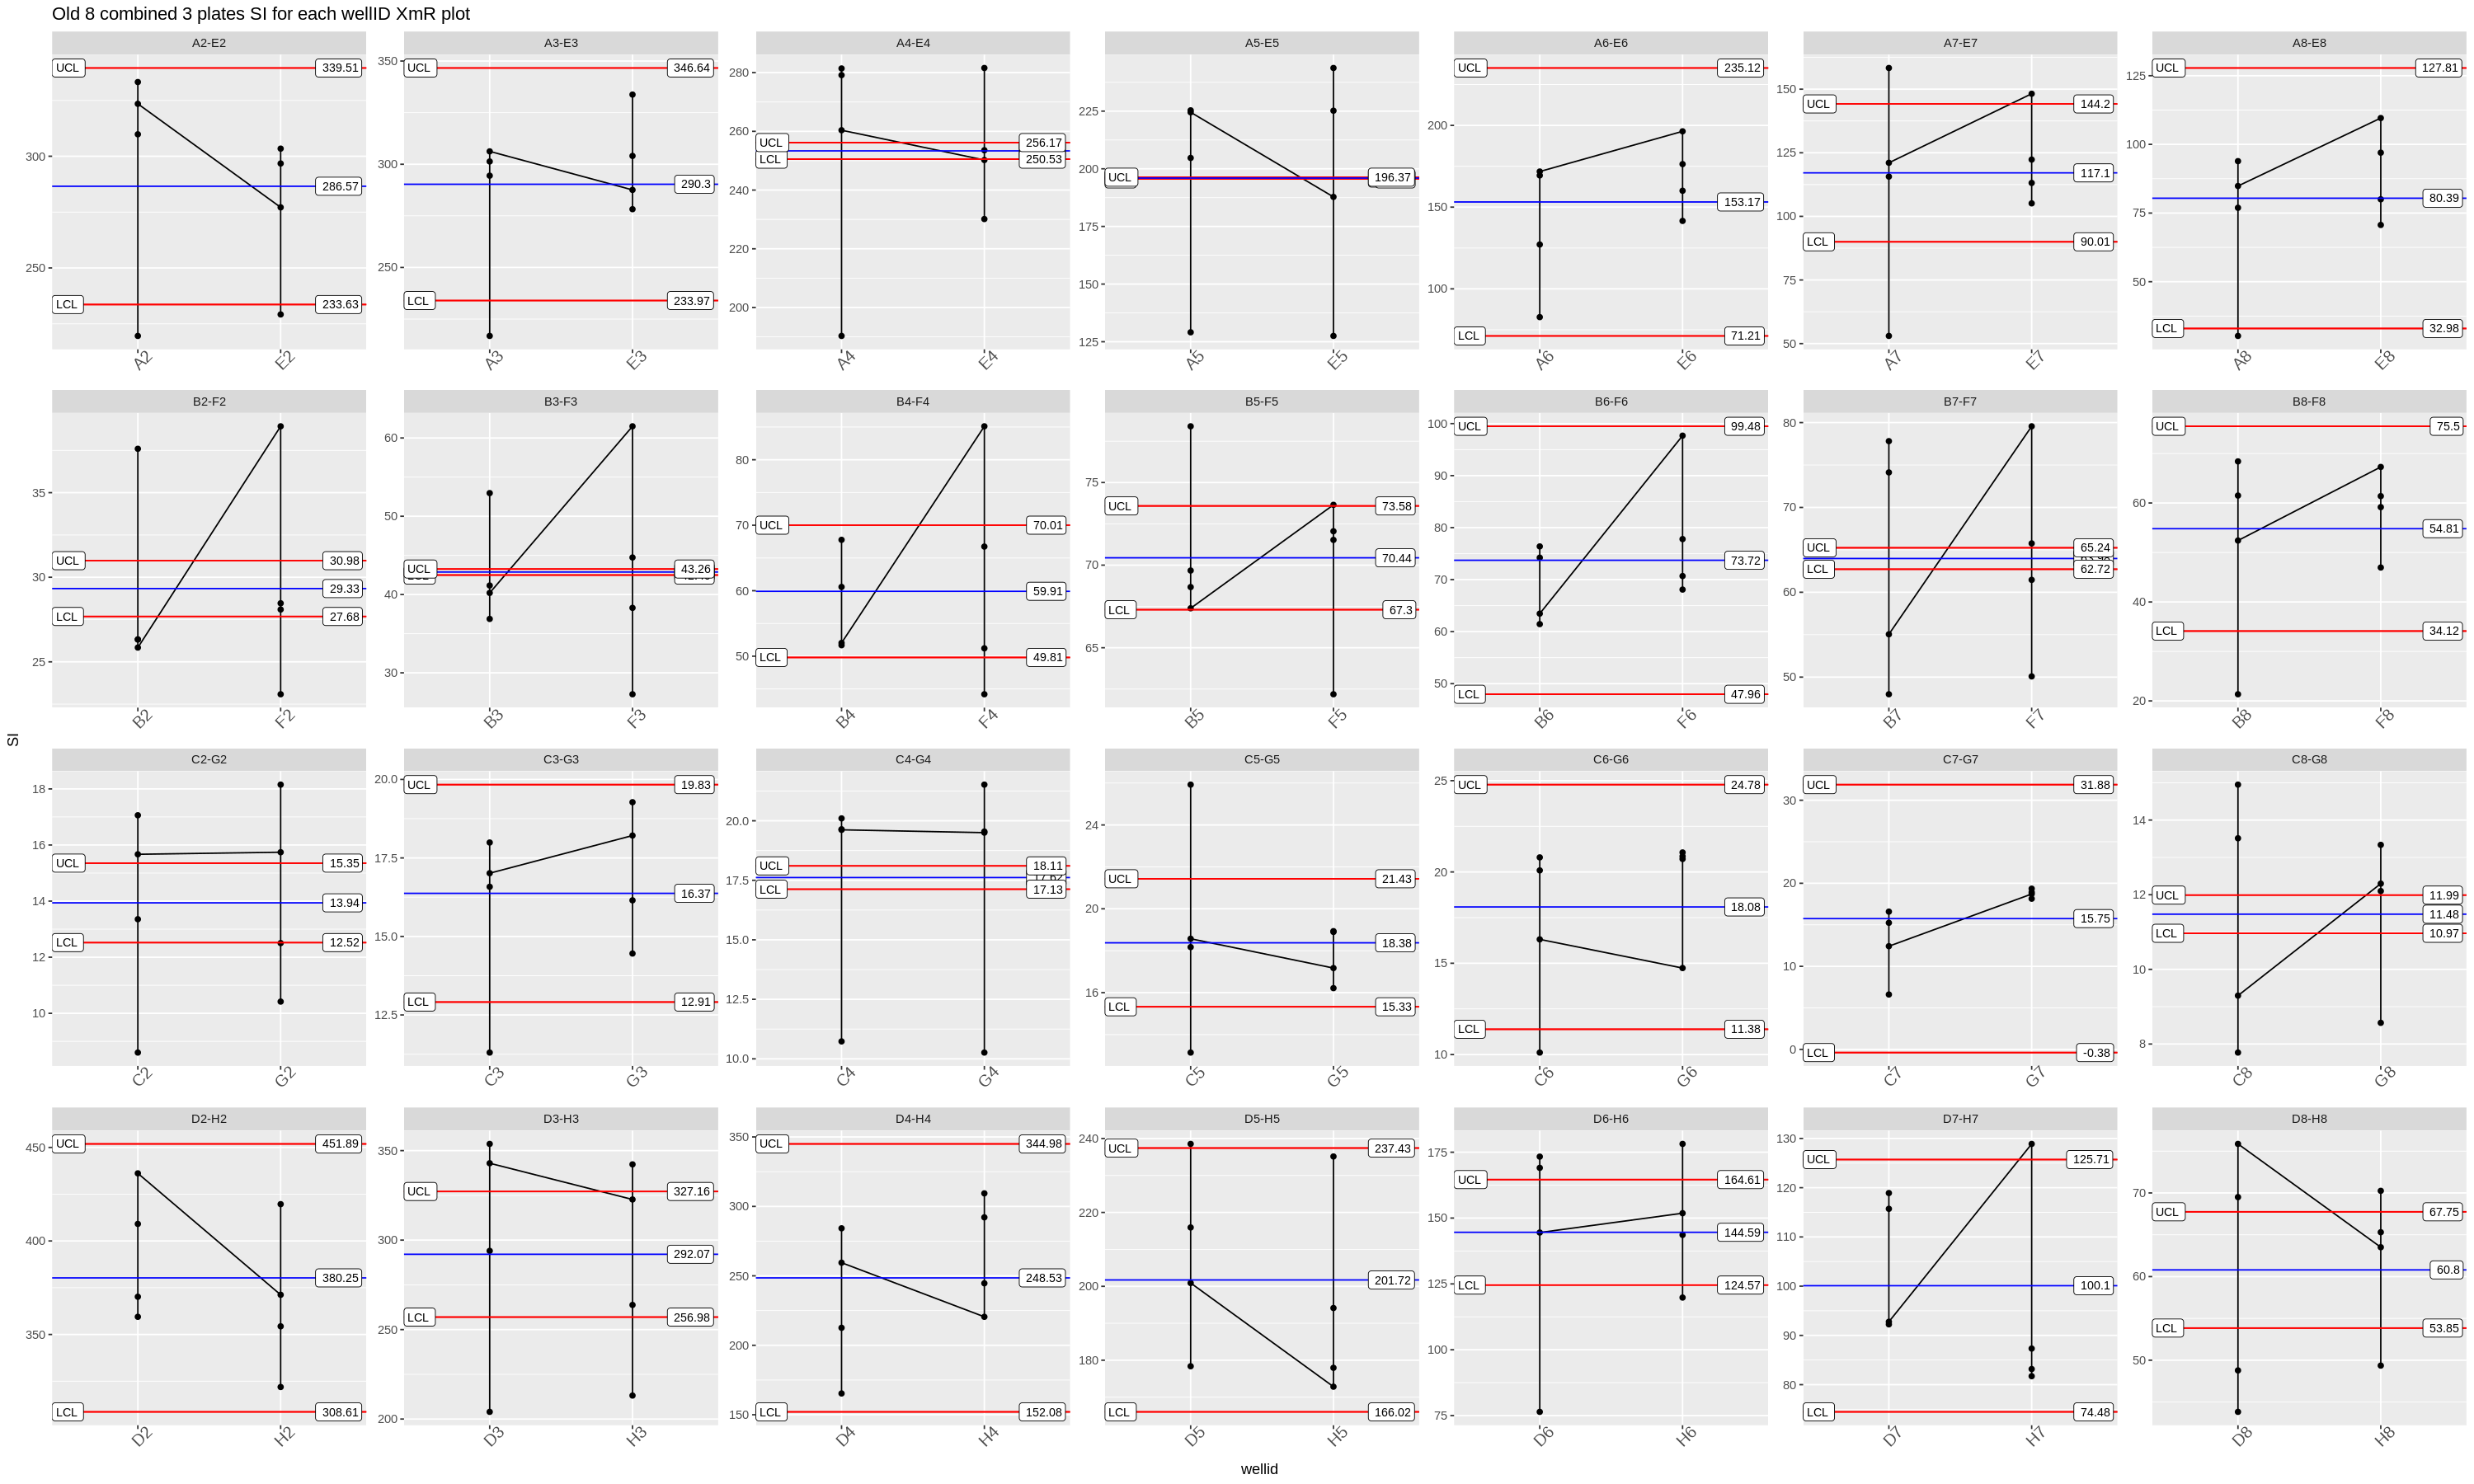

In [470]:
df.t2 <- dfm.t2 %>% filter(method == "OLD")
ggplot(df.t2, aes(x=wellid, y=SI, group = group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("SI") +
  facet_wrap(~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("Old 8 combined 3 plates SI for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

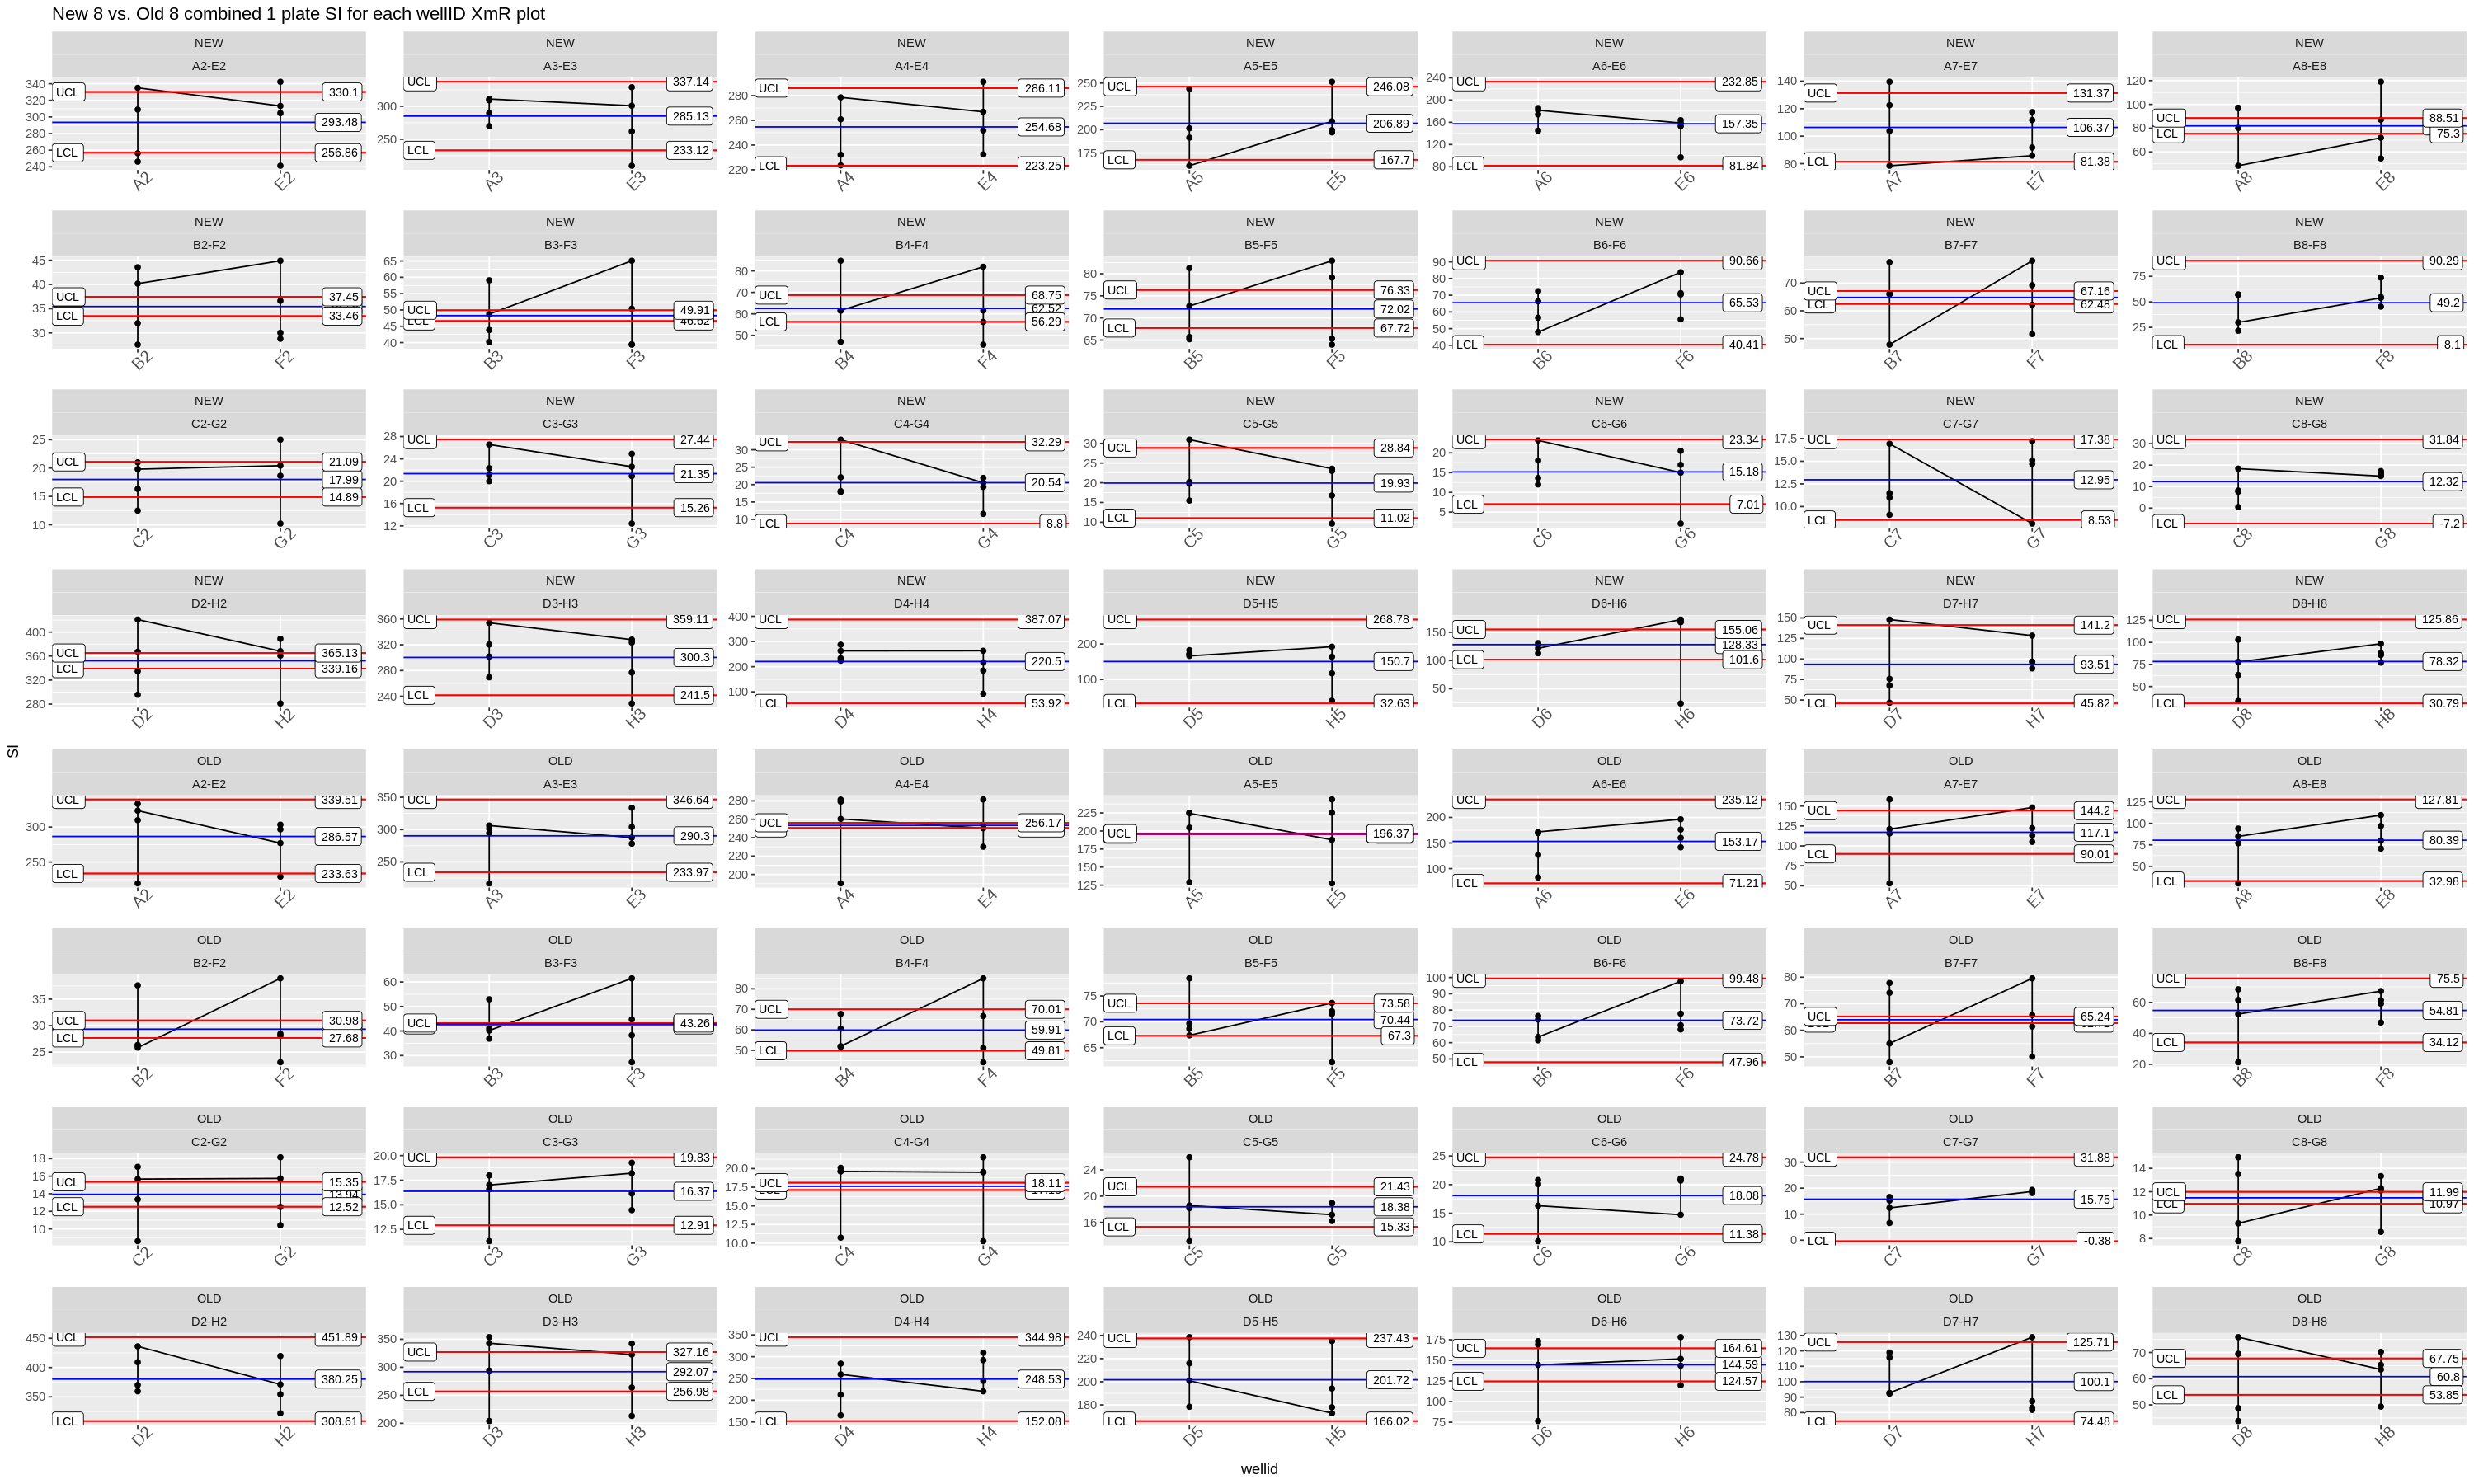

In [471]:
ggplot(dfm.t2, aes(x=wellid, y=SI, group = subgroup)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("SI") +
  facet_wrap(method~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("New 8 vs. Old 8 combined 1 plate SI for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

# Conclusion

- Seems as though the experiment is not setup for statistically convincing data
- May be inherent to flow cytometry experiments
- Or could design a new experiment:
    - Run 1 plate at a time, 2x for 8 channel and 96 core head
    - After each plate finishes, immediately wash and start on flow cytometer (use 2x cytometers; this will help even out inherent variances that can be pooled)
    - Perhaps use a real cell counter and count cells of a plate to compare against the X20
    - Append to current dataset cell count with n=3 prior to washing